In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
# create a session
session = Session(engine)

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [18]:
# Earliest and Latest Dates
earliest_date = session.query(measurement.date).order_by(measurement.date).first()
dummy = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The data range from {earliest_date} to {latest_date}")
dummy[0]

The data range from ('2010-01-01',) to ('2017-08-23',)


'2017-08-23'

In [19]:
format_str = '%Y-%m-%d' # The format
datetime_obj = dt.datetime.strptime(dummy[0], format_str)
print(datetime_obj.date())

2017-08-23


In [20]:
#Last year of data
#query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date = datetime_obj.date() - dt.timedelta(days=365) 
print(query_date)

2016-08-23


In [21]:
last_year_rain = session.query(measurement.date, measurement.station, measurement.prcp, measurement.tobs).\
    filter(measurement.date > query_date, ).order_by(measurement.date).all()
#str(last_year_rain).rstrip("\n")

In [22]:
# Query All Records in the Zip Table
conn = engine.connect()
last_year_rain_db = pd.read_sql(str(last_year_rain), conn)

OperationalError: (sqlite3.OperationalError) near "[('2016-08-24', 'USC00519397', 0.08, 79.0), ('2016-08-24', 'USC00513117', 2.15, 76.0), ('2016-08-24', 'USC00514830', 2.28, 80.0), ('2016-08-24', 'USC00517948', None, 78.0), ('2016-08-24', 'USC00519523', 1.22, 79.0), ('2016-08-24', 'USC00519281', 2.15, 77.0), ('2016-08-24', 'USC00516128', 1.45, 74.0), ('2016-08-25', 'USC00519397', 0.08, 80.0), ('2016-08-25', 'USC00513117', 0.08, 77.0), ('2016-08-25', 'USC00514830', 0.0, 81.0), ('2016-08-25', 'USC00517948', 0.0, 81.0), ('2016-08-25', 'USC00519523', 0.21, 80.0), ('2016-08-25', 'USC00519281', 0.06, 80.0), ('2016-08-25', 'USC00516128', 0.11, 77.0), ('2016-08-26', 'USC00519397', 0.0, 79.0), ('2016-08-26', 'USC00513117', 0.03, 78.0), ('2016-08-26', 'USC00514830', 0.02, 81.0), ('2016-08-26', 'USC00517948', 0.04, 81.0), ('2016-08-26', 'USC00519523', 0.0, 84.0), ('2016-08-26', 'USC00519281', 0.01, 80.0), ('2016-08-27', 'USC00519397', 0.0, 77.0), ('2016-08-27', 'USC00513117', 0.18, 73.0), ('2016-08-27', 'USC00514830', 0.02, 81.0), ('2016-08-27', 'USC00519523', 0.0, 81.0), ('2016-08-27', 'USC00519281', 0.12, 75.0), ('2016-08-27', 'USC00516128', None, 74.0), ('2016-08-28', 'USC00519397', 0.01, 78.0), ('2016-08-28', 'USC00513117', 0.14, 73.0), ('2016-08-28', 'USC00514830', 0.14, 81.0), ('2016-08-28', 'USC00519523', 0.14, 80.0), ('2016-08-28', 'USC00519281', 0.6, 73.0), ('2016-08-28', 'USC00516128', 2.07, 71.0), ('2016-08-29', 'USC00519397', 0.0, 78.0), ('2016-08-29', 'USC00513117', 0.17, 78.0), ('2016-08-29', 'USC00514830', 0.04, 80.0), ('2016-08-29', 'USC00517948', None, 80.0), ('2016-08-29', 'USC00519523', 0.0, 79.0), ('2016-08-29', 'USC00519281', 0.35, 78.0), ('2016-08-29', 'USC00516128', 0.9, 78.0), ('2016-08-30', 'USC00519397', 0.0, 79.0), ('2016-08-30', 'USC00513117', 0.0, 76.0), ('2016-08-30', 'USC00517948', 0.02, 79.0), ('2016-08-30', 'USC00519523', 0.0, 78.0), ('2016-08-30', 'USC00519281', 0.0, 77.0), ('2016-08-30', 'USC00516128', 0.05, 75.0), ('2016-08-31', 'USC00519397', 0.13, 80.0), ('2016-08-31', 'USC00513117', 0.1, 77.0), ('2016-08-31', 'USC00514830', None, 80.0), ('2016-08-31', 'USC00517948', None, 79.0), ('2016-08-31', 'USC00519523', 0.25, 78.0), ('2016-08-31', 'USC00519281', 0.24, 78.0), ('2016-08-31', 'USC00516128', 2.46, 76.0), ('2016-09-01', 'USC00519397', 0.0, 81.0), ('2016-09-01', 'USC00513117', 0.0, 79.0), ('2016-09-01', 'USC00514830', 0.0, 82.0), ('2016-09-01', 'USC00517948', None, 82.0), ('2016-09-01', 'USC00519281', 0.02, 80.0), ('2016-09-01', 'USC00516128', 0.01, 77.0), ('2016-09-02', 'USC00519397', 0.0, 80.0), ('2016-09-02', 'USC00513117', 0.02, 78.0), ('2016-09-02', 'USC00514830', 0.19, 81.0), ('2016-09-02', 'USC00517948', None, 81.0), ('2016-09-02', 'USC00519523', None, 81.0), ('2016-09-02', 'USC00519281', 0.01, 80.0), ('2016-09-02', 'USC00516128', 0.03, 75.0), ('2016-09-03', 'USC00519397', 0.0, 79.0), ('2016-09-03', 'USC00513117', 0.07, 77.0), ('2016-09-03', 'USC00519523', 0.08, 78.0), ('2016-09-03', 'USC00519281', 0.12, 78.0), ('2016-09-03', 'USC00516128', 1.0, 75.0), ('2016-09-04', 'USC00519397', 0.03, 75.0), ('2016-09-04', 'USC00513117', 0.03, 75.0), ('2016-09-04', 'USC00519523', 0.74, 84.0), ('2016-09-04', 'USC00519281', 0.14, 78.0), ('2016-09-04', 'USC00516128', 0.44, 73.0), ('2016-09-05', 'USC00519397', None, 79.0), ('2016-09-05', 'USC00513117', 0.11, 78.0), ('2016-09-05', 'USC00514830', None, 82.0), ('2016-09-05', 'USC00519523', 0.02, 84.0), ('2016-09-05', 'USC00519281', 0.03, 78.0), ('2016-09-05', 'USC00516128', 0.18, 76.0), ('2016-09-06', 'USC00519397', None, 76.0), ('2016-09-06', 'USC00513117', 0.05, 74.0), ('2016-09-06', 'USC00514830', 0.04, 80.0), ('2016-09-06', 'USC00519523', 0.03, 78.0), ('2016-09-06', 'USC00519281', 0.11, 73.0), ('2016-09-06', 'USC00516128', 1.0, 73.0), ('2016-09-07', 'USC00519397', 0.05, 76.0), ('2016-09-07', 'USC00513117', 0.1, 75.0), ('2016-09-07', 'USC00514830', 0.23, 80.0), ('2016-09-07', 'USC00519523', 0.11, 76.0), ('2016-09-07', 'USC00519281', 0.16, 74.0), ('2016-09-07', 'USC00516128', 1.35, 74.0), ('2016-09-08', 'USC00519397', 0.0, 80.0), ('2016-09-08', 'USC00513117', 0.22, 77.0), ('2016-09-08', 'USC00514830', 0.01, 81.0), ('2016-09-08', 'USC00517948', None, 80.0), ('2016-09-08', 'USC00519523', 0.01, 79.0), ('2016-09-08', 'USC00519281', 0.07, 80.0), ('2016-09-08', 'USC00516128', 0.15, 74.0), ('2016-09-09', 'USC00519397', 0.03, 79.0), ('2016-09-09', 'USC00513117', 0.01, 76.0), ('2016-09-09', 'USC00514830', 0.29, 77.0), ('2016-09-09', 'USC00517948', None, 79.0), ('2016-09-09', 'USC00519523', 0.23, 77.0), ('2016-09-09', 'USC00519281', 0.16, 79.0), ('2016-09-09', 'USC00516128', 0.35, 75.0), ('2016-09-10', 'USC00519397', 0.0, 78.0), ('2016-09-10', 'USC00513117', 0.01, 76.0), ('2016-09-10', 'USC00519523', 0.14, 78.0), ('2016-09-10', 'USC00519281', 0.09, 77.0), ('2016-09-10', 'USC00516128', 1.16, 75.0), ('2016-09-11', 'USC00519397', 0.05, 76.0), ('2016-09-11', 'USC00513117', 0.18, 76.0), ('2016-09-11', 'USC00519523', 0.12, 83.0), ('2016-09-11', 'USC00519281', 0.3, 80.0), ('2016-09-11', 'USC00516128', 0.6, 71.0), ('2016-09-12', 'USC00519397', 0.0, 78.0), ('2016-09-12', 'USC00513117', 0.04, 76.0), ('2016-09-12', 'USC00514830', None, 79.0), ('2016-09-12', 'USC00517948', None, 79.0), ('2016-09-12', 'USC00519523', 0.15, 78.0), ('2016-09-12', 'USC00519281', 0.31, 76.0), ('2016-09-12', 'USC00516128', 1.04, 72.0), ('2016-09-13', 'USC00519397', 0.02, 78.0), ('2016-09-13', 'USC00513117', 0.37, 76.0), ('2016-09-13', 'USC00514830', 0.32, 79.0), ('2016-09-13', 'USC00517948', None, 79.0), ('2016-09-13', 'USC00519523', 0.46, 77.0), ('2016-09-13', 'USC00519281', 0.34, 79.0), ('2016-09-13', 'USC00516128', 1.2, 75.0), ('2016-09-14', 'USC00519397', 1.32, 75.0), ('2016-09-14', 'USC00513117', 0.9, 76.0), ('2016-09-14', 'USC00514830', 1.84, 79.0), ('2016-09-14', 'USC00517948', None, 76.0), ('2016-09-14', 'USC00519523', 1.19, 77.0), ('2016-09-14', 'USC00519281', 2.33, 75.0), ('2016-09-14', 'USC00516128', 6.7, 73.0), ('2016-09-15', 'USC00519397', 0.42, 79.0), ('2016-09-15', 'USC00513117', 0.12, 78.0), ('2016-09-15', 'USC00514830', 0.07, 81.0), ('2016-09-15', 'USC00517948', None, 76.0), ('2016-09-15', 'USC00519523', 0.17, 79.0), ('2016-09-15', 'USC00519281', 0.83, 79.0), ('2016-09-15', 'USC00516128', 3.35, 73.0), ('2016-09-16', 'USC00519397', 0.06, 80.0), ('2016-09-16', 'USC00513117', 0.01, 78.0), ('2016-09-16', 'USC00514830', 0.07, 79.0), ('2016-09-16', 'USC00517948', 0.0, 79.0), ('2016-09-16', 'USC00519523', 0.01, 78.0), ('2016-09-16', 'USC00519281', 0.06, 78.0), ('2016-09-16', 'USC00516128', 0.61, 73.0), ('2016-09-17', 'USC00519397', 0.05, 79.0), ('2016-09-17', 'USC00513117', 0.04, 78.0), ('2016-09-17', 'USC00519523', 0.0, 81.0), ('2016-09-17', 'USC00519281', 0.36, 79.0), ('2016-09-17', 'USC00516128', 0.23, 76.0), ('2016-09-18', 'USC00519397', 0.0, 81.0), ('2016-09-18', 'USC00513117', 0.0, 78.0), ('2016-09-18', 'USC00519523', 0.04, 81.0), ('2016-09-18', 'USC00519281', 0.07, 78.0), ('2016-09-18', 'USC00516128', 0.42, 75.0), ('2016-09-19', 'USC00519397', 0.0, 77.0), ('2016-09-19', 'USC00513117', 0.01, 75.0), ('2016-09-19', 'USC00514830', None, 79.0), ('2016-09-19', 'USC00517948', None, 79.0), ('2016-09-19', 'USC00519523', 0.05, 78.0), ('2016-09-19', 'USC00519281', 0.01, 78.0), ('2016-09-19', 'USC00516128', 0.25, 70.0), ('2016-09-20', 'USC00519397', 0.0, 77.0), ('2016-09-20', 'USC00513117', 0.09, 78.0), ('2016-09-20', 'USC00514830', 0.25, 80.0), ('2016-09-20', 'USC00517948', 0.0, 73.0), ('2016-09-20', 'USC00519523', 0.04, 77.0), ('2016-09-20', 'USC00519281', 0.22, 76.0), ('2016-09-20', 'USC00516128', 0.43, 70.0), ('2016-09-21', 'USC00519397', 0.0, 78.0), ('2016-09-21', 'USC00513117', 0.06, 76.0), ('2016-09-21', 'USC00514830', 0.02, 80.0), ('2016-09-21', 'USC00519523', 0.0, 79.0), ('2016-09-21', 'USC00519281', 0.07, 74.0), ('2016-09-21', 'USC00516128', 1.02, 73.0), ('2016-09-22', 'USC00519397', 0.02, 76.0), ('2016-09-22', 'USC00513117', 0.09, 77.0), ('2016-09-22', 'USC00514830', 0.17, 78.0), ('2016-09-22', 'USC00517948', 0.06, 76.0), ('2016-09-22', 'USC00519523', 0.01, 79.0), ('2016-09-22', 'USC00519281', 0.34, 77.0), ('2016-09-22', 'USC00516128', 0.75, 73.0), ('2016-09-23', 'USC00519397', 0.0, 82.0), ('2016-09-23', 'USC00513117', 0.15, 76.0), ('2016-09-23', 'USC00514830', 0.15, 81.0), ('2016-09-23', 'USC00517948', 0.0, 80.0), ('2016-09-23', 'USC00519523', 0.0, 80.0), ('2016-09-23', 'USC00519281', 0.94, 78.0), ('2016-09-23', 'USC00516128', 0.33, 73.0), ('2016-09-24', 'USC00519397', 0.0, 81.0), ('2016-09-24', 'USC00513117', 0.0, 79.0), ('2016-09-24', 'USC00514830', 0.0, 82.0), ('2016-09-24', 'USC00519523', 0.0, 83.0), ('2016-09-24', 'USC00519281', 0.01, 79.0), ('2016-09-24', 'USC00516128', 0.27, 77.0), ('2016-09-25', 'USC00519397', 0.0, 78.0), ('2016-09-25', 'USC00513117', 0.02, 77.0), ('2016-09-25', 'USC00514830', 0.0, 82.0), ('2016-09-25', 'USC00519523', 0.0, 82.0), ('2016-09-25', 'USC00519281', 0.03, 79.0), ('2016-09-25', 'USC00516128', 0.04, 76.0), ('2016-09-26', 'USC00519397', 0.06, 80.0), ('2016-09-26', 'USC00513117', 0.06, 77.0), ('2016-09-26', 'USC00514830', 0.02, 80.0), ('2016-09-26', 'USC00517948', None, 78.0), ('2016-09-26', 'USC00519523', 0.34, 78.0), ('2016-09-26', 'USC00519281', 0.17, 77.0), ('2016-09-26', 'USC00516128', 1.02, 74.0), ('2016-09-27', 'USC00519397', 0.02, 80.0), ('2016-09-27', 'USC00513117', 0.12, 77.0), ('2016-09-27', 'USC00514830', 0.0, 79.0), ('2016-09-27', 'USC00519523', 0.05, 78.0), ('2016-09-27', 'USC00519281', 0.17, 80.0), ('2016-09-27', 'USC00516128', 1.0, 74.0), ('2016-09-28', 'USC00519397', 0.0, 79.0), ('2016-09-28', 'USC00513117', 0.08, 77.0), ('2016-09-28', 'USC00514830', 0.0, 80.0), ('2016-09-28', 'USC00517948', 0.0, 79.0), ('2016-09-28', 'USC00519523', 0.0, 78.0), ('2016-09-28', 'USC00519281', 0.0, 78.0), ('2016-09-28', 'USC00516128', 0.05, 77.0), ('2016-09-29', 'USC00519397', 0.0, 80.0), ('2016-09-29', 'USC00513117', 0.49, 76.0), ('2016-09-29', 'USC00514830', 0.2, 79.0), ('2016-09-29', 'USC00517948', 0.04, 80.0), ('2016-09-29', 'USC00519523', 0.18, 82.0), ('2016-09-29', 'USC00519281', 0.59, 78.0), ('2016-09-29', 'USC00516128', 1.49, 77.0), ('2016-09-30', 'USC00519397', 0.0, 80.0), ('2016-09-30', 'USC00513117', 0.31, 77.0), ('2016-09-30', 'USC00514830', 0.06, 80.0), ('2016-09-30', 'USC00517948', None, 80.0), ('2016-09-30', 'USC00519523', 0.15, 78.0), ('2016-09-30', 'USC00519281', 0.25, 78.0), ('2016-09-30', 'USC00516128', 0.38, 73.0), ('2016-10-01', 'USC00519397', 0.0, 80.0), ('2016-10-01', 'USC00513117', 0.14, 75.0), ('2016-10-01', 'USC00514830', 0.08, 80.0), ('2016-10-01', 'USC00519523', 0.07, 79.0), ('2016-10-01', 'USC00519281', 0.14, 77.0), ('2016-10-01', 'USC00516128', 1.02, 74.0), ('2016-10-02', 'USC00519397', 0.0, 79.0), ('2016-10-02', 'USC00513117', 0.02, 77.0), ('2016-10-02', 'USC00514830', 0.03, 80.0), ('2016-10-02', 'USC00519523', 0.0, 81.0), ('2016-10-02', 'USC00519281', 0.06, 79.0), ('2016-10-02', 'USC00516128', 0.61, 73.0), ('2016-10-03', 'USC00519397', 0.0, 79.0), ('2016-10-03', 'USC00513117', 0.04, 78.0), ('2016-10-03', 'USC00514830', 0.03, 80.0), ('2016-10-03', 'USC00517948', None, 79.0), ('2016-10-03', 'USC00519523', 0.0, 79.0), ('2016-10-03', 'USC00519281', 0.16, 79.0), ('2016-10-03', 'USC00516128', 0.46, 76.0), ('2016-10-04', 'USC00519397', 0.0, 79.0), ('2016-10-04', 'USC00513117', 0.0, 78.0), ('2016-10-04', 'USC00514830', 0.0, 81.0), ('2016-10-04', 'USC00517948', None, 77.0), ('2016-10-04', 'USC00519523', 0.0, 80.0), ('2016-10-04', 'USC00519281', 0.03, 79.0), ('2016-10-04', 'USC00516128', 3.46, 74.0), ('2016-10-05', 'USC00519397', 0.0, 80.0), ('2016-10-05', 'USC00513117', 0.0, 77.0), ('2016-10-05', 'USC00514830', 0.0, 80.0), ('2016-10-05', 'USC00517948', None, 80.0), ('2016-10-05', 'USC00519523', 0.0, 80.0), ('2016-10-05', 'USC00519281', 0.01, 79.0), ('2016-10-05', 'USC00516128', 0.81, 75.0), ('2016-10-06', 'USC00519397', 0.0, 80.0), ('2016-10-06', 'USC00513117', 0.05, 76.0), ('2016-10-06', 'USC00514830', 0.0, 80.0), ('2016-10-06', 'USC00517948', 0.07, 79.0), ('2016-10-06', 'USC00519523', 0.0, 80.0), ('2016-10-06', 'USC00519281', 0.0, 75.0), ('2016-10-06', 'USC00516128', 0.04, 75.0), ('2016-10-07', 'USC00519397', 0.0, 79.0), ('2016-10-07', 'USC00513117', 0.0, 78.0), ('2016-10-07', 'USC00514830', 0.0, 79.0), ('2016-10-07', 'USC00517948', None, 78.0), ('2016-10-07', 'USC00519523', 0.0, 79.0), ('2016-10-07', 'USC00519281', 0.0, 76.0), ('2016-10-07', 'USC00516128', 0.01, 73.0), ('2016-10-08', 'USC00519397', 0.0, 78.0), ('2016-10-08', 'USC00513117', 0.0, 76.0), ('2016-10-08', 'USC00519523', 0.0, 82.0), ('2016-10-08', 'USC00519281', 0.0, 73.0), ('2016-10-08', 'USC00516128', 0.04, 74.0), ('2016-10-09', 'USC00519397', 0.0, 76.0), ('2016-10-09', 'USC00513117', 0.0, 77.0), ('2016-10-09', 'USC00519523', 0.0, 80.0), ('2016-10-09', 'USC00519281', 0.0, 72.0), ('2016-10-09', 'USC00516128', 0.0, 77.0), ('2016-10-10', 'USC00519397', 0.0, 75.0), ('2016-10-10', 'USC00513117', 0.0, 75.0), ('2016-10-10', 'USC00514830', None, 77.0), ('2016-10-10', 'USC00519523', 0.0, 78.0), ('2016-10-10', 'USC00519281', 0.0, 71.0), ('2016-10-10', 'USC00516128', 0.0, 74.0), ('2016-10-11', 'USC00519397', 0.0, 80.0), ('2016-10-11', 'USC00513117', 0.02, 77.0), ('2016-10-11', 'USC00514830', 0.04, 80.0), ('2016-10-11', 'USC00517948', None, 79.0), ('2016-10-11', 'USC00519523', 0.0, 81.0), ('2016-10-11', 'USC00519281', 0.28, 77.0), ('2016-10-11', 'USC00516128', 0.35, 74.0), ('2016-10-12', 'USC00519397', 0.0, 80.0), ('2016-10-12', 'USC00513117', 0.03, 75.0), ('2016-10-12', 'USC00514830', 0.0, 80.0), ('2016-10-12', 'USC00519523', 0.0, 81.0), ('2016-10-12', 'USC00519281', 0.03, 79.0), ('2016-10-12', 'USC00516128', 0.02, 78.0), ('2016-10-13', 'USC00519397', 0.0, 79.0), ('2016-10-13', 'USC00513117', 0.0, 78.0), ('2016-10-13', 'USC00514830', 0.02, 81.0), ('2016-10-13', 'USC00517948', None, 80.0), ('2016-10-13', 'USC00519523', 0.0, 79.0), ('2016-10-13', 'USC00519281', 0.0, 78.0), ('2016-10-13', 'USC00516128', 0.06, 75.0), ('2016-10-14', 'USC00519397', 0.0, 80.0), ('2016-10-14', 'USC00513117', 0.0, 77.0), ('2016-10-14', 'USC00514830', 0.0, 79.0), ('2016-10-14', 'USC00519523', 0.0, 80.0), ('2016-10-14', 'USC00519281', 0.0, 79.0), ('2016-10-14', 'USC00516128', 0.0, 73.0), ('2016-10-15', 'USC00519397', 0.0, 79.0), ('2016-10-15', 'USC00513117', 0.0, 76.0), ('2016-10-15', 'USC00514830', 0.02, 81.0), ('2016-10-15', 'USC00519523', 0.0, 79.0), ('2016-10-15', 'USC00519281', 0.04, 77.0), ('2016-10-15', 'USC00516128', 0.33, 74.0), ('2016-10-16', 'USC00519397', 0.0, 78.0), ('2016-10-16', 'USC00513117', 0.0, 75.0), ('2016-10-16', 'USC00519523', 0.0, 81.0), ('2016-10-16', 'USC00519281', 0.0, 79.0), ('2016-10-16', 'USC00516128', 0.0, 77.0), ('2016-10-17', 'USC00519397', 0.01, 78.0), ('2016-10-17', 'USC00513117', 0.03, 77.0), ('2016-10-17', 'USC00514830', None, 78.0), ('2016-10-17', 'USC00517948', None, 80.0), ('2016-10-17', 'USC00519523', 0.12, 80.0), ('2016-10-17', 'USC00519281', 0.01, 77.0), ('2016-10-17', 'USC00516128', 0.38, 70.0), ('2016-10-18', 'USC00519397', 0.0, 80.0), ('2016-10-18', 'USC00513117', 0.05, 77.0), ('2016-10-18', 'USC00514830', 0.03, 80.0), ('2016-10-18', 'USC00517948', None, 80.0), ('2016-10-18', 'USC00519523', 0.02, 80.0), ('2016-10-18', 'USC00519281', 0.02, 78.0), ('2016-10-18', 'USC00516128', 0.48, 74.0), ('2016-10-19', 'USC00519397', 0.0, 81.0), ('2016-10-19', 'USC00513117', 0.06, 77.0), ('2016-10-19', 'USC00514830', 0.0, 79.0), ('2016-10-19', 'USC00517948', None, 80.0), ('2016-10-19', 'USC00519523', 0.0, 78.0), ('2016-10-19', 'USC00519281', 0.11, 78.0), ('2016-10-19', 'USC00516128', 0.0, 70.0), ('2016-10-20', 'USC00519397', 0.0, 79.0), ('2016-10-20', 'USC00513117', 0.0, 76.0), ('2016-10-20', 'USC00514830', 0.01, 77.0), ('2016-10-20', 'USC00517948', None, 78.0), ('2016-10-20', 'USC00519281', 0.0, 78.0), ('2016-10-20', 'USC00516128', 1.0, 73.0), ('2016-10-21', 'USC00519397', 0.05, 77.0), ('2016-10-21', 'USC00513117', 0.15, 76.0), ('2016-10-21', 'USC00514830', 0.03, 78.0), ('2016-10-21', 'USC00517948', None, 76.0), ('2016-10-21', 'USC00519523', None, 79.0), ('2016-10-21', 'USC00519281', 0.0, 78.0), ('2016-10-21', 'USC00516128', 0.09, 74.0), ('2016-10-22', 'USC00519397', 0.15, 79.0), ('2016-10-22', 'USC00513117', 0.1, 77.0), ('2016-10-22', 'USC00519523', 0.0, 80.0), ('2016-10-22', 'USC00519281', 0.15, 77.0), ('2016-10-22', 'USC00516128', 1.37, 75.0), ('2016-10-23', 'USC00519397', 0.01, 78.0), ('2016-10-23', 'USC00513117', 0.01, 76.0), ('2016-10-23', 'USC00514830', None, 80.0), ('2016-10-23', 'USC00519523', 0.0, 81.0), ('2016-10-23', 'USC00519281', 0.02, 74.0), ('2016-10-23', 'USC00516128', 0.24, 72.0), ('2016-10-24', 'USC00519397', 0.0, 77.0), ('2016-10-24', 'USC00513117', 0.0, 76.0), ('2016-10-24', 'USC00514830', 0.01, 77.0), ('2016-10-24', 'USC00517948', None, 76.0), ('2016-10-24', 'USC00519523', 0.0, 75.0), ('2016-10-24', 'USC00519281', 0.08, 75.0), ('2016-10-24', 'USC00516128', 0.7, 71.0), ('2016-10-25', 'USC00519397', 0.03, 77.0), ('2016-10-25', 'USC00513117', 0.04, 77.0), ('2016-10-25', 'USC00514830', 0.0, 81.0), ('2016-10-25', 'USC00517948', 0.4, 77.0), ('2016-10-25', 'USC00519523', 0.12, 77.0), ('2016-10-25', 'USC00519281', 0.11, 76.0), ('2016-10-25', 'USC00516128', 0.4, 74.0), ('2016-10-26', 'USC00519397', 0.0, 78.0), ('2016-10-26', 'USC00513117', 0.06, 74.0), ('2016-10-26', 'USC00517948', 0.2, 73.0), ('2016-10-26', 'USC00519523', 0.02, 78.0), ('2016-10-26', 'USC00519281', 0.01, 73.0), ('2016-10-26', 'USC00516128', 0.0, 75.0), ('2016-10-27', 'USC00519397', 0.0, 77.0), ('2016-10-27', 'USC00513117', 0.11, 75.0), ('2016-10-27', 'USC00514830', 0.2, 78.0), ('2016-10-27', 'USC00517948', None, 77.0), ('2016-10-27', 'USC00519523', 0.08, 78.0), ('2016-10-27', 'USC00519281', 0.22, 76.0), ('2016-10-27', 'USC00516128', 1.25, 71.0), ('2016-10-28', 'USC00519397', 0.0, 78.0), ('2016-10-28', 'USC00513117', 0.02, 77.0), ('2016-10-28', 'USC00514830', 0.07, 78.0), ('2016-10-28', 'USC00517948', None, 76.0), ('2016-10-28', 'USC00519523', 0.06, 78.0), ('2016-10-28', 'USC00519281', 0.05, 74.0), ('2016-10-28', 'USC00516128', 0.37, 68.0), ('2016-10-29', 'USC00519397', 0.0, 77.0), ('2016-10-29', 'USC00513117', 0.02, 77.0), ('2016-10-29', 'USC00514830', 0.26, 76.0), ('2016-10-29', 'USC00519523', 0.01, 78.0), ('2016-10-29', 'USC00519281', 0.1, 77.0), ('2016-10-29', 'USC00516128', 0.25, 71.0), ('2016-10-30', 'USC00519397', 0.24, 76.0), ('2016-10-30', 'USC00513117', 0.1, 78.0), ('2016-10-30', 'USC00514830', 0.14, 78.0), ('2016-10-30', 'USC00519523', 0.0, 79.0), ('2016-10-30', 'USC00519281', 0.16, 76.0), ('2016-10-30', 'USC00516128', 0.95, 76.0), ('2016-10-31', 'USC00519397', 0.03, 77.0), ('2016-10-31', 'USC00513117', 0.03, 76.0), ('2016-10-31', 'USC00514830', 0.0, 77.0), ('2016-10-31', 'USC00517948', None, 75.0), ('2016-10-31', 'USC00519523', 0.13, 78.0), ('2016-10-31', 'USC00519281', 0.07, 76.0), ('2016-10-31', 'USC00516128', 1.35, 69.0), ('2016-11-01', 'USC00519397', 0.0, 77.0), ('2016-11-01', 'USC00513117', 0.01, 77.0), ('2016-11-01', 'USC00514830', 0.0, 77.0), ('2016-11-01', 'USC00519523', 0.01, 79.0), ('2016-11-01', 'USC00519281', 0.1, 74.0), ('2016-11-01', 'USC00516128', 0.09, 73.0), ('2016-11-02', 'USC00519397', 0.0, 77.0), ('2016-11-02', 'USC00513117', 0.0, 76.0), ('2016-11-02', 'USC00514830', 0.0, 78.0), ('2016-11-02', 'USC00519523', 0.0, 76.0), ('2016-11-02', 'USC00519281', 0.0, 75.0), ('2016-11-02', 'USC00516128', 0.04, 76.0), ('2016-11-03', 'USC00519397', 0.0, 77.0), ('2016-11-03', 'USC00513117', 0.0, 74.0), ('2016-11-03', 'USC00514830', 0.0, 77.0), ('2016-11-03', 'USC00519523', 0.0, 77.0), ('2016-11-03', 'USC00519281', 0.0, 75.0), ('2016-11-03', 'USC00516128', 0.02, 74.0), ('2016-11-04', 'USC00519397', 0.0, 77.0), ('2016-11-04', 'USC00513117', 0.0, 76.0), ('2016-11-04', 'USC00514830', 0.0, 77.0), ('2016-11-04', 'USC00517948', None, 77.0), ('2016-11-04', 'USC00519523', 0.0, 76.0), ('2016-11-04', 'USC00519281', 0.0, 75.0), ('2016-11-04', 'USC00516128', 0.06, 74.0), ('2016-11-05', 'USC00519397', 0.0, 76.0), ('2016-11-05', 'USC00513117', 0.02, 72.0), ('2016-11-05', 'USC00514830', 0.0, 77.0), ('2016-11-05', 'USC00519523', 0.02, 78.0), ('2016-11-05', 'USC00519281', 0.03, 75.0), ('2016-11-05', 'USC00516128', 0.38, 69.0), ('2016-11-06', 'USC00519397', 0.0, 75.0), ('2016-11-06', 'USC00513117', 0.02, 76.0), ('2016-11-06', 'USC00514830', 0.0, 78.0), ('2016-11-06', 'USC00519523', 0.0, 78.0), ('2016-11-06', 'USC00519281', 0.01, 71.0), ('2016-11-06', 'USC00516128', 0.05, 77.0), ('2016-11-07', 'USC00519397', 0.0, 71.0), ('2016-11-07', 'USC00513117', 0.0, 69.0), ('2016-11-07', 'USC00514830', 0.13, 72.0), ('2016-11-07', 'USC00517948', None, 75.0), ('2016-11-07', 'USC00519523', 0.0, 76.0), ('2016-11-07', 'USC00519281', 0.0, 63.0), ('2016-11-07', 'USC00516128', 0.05, 71.0), ('2016-11-08', 'USC00519397', 0.07, 71.0), ('2016-11-08', 'USC00513117', 0.14, 71.0), ('2016-11-08', 'USC00514830', 0.02, 73.0), ('2016-11-08', 'USC00519523', 0.15, 77.0), ('2016-11-08', 'USC00519281', 0.21, 70.0), ('2016-11-08', 'USC00516128', 0.53, 71.0), ('2016-11-09', 'USC00519397', 0.0, 71.0), ('2016-11-09', 'USC00513117', 0.08, 70.0), ('2016-11-09', 'USC00514830', 0.17, 74.0), ('2016-11-09', 'USC00517948', 0.0, 76.0), ('2016-11-09', 'USC00519523', 0.0, 75.0), ('2016-11-09', 'USC00519281', 0.11, 68.0), ('2016-11-09', 'USC00516128', 0.04, 71.0), ('2016-11-10', 'USC00519397', 0.0, 71.0), ('2016-11-10', 'USC00513117', 0.0, 69.0), ('2016-11-10', 'USC00514830', 0.0, 75.0), ('2016-11-10', 'USC00519523', 0.0, 72.0), ('2016-11-10', 'USC00519281', 0.0, 67.0), ('2016-11-10', 'USC00516128', 0.01, 71.0), ('2016-11-11', 'USC00519397', 0.0, 72.0), ('2016-11-11', 'USC00513117', 0.0, 71.0), ('2016-11-11', 'USC00514830', 0.0, 77.0), ('2016-11-11', 'USC00519523', 0.0, 73.0), ('2016-11-11', 'USC00519281', 0.0, 77.0), ('2016-11-11', 'USC00516128', 0.0, 67.0), ('2016-11-12', 'USC00519397', 0.0, 71.0), ('2016-11-12', 'USC00513117', 0.0, 68.0), ('2016-11-12', 'USC00514830', 0.0, 78.0), ('2016-11-12', 'USC00519523', 0.0, 79.0), ('2016-11-12', 'USC00519281', 0.0, 74.0), ('2016-11-12', 'USC00516128', 0.0, 73.0), ('2016-11-13', 'USC00519397', 0.0, 72.0), ('2016-11-13', 'USC00513117', 0.0, 72.0), ('2016-11-13', 'USC00514830', 0.0, 78.0), ('2016-11-13', 'USC00519523', 0.0, 79.0), ('2016-11-13', 'USC00519281', 0.0, 77.0), ('2016-11-13', 'USC00516128', 0.0, 72.0), ('2016-11-14', 'USC00519397', 0.0, 77.0), ('2016-11-14', 'USC00513117', 0.06, 76.0), ('2016-11-14', 'USC00514830', 0.05, 79.0), ('2016-11-14', 'USC00517948', 0.02, 79.0), ('2016-11-14', 'USC00519523', 0.0, 78.0), ('2016-11-14', 'USC00519281', 0.0, 76.0), ('2016-11-14', 'USC00516128', 0.02, 74.0), ('2016-11-15', 'USC00519397', 0.0, 77.0), ('2016-11-15', 'USC00513117', 0.0, 78.0), ('2016-11-15', 'USC00514830', 0.0, 77.0), ('2016-11-15', 'USC00517948', None, 77.0), ('2016-11-15', 'USC00519523', 0.0, 77.0), ('2016-11-15', 'USC00519281', 0.0, 76.0), ('2016-11-15', 'USC00516128', 0.05, 72.0), ('2016-11-16', 'USC00519397', 0.0, 77.0), ('2016-11-16', 'USC00513117', 0.14, 76.0), ('2016-11-16', 'USC00514830', 0.18, 78.0), ('2016-11-16', 'USC00517948', None, 77.0), ('2016-11-16', 'USC00519523', 0.07, 77.0), ('2016-11-16', 'USC00519281', 0.24, 75.0), ('2016-11-16', 'USC00516128', 0.91, 72.0), ('2016-11-17', 'USC00519397', 0.0, 77.0), ('2016-11-17', 'USC00513117', 0.03, 75.0), ('2016-11-17', 'USC00514830', 0.0, 77.0), ('2016-11-17', 'USC00517948', None, 77.0), ('2016-11-17', 'USC00519523', 0.0, 77.0), ('2016-11-17', 'USC00519281', 0.01, 76.0), ('2016-11-17', 'USC00516128', 0.02, 75.0), ('2016-11-18', 'USC00519397', 0.0, 77.0), ('2016-11-18', 'USC00513117', 0.01, 78.0), ('2016-11-18', 'USC00517948', None, 75.0), ('2016-11-18', 'USC00519523', 0.02, 77.0), ('2016-11-18', 'USC00519281', 0.0, 75.0), ('2016-11-19', 'USC00519397', 0.03, 75.0), ('2016-11-19', 'USC00513117', 0.11, 73.0), ('2016-11-19', 'USC00519523', 0.13, 76.0), ('2016-11-19', 'USC00519281', 0.11, 73.0), ('2016-11-20', 'USC00519397', 0.05, 76.0), ('2016-11-20', 'USC00513117', 0.11, 75.0), ('2016-11-20', 'USC00519523', 0.4, 80.0), ('2016-11-20', 'USC00519281', 0.39, 75.0), ('2016-11-20', 'USC00516128', None, 74.0), ('2016-11-21', 'USC00519397', 0.01, 76.0), ('2016-11-21', 'USC00513117', 0.02, 75.0), ('2016-11-21', 'USC00517948', None, 73.0), ('2016-11-21', 'USC00519523', 0.07, 75.0), ('2016-11-21', 'USC00519281', 0.11, 73.0), ('2016-11-21', 'USC00516128', 2.87, 71.0), ('2016-11-22', 'USC00519397', 0.13, 75.0), ('2016-11-22', 'USC00513117', 0.41, 76.0), ('2016-11-22', 'USC00514830', None, 76.0), ('2016-11-22', 'USC00517948', None, 76.0), ('2016-11-22', 'USC00519523', 0.31, 76.0), ('2016-11-22', 'USC00519281', 2.05, 75.0), ('2016-11-22', 'USC00516128', 2.11, 73.0), ('2016-11-23', 'USC00519397', 0.14, 72.0), ('2016-11-23', 'USC00513117', 0.03, 75.0), ('2016-11-23', 'USC00517948', None, 77.0), ('2016-11-23', 'USC00519523', 0.03, 75.0), ('2016-11-23', 'USC00519281', 0.25, 74.0), ('2016-11-23', 'USC00516128', 0.22, 69.0), ('2016-11-24', 'USC00519397', 0.05, 74.0), ('2016-11-24', 'USC00513117', 0.2, 75.0), ('2016-11-24', 'USC00519523', 0.21, 75.0), ('2016-11-24', 'USC00519281', 0.3, 75.0), ('2016-11-24', 'USC00516128', 0.72, 69.0), ('2016-11-25', 'USC00519397', 0.05, 75.0), ('2016-11-25', 'USC00513117', 0.05, 76.0), ('2016-11-25', 'USC00514830', None, 74.0), ('2016-11-25', 'USC00519523', 0.11, 76.0), ('2016-11-25', 'USC00519281', 0.08, 74.0), ('2016-11-25', 'USC00516128', 1.03, 69.0), ('2016-11-26', 'USC00519397', 0.05, 73.0), ('2016-11-26', 'USC00513117', 0.05, 76.0), ('2016-11-26', 'USC00514830', 0.02, 78.0), ('2016-11-26', 'USC00519523', 0.03, 78.0), ('2016-11-26', 'USC00519281', 0.06, 75.0), ('2016-11-26', 'USC00516128', 0.3, 70.0), ('2016-11-27', 'USC00519397', 0.0, 76.0), ('2016-11-27', 'USC00513117', 0.06, 75.0), ('2016-11-27', 'USC00514830', 0.03, 76.0), ('2016-11-27', 'USC00519523', 0.0, 78.0), ('2016-11-27', 'USC00519281', 0.17, 73.0), ('2016-11-27', 'USC00516128', 0.29, 69.0), ('2016-11-28', 'USC00519397', 0.01, 75.0), ('2016-11-28', 'USC00513117', 0.02, 75.0), ('2016-11-28', 'USC00514830', 0.0, 76.0), ('2016-11-28', 'USC00517948', None, 76.0), ('2016-11-28', 'USC00519523', 0.0, 77.0), ('2016-11-28', 'USC00519281', 0.0, 75.0), ('2016-11-28', 'USC00516128', 0.69, 71.0), ('2016-11-29', 'USC00519397', 0.0, 68.0), ('2016-11-29', 'USC00513117', 0.04, 74.0), ('2016-11-29', 'USC00514830', 0.04, 75.0), ('2016-11-29', 'USC00517948', None, 74.0), ('2016-11-29', 'USC00519523', 0.06, 76.0), ('2016-11-29', 'USC00519281', 0.09, 73.0), ('2016-11-29', 'USC00516128', 0.2, 67.0), ('2016-11-30', 'USC00519397', 0.14, 75.0), ('2016-11-30', 'USC00513117', 0.05, 74.0), ('2016-11-30', 'USC00514830', 0.03, 76.0), ('2016-11-30', 'USC00517948', None, 75.0), ('2016-11-30', 'USC00519523', 0.0, 76.0), ('2016-11-30', 'USC00519281', 0.05, 73.0), ('2016-11-30', 'USC00516128', 0.79, 72.0), ('2016-12-01', 'USC00519397', 0.12, 75.0), ('2016-12-01', 'USC00513117', 0.33, 73.0), ('2016-12-01', 'USC00514830', 0.07, 75.0), ('2016-12-01', 'USC00517948', None, 72.0), ('2016-12-01', 'USC00519523', 0.16, 76.0), ('2016-12-01', 'USC00519281', 0.37, 74.0), ('2016-12-01', 'USC00516128', 0.72, 71.0), ('2016-12-02', 'USC00519397', 0.03, 72.0), ('2016-12-02', 'USC00513117', 0.3, 71.0), ('2016-12-02', 'USC00514830', 0.4, 77.0), ('2016-12-02', 'USC00517948', None, 70.0), ('2016-12-02', 'USC00519523', 0.01, 75.0), ('2016-12-02', 'USC00519281', 0.35, 70.0), ('2016-12-02', 'USC00516128', 1.27, 71.0), ('2016-12-03', 'USC00519397', 0.0, 69.0), ('2016-12-03', 'USC00513117', 0.04, 71.0), ('2016-12-03', 'USC00514830', 0.26, 75.0), ('2016-12-03', 'USC00519523', 0.02, 75.0), ('2016-12-03', 'USC00519281', 0.77, 72.0), ('2016-12-03', 'USC00516128', 1.62, 67.0), ('2016-12-04', 'USC00519397', 0.03, 71.0), ('2016-12-04', 'USC00513117', 0.1, 69.0), ('2016-12-04', 'USC00514830', 0.0, 77.0), ('2016-12-04', 'USC00519523', 0.32, 75.0), ('2016-12-04', 'USC00519281', 0.04, 70.0), ('2016-12-04', 'USC00516128', 0.31, 76.0), ('2016-12-05', 'USC00519397', 0.43, 68.0), ('2016-12-05', 'USC00513117', 0.34, 68.0), ('2016-12-05', 'USC00514830', 0.2, 76.0), ('2016-12-05', 'USC00517948', None, 68.0), ('2016-12-05', 'USC00519523', 0.45, 70.0), ('2016-12-05', 'USC00519281', 0.22, 67.0), ('2016-12-05', 'USC00516128', 1.6, 67.0), ('2016-12-06', 'USC00519397', 0.02, 67.0), ('2016-12-06', 'USC00513117', 0.02, 70.0), ('2016-12-06', 'USC00517948', None, 74.0), ('2016-12-06', 'USC00519523', 0.0, 70.0), ('2016-12-06', 'USC00519281', 0.0, 67.0), ('2016-12-06', 'USC00516128', 0.0, 67.0), ('2016-12-07', 'USC00519397', 0.0, 69.0), ('2016-12-07', 'USC00513117', 0.17, 71.0), ('2016-12-07', 'USC00514830', None, 76.0), ('2016-12-07', 'USC00517948', None, 71.0), ('2016-12-07', 'USC00519523', 0.07, 74.0), ('2016-12-07', 'USC00519281', 0.12, 69.0), ('2016-12-07', 'USC00516128', 0.02, 68.0), ('2016-12-08', 'USC00519397', 0.03, 73.0), ('2016-12-08', 'USC00513117', 0.03, 72.0), ('2016-12-08', 'USC00514830', 0.02, 75.0), ('2016-12-08', 'USC00517948', 0.27, 70.0), ('2016-12-08', 'USC00519523', 0.01, 73.0), ('2016-12-08', 'USC00519281', 0.07, 70.0), ('2016-12-08', 'USC00516128', 0.03, 71.0), ('2016-12-09', 'USC00519397', 0.52, 70.0), ('2016-12-09', 'USC00513117', 0.34, 70.0), ('2016-12-09', 'USC00514830', 0.26, 72.0), ('2016-12-09', 'USC00517948', None, 70.0), ('2016-12-09', 'USC00519281', 0.31, 68.0), ('2016-12-09', 'USC00516128', 0.42, 68.0), ('2016-12-10', 'USC00519397', 0.05, 70.0), ('2016-12-10', 'USC00513117', 0.02, 71.0), ('2016-12-10', 'USC00514830', 0.0, 76.0), ('2016-12-10', 'USC00519523', None, 72.0), ('2016-12-10', 'USC00519281', 0.02, 69.0), ('2016-12-10', 'USC00516128', 0.04, 68.0), ('2016-12-11', 'USC00519397', 0.04, 70.0), ('2016-12-11', 'USC00513117', 0.02, 72.0), ('2016-12-11', 'USC00519523', 0.06, 78.0), ('2016-12-11', 'USC00519281', 0.0, 69.0), ('2016-12-11', 'USC00516128', 0.13, 69.0), ('2016-12-12', 'USC00519397', 0.01, 66.0), ('2016-12-12', 'USC00513117', 0.01, 68.0), ('2016-12-12', 'USC00514830', None, 75.0), ('2016-12-12', 'USC00517948', 0.02, 70.0), ('2016-12-12', 'USC00519523', 0.0, 67.0), ('2016-12-12', 'USC00519281', 0.0, 66.0), ('2016-12-12', 'USC00516128', 0.01, 65.0), ('2016-12-13', 'USC00519397', 0.05, 67.0), ('2016-12-13', 'USC00513117', 0.1, 68.0), ('2016-12-13', 'USC00514830', 0.34, 72.0), ('2016-12-13', 'USC00517948', None, 68.0), ('2016-12-13', 'USC00519523', 0.15, 69.0), ('2016-12-13', 'USC00519281', 0.04, 65.0), ('2016-12-13', 'USC00516128', 0.09, 70.0), ('2016-12-14', 'USC00519397', 0.03, 70.0), ('2016-12-14', 'USC00513117', 0.05, 70.0), ('2016-12-14', 'USC00514830', 0.12, 72.0), ('2016-12-14', 'USC00517948', None, 68.0), ('2016-12-14', 'USC00519523', 0.05, 71.0), ('2016-12-14', 'USC00519281', 0.92, 68.0), ('2016-12-14', 'USC00516128', 0.33, 69.0), ('2016-12-15', 'USC00519397', 0.0, 66.0), ('2016-12-15', 'USC00513117', 0.02, 70.0), ('2016-12-15', 'USC00514830', 0.07, 75.0), ('2016-12-15', 'USC00517948', None, 68.0), ('2016-12-15', 'USC00519523', 0.0, 74.0), ('2016-12-15', 'USC00519281', 0.14, 62.0), ('2016-12-15', 'USC00516128', 0.03, 64.0), ('2016-12-16', 'USC00519397', 0.0, 62.0), ('2016-12-16', 'USC00513117', 0.01, 63.0), ('2016-12-16', 'USC00514830', 0.0, 69.0), ('2016-12-16', 'USC00517948', None, 66.0), ('2016-12-16', 'USC00519523', 0.0, 63.0), ('2016-12-16', 'USC00519281', 0.03, 75.0), ('2016-12-16', 'USC00516128', 0.0, 60.0), ('2016-12-17', 'USC00519397', 0.01, 71.0), ('2016-12-17', 'USC00513117', 0.11, 71.0), ('2016-12-17', 'USC00514830', 0.0, 75.0), ('2016-12-17', 'USC00519523', 0.16, 76.0), ('2016-12-17', 'USC00519281', 0.07, 70.0), ('2016-12-18', 'USC00519397', 0.13, 73.0), ('2016-12-18', 'USC00513117', 0.29, 67.0), ('2016-12-18', 'USC00514830', 0.04, 74.0), ('2016-12-18', 'USC00519523', 0.27, 76.0), ('2016-12-18', 'USC00519281', 0.16, 69.0), ('2016-12-18', 'USC00516128', None, 67.0), ('2016-12-19', 'USC00519397', 0.01, 69.0), ('2016-12-19', 'USC00513117', 0.21, 69.0), ('2016-12-19', 'USC00514830', 0.0, 78.0), ('2016-12-19', 'USC00517948', None, 71.0), ('2016-12-19', 'USC00519523', 0.02, 71.0), ('2016-12-19', 'USC00519281', 0.03, 76.0), ('2016-12-19', 'USC00516128', 0.15, 72.0), ('2016-12-20', 'USC00519397', 0.0, 77.0), ('2016-12-20', 'USC00513117', 0.02, 74.0), ('2016-12-20', 'USC00514830', 0.0, 77.0), ('2016-12-20', 'USC00517948', None, 76.0), ('2016-12-20', 'USC00519523', 0.01, 76.0), ('2016-12-20', 'USC00519281', 0.0, 76.0), ('2016-12-20', 'USC00516128', 0.0, 73.0), ('2016-12-21', 'USC00519397', 0.0, 74.0), ('2016-12-21', 'USC00513117', 0.03, 72.0), ('2016-12-21', 'USC00514830', 0.09, 76.0), ('2016-12-21', 'USC00517948', 0.06, 73.0), ('2016-12-21', 'USC00519523', 0.06, 77.0), ('2016-12-21', 'USC00519281', 0.11, 74.0), ('2016-12-21', 'USC00516128', 0.55, 70.0), ('2016-12-22', 'USC00519397', 0.01, 71.0), ('2016-12-22', 'USC00513117', 0.17, 70.0), ('2016-12-22', 'USC00514830', 0.05, 72.0), ('2016-12-22', 'USC00517948', None, 70.0), ('2016-12-22', 'USC00519523', 0.14, 73.0), ('2016-12-22', 'USC00519281', 0.86, 73.0), ('2016-12-22', 'USC00516128', 1.24, 68.0), ('2016-12-23', 'USC00519397', 0.01, 72.0), ('2016-12-23', 'USC00513117', 0.1, 69.0), ('2016-12-23', 'USC00514830', 0.03, 73.0), ('2016-12-23', 'USC00517948', None, 68.0), ('2016-12-23', 'USC00519523', 0.02, 71.0), ('2016-12-23', 'USC00519281', 0.24, 71.0), ('2016-12-23', 'USC00516128', 0.83, 69.0), ('2016-12-24', 'USC00519397', 0.01, 74.0), ('2016-12-24', 'USC00513117', 0.14, 73.0), ('2016-12-24', 'USC00514830', 0.13, 74.0), ('2016-12-24', 'USC00519523', 0.06, 78.0), ('2016-12-24', 'USC00519281', 0.2, 74.0), ('2016-12-24', 'USC00516128', 1.08, 69.0), ('2016-12-25', 'USC00519397', 0.0, 74.0), ('2016-12-25', 'USC00513117', 0.03, 74.0), ('2016-12-25', 'USC00519523', 0.0, 78.0), ('2016-12-25', 'USC00519281', 0.02, 74.0), ('2016-12-25', 'USC00516128', 0.38, 69.0), ('2016-12-26', 'USC00519397', 0.02, 74.0), ('2016-12-26', 'USC00513117', 0.26, 74.0), ('2016-12-26', 'USC00514830', None, 74.0), ('2016-12-26', 'USC00519523', 0.06, 75.0), ('2016-12-26', 'USC00519281', 0.22, 72.0), ('2016-12-26', 'USC00516128', 1.48, 71.0), ('2016-12-27', 'USC00519397', 0.0, 74.0), ('2016-12-27', 'USC00513117', 0.03, 73.0), ('2016-12-27', 'USC00514830', 0.02, 74.0), ('2016-12-27', 'USC00519523', 0.0, 75.0), ('2016-12-27', 'USC00519281', 0.05, 71.0), ('2016-12-27', 'USC00516128', 0.14, 71.0), ('2016-12-28', 'USC00519397', 0.02, 71.0), ('2016-12-28', 'USC00513117', 0.09, 71.0), ('2016-12-28', 'USC00514830', 0.01, 73.0), ('2016-12-28', 'USC00517948', None, 71.0), ('2016-12-28', 'USC00519523', 0.06, 72.0), ('2016-12-28', 'USC00519281', 0.09, 72.0), ('2016-12-28', 'USC00516128', 0.14, 71.0), ('2016-12-29', 'USC00519397', 0.04, 73.0), ('2016-12-29', 'USC00513117', 0.18, 72.0), ('2016-12-29', 'USC00514830', 0.56, 73.0), ('2016-12-29', 'USC00517948', None, 71.0), ('2016-12-29', 'USC00519523', 0.05, 77.0), ('2016-12-29', 'USC00519281', 0.52, 74.0), ('2016-12-29', 'USC00516128', 1.03, 69.0), ('2016-12-30', 'USC00519397', 0.12, 69.0), ('2016-12-30', 'USC00513117', 0.21, 69.0), ('2016-12-30', 'USC00514830', 0.29, 71.0), ('2016-12-30', 'USC00517948', None, 68.0), ('2016-12-30', 'USC00519523', 0.07, 72.0), ('2016-12-30', 'USC00519281', 0.29, 69.0), ('2016-12-30', 'USC00516128', 2.37, 65.0), ('2016-12-31', 'USC00519397', 0.01, 66.0), ('2016-12-31', 'USC00513117', 0.62, 71.0), ('2016-12-31', 'USC00514830', 0.36, 72.0), ('2016-12-31', 'USC00519281', 0.25, 67.0), ('2016-12-31', 'USC00516128', 0.9, 65.0), ('2017-01-01', 'USC00519397', 0.0, 62.0), ('2017-01-01', 'USC00513117', 0.29, 66.0), ('2017-01-01', 'USC00514830', 0.0, 74.0), ('2017-01-01', 'USC00519523', None, 74.0), ('2017-01-01', 'USC00519281', 0.03, 72.0), ('2017-01-01', 'USC00516128', 0.03, 68.0), ('2017-01-02', 'USC00519397', 0.0, 66.0), ('2017-01-02', 'USC00513117', 0.0, 66.0), ('2017-01-02', 'USC00514830', 0.01, 74.0), ('2017-01-02', 'USC00519281', 0.01, 70.0), ('2017-01-02', 'USC00516128', 0.0, 70.0), ('2017-01-03', 'USC00519397', 0.0, 63.0), ('2017-01-03', 'USC00513117', 0.0, 65.0), ('2017-01-03', 'USC00514830', 0.0, 70.0), ('2017-01-03', 'USC00519523', None, 73.0), ('2017-01-03', 'USC00519281', 0.0, 64.0), ('2017-01-03', 'USC00516128', 0.0, 71.0), ('2017-01-04', 'USC00519397', 0.0, 62.0), ('2017-01-04', 'USC00513117', 0.0, 64.0), ('2017-01-04', 'USC00514830', 0.0, 71.0), ('2017-01-04', 'USC00519523', 0.18, 73.0), ('2017-01-04', 'USC00519281', 0.0, 63.0), ('2017-01-04', 'USC00516128', 0.0, 70.0), ('2017-01-05', 'USC00519397', 0.0, 63.0), ('2017-01-05', 'USC00513117', 0.0, 65.0), ('2017-01-05', 'USC00514830', 0.0, 72.0), ('2017-01-05', 'USC00519523', 0.42, 71.0), ('2017-01-05', 'USC00519281', 0.06, 63.0), ('2017-01-05', 'USC00516128', 0.47, 71.0), ('2017-01-06', 'USC00519397', 0.0, 64.0), ('2017-01-06', 'USC00513117', 0.0, 70.0), ('2017-01-06', 'USC00514830', 0.59, 71.0), ('2017-01-06', 'USC00519523', 0.01, 74.0), ('2017-01-06', 'USC00519281', 0.1, 62.0), ('2017-01-06', 'USC00516128', 0.1, 65.0), ('2017-01-07', 'USC00519397', 0.0, 66.0), ('2017-01-07', 'USC00513117', 0.06, 72.0), ('2017-01-07', 'USC00514830', 0.0, 71.0), ('2017-01-07', 'USC00519523', 0.0, 72.0), ('2017-01-07', 'USC00519281', 0.0, 70.0), ('2017-01-07', 'USC00516128', 0.0, 70.0), ('2017-01-08', 'USC00519397', 0.0, 60.0), ('2017-01-08', 'USC00513117', 0.0, 62.0), ('2017-01-08', 'USC00514830', 0.03, 74.0), ('2017-01-08', 'USC00519523', 0.0, 74.0), ('2017-01-08', 'USC00519281', 0.0, 70.0), ('2017-01-08', 'USC00516128', 0.03, 66.0), ('2017-01-09', 'USC00519397', 0.0, 64.0), ('2017-01-09', 'USC00513117', 0.0, 65.0), ('2017-01-09', 'USC00514830', 0.0, 72.0), ('2017-01-09', 'USC00517948', None, 65.0), ('2017-01-09', 'USC00519523', 0.0, 77.0), ('2017-01-09', 'USC00519281', 0.0, 62.0), ('2017-01-09', 'USC00516128', 0.0, 69.0), ('2017-01-10', 'USC00519397', 0.0, 63.0), ('2017-01-10', 'USC00513117', 0.0, 66.0), ('2017-01-10', 'USC00514830', 0.0, 72.0), ('2017-01-10', 'USC00517948', None, 65.0), ('2017-01-10', 'USC00519523', 0.0, 75.0), ('2017-01-10', 'USC00519281', 0.0, 62.0), ('2017-01-10', 'USC00516128', 0.0, 64.0), ('2017-01-11', 'USC00519397', 0.0, 78.0), ('2017-01-11', 'USC00513117', 0.0, 66.0), ('2017-01-11', 'USC00514830', 0.0, 76.0), ('2017-01-11', 'USC00517948', None, 67.0), ('2017-01-11', 'USC00519281', 0.0, 63.0), ('2017-01-11', 'USC00516128', 0.0, 66.0), ('2017-01-12', 'USC00519397', 0.0, 67.0), ('2017-01-12', 'USC00513117', 0.0, 67.0), ('2017-01-12', 'USC00517948', None, 67.0), ('2017-01-12', 'USC00519523', None, 81.0), ('2017-01-12', 'USC00519281', 0.0, 65.0), ('2017-01-12', 'USC00516128', 0.0, 68.0), ('2017-01-13', 'USC00519397', 0.0, 67.0), ('2017-01-13', 'USC00513117', 0.0, 70.0), ('2017-01-13', 'USC00514830', None, 75.0), ('2017-01-13', 'USC00517948', None, 68.0), ('2017-01-13', 'USC00519281', 0.0, 69.0), ('2017-01-13', 'USC00516128', 0.0, 67.0), ('2017-01-14', 'USC00519397', 0.0, 65.0), ('2017-01-14', 'USC00513117', 0.0, 66.0), ('2017-01-14', 'USC00514830', 0.0, 77.0), ('2017-01-14', 'USC00519281', 0.01, 77.0), ('2017-01-14', 'USC00516128', 0.0, 70.0), ('2017-01-15', 'USC00519397', 0.0, 66.0), ('2017-01-15', 'USC00513117', 0.0, 67.0), ('2017-01-15', 'USC00519523', None, 78.0), ('2017-01-15', 'USC00519281', 0.0, 70.0), ('2017-01-15', 'USC00516128', 0.01, 68.0), ('2017-01-16', 'USC00519397', 0.0, 67.0), ('2017-01-16', 'USC00513117', 0.0, 69.0), ('2017-01-16', 'USC00514830', None, 76.0), ('2017-01-16', 'USC00519523', 0.0, 80.0), ('2017-01-16', 'USC00519281', 0.0, 74.0), ('2017-01-16', 'USC00516128', 0.0, 68.0), ('2017-01-17', 'USC00519397', 0.0, 66.0), ('2017-01-17', 'USC00513117', 0.0, 74.0), ('2017-01-17', 'USC00514830', 0.0, 75.0), ('2017-01-17', 'USC00517948', 0.0, 70.0), ('2017-01-17', 'USC00519281', 0.0, 69.0), ('2017-01-17', 'USC00516128', 0.0, 69.0), ('2017-01-18', 'USC00519397', 0.0, 72.0), ('2017-01-18', 'USC00513117', 0.0, 73.0), ('2017-01-18', 'USC00514830', 0.0, 75.0), ('2017-01-18', 'USC00517948', 0.0, 73.0), ('2017-01-18', 'USC00519523', None, 75.0), ('2017-01-18', 'USC00519281', 0.0, 72.0), ('2017-01-18', 'USC00516128', 0.07, 73.0), ('2017-01-19', 'USC00519397', 0.0, 73.0), ('2017-01-19', 'USC00513117', 0.0, 74.0), ('2017-01-19', 'USC00514830', 0.0, 77.0), ('2017-01-19', 'USC00517948', None, 66.0), ('2017-01-19', 'USC00519523', 0.0, 78.0), ('2017-01-19', 'USC00519281', 0.02, 71.0), ('2017-01-19', 'USC00516128', 0.0, 71.0), ('2017-01-20', 'USC00519397', 0.0, 71.0), ('2017-01-20', 'USC00513117', 0.0, 73.0), ('2017-01-20', 'USC00514830', 0.0, 74.0), ('2017-01-20', 'USC00517948', None, 70.0), ('2017-01-20', 'USC00519523', 0.0, 73.0), ('2017-01-20', 'USC00519281', 0.0, 69.0), ('2017-01-20', 'USC00516128', 0.0, 67.0), ('2017-01-21', 'USC00519397', 0.0, 72.0), ('2017-01-21', 'USC00513117', 0.04, 72.0), ('2017-01-21', 'USC00514830', 0.02, 73.0), ('2017-01-21', 'USC00519523', 0.11, 74.0), ('2017-01-21', 'USC00519281', 0.03, 71.0), ('2017-01-21', 'USC00516128', 0.08, 67.0), ('2017-01-22', 'USC00519397', 0.16, 72.0), ('2017-01-22', 'USC00513117', 0.01, 71.0), ('2017-01-22', 'USC00519523', 0.04, 74.0), ('2017-01-22', 'USC00519281', 0.09, 71.0), ('2017-01-22', 'USC00516128', 0.72, 68.0), ('2017-01-23', 'USC00519397', 0.0, 72.0), ('2017-01-23', 'USC00513117', 0.08, 71.0), ('2017-01-23', 'USC00514830', None, 75.0), ('2017-01-23', 'USC00517948', None, 77.0), ('2017-01-23', 'USC00519523', 0.0, 74.0), ('2017-01-23', 'USC00519281', 0.01, 72.0), ('2017-01-23', 'USC00516128', 0.85, 70.0), ('2017-01-24', 'USC00519397', 0.04, 69.0), ('2017-01-24', 'USC00513117', 0.15, 71.0), ('2017-01-24', 'USC00517948', None, 69.0), ('2017-01-24', 'USC00519523', 0.08, 74.0), ('2017-01-24', 'USC00519281', 0.13, 72.0), ('2017-01-24', 'USC00516128', 1.85, 67.0), ('2017-01-25', 'USC00519397', 0.03, 72.0), ('2017-01-25', 'USC00513117', 0.12, 73.0), ('2017-01-25', 'USC00514830', None, 73.0), ('2017-01-25', 'USC00517948', None, 69.0), ('2017-01-25', 'USC00519523', 0.0, 72.0), ('2017-01-25', 'USC00519281', 0.79, 69.0), ('2017-01-25', 'USC00516128', 2.64, 69.0), ('2017-01-26', 'USC00519397', 0.0, 71.0), ('2017-01-26', 'USC00513117', 0.0, 72.0), ('2017-01-26', 'USC00514830', 0.01, 74.0), ('2017-01-26', 'USC00517948', 0.0, 70.0), ('2017-01-26', 'USC00519523', 0.0, 74.0), ('2017-01-26', 'USC00519281', 0.0, 70.0), ('2017-01-26', 'USC00516128', 0.1, 67.0), ('2017-01-27', 'USC00519397', 0.0, 65.0), ('2017-01-27', 'USC00513117', 0.0, 63.0), ('2017-01-27', 'USC00514830', 0.0, 74.0), ('2017-01-27', 'USC00517948', 0.0, 65.0), ('2017-01-27', 'USC00519523', 0.0, 74.0), ('2017-01-27', 'USC00519281', 0.03, 66.0), ('2017-01-27', 'USC00516128', 0.03, 69.0), ('2017-01-28', 'USC00519397', 0.0, 64.0), ('2017-01-28', 'USC00513117', 0.14, 71.0), ('2017-01-28', 'USC00514830', 0.0, 76.0), ('2017-01-28', 'USC00519281', 0.0, 65.0), ('2017-01-28', 'USC00516128', 0.0, 64.0), ('2017-01-29', 'USC00519397', 0.18, 67.0), ('2017-01-29', 'USC00513117', 0.0, 71.0), ('2017-01-29', 'USC00519523', None, 73.0), ('2017-01-29', 'USC00519281', 0.26, 69.0), ('2017-01-29', 'USC00516128', 0.55, 67.0), ('2017-01-30', 'USC00519397', 0.0, 67.0), ('2017-01-30', 'USC00513117', 0.0, 69.0), ('2017-01-30', 'USC00514830', None, 71.0), ('2017-01-30', 'USC00517948', 0.05, 68.0), ('2017-01-30', 'USC00519523', 0.0, 70.0), ('2017-01-30', 'USC00519281', 0.0, 68.0), ('2017-01-30', 'USC00516128', 0.0, 66.0), ('2017-01-31', 'USC00519397', 0.0, 68.0), ('2017-01-31', 'USC00513117', 0.0, 69.0), ('2017-01-31', 'USC00514830', 0.0, 70.0), ('2017-01-31', 'USC00517948', 0.0, 68.0), ('2017-01-31', 'USC00519523', 0.0, 70.0), ('2017-01-31', 'USC00519281', 0.0, 68.0), ('2017-01-31', 'USC00516128', 0.0, 65.0), ('2017-02-01', 'USC00519397', 0.0, 70.0), ('2017-02-01', 'USC00513117', 0.0, 69.0), ('2017-02-01', 'USC00514830', 0.0, 72.0), ('2017-02-01', 'USC00517948', 0.0, 62.0), ('2017-02-01', 'USC00519523', 0.0, 70.0), ('2017-02-01', 'USC00519281', 0.0, 68.0), ('2017-02-01', 'USC00516128', 0.0, 65.0), ('2017-02-02', 'USC00519397', 0.0, 61.0), ('2017-02-02', 'USC00513117', 0.0, 63.0), ('2017-02-02', 'USC00514830', 0.0, 72.0), ('2017-02-02', 'USC00517948', 0.0, 70.0), ('2017-02-02', 'USC00519523', 0.0, 64.0), ('2017-02-02', 'USC00519281', 0.0, 59.0), ('2017-02-02', 'USC00516128', 0.0, 60.0), ('2017-02-03', 'USC00519397', 0.0, 65.0), ('2017-02-03', 'USC00513117', 0.0, 64.0), ('2017-02-03', 'USC00514830', 0.0, 73.0), ('2017-02-03', 'USC00517948', 0.0, 72.0), ('2017-02-03', 'USC00519523', 0.0, 62.0), ('2017-02-03', 'USC00519281', 0.0, 60.0), ('2017-02-04', 'USC00519397', 0.0, 72.0), ('2017-02-04', 'USC00513117', 0.0, 67.0), ('2017-02-04', 'USC00519523', 0.0, 76.0), ('2017-02-04', 'USC00519281', 0.0, 70.0), ('2017-02-04', 'USC00516128', None, 66.0), ('2017-02-05', 'USC00519397', 0.0, 73.0), ('2017-02-05', 'USC00513117', 0.0, 75.0), ('2017-02-05', 'USC00514830', None, 80.0), ('2017-02-05', 'USC00519523', 0.0, 77.0), ('2017-02-05', 'USC00519281', 0.0, 73.0), ('2017-02-05', 'USC00516128', 0.0, 69.0), ('2017-02-06', 'USC00519397', 0.0, 76.0), ('2017-02-06', 'USC00513117', 0.16, 74.0), ('2017-02-06', 'USC00514830', 0.04, 77.0), ('2017-02-06', 'USC00517948', None, 76.0), ('2017-02-06', 'USC00519523', 0.0, 76.0), ('2017-02-06', 'USC00519281', 0.18, 75.0), ('2017-02-06', 'USC00516128', 0.0, 73.0), ('2017-02-07', 'USC00519397', 0.51, 64.0), ('2017-02-07', 'USC00513117', 1.08, 67.0), ('2017-02-07', 'USC00514830', 0.9, 76.0), ('2017-02-07', 'USC00517948', 0.0, 67.0), ('2017-02-07', 'USC00519523', 1.8, 72.0), ('2017-02-07', 'USC00519281', 1.32, 64.0), ('2017-02-07', 'USC00516128', 1.79, 68.0), ('2017-02-08', 'USC00519397', 0.0, 62.0), ('2017-02-08', 'USC00513117', 1.08, 67.0), ('2017-02-08', 'USC00514830', 0.0, 67.0), ('2017-02-08', 'USC00517948', 0.0, 64.0), ('2017-02-08', 'USC00519523', 0.0, 74.0), ('2017-02-08', 'USC00519281', 0.0, 59.0), ('2017-02-08', 'USC00516128', 0.0, 68.0), ('2017-02-09', 'USC00519397', 0.0, 61.0), ('2017-02-09', 'USC00513117', 0.02, 64.0), ('2017-02-09', 'USC00514830', 0.0, 71.0), ('2017-02-09', 'USC00517948', 0.0, 64.0), ('2017-02-09', 'USC00519523', 0.0, 60.0), ('2017-02-09', 'USC00519281', 0.0, 59.0), ('2017-02-09', 'USC00516128', 0.0, 64.0), ('2017-02-10', 'USC00519397', 0.0, 71.0), ('2017-02-10', 'USC00513117', 0.0, 64.0), ('2017-02-10', 'USC00514830', 0.0, 73.0), ('2017-02-10', 'USC00517948', 0.0, 64.0), ('2017-02-10', 'USC00519523', 0.0, 74.0), ('2017-02-10', 'USC00519281', 0.0, 62.0), ('2017-02-10', 'USC00516128', 0.0, 70.0), ('2017-02-11', 'USC00519397', 0.31, 69.0), ('2017-02-11', 'USC00513117', 1.0, 65.0), ('2017-02-11', 'USC00514830', 2.39, 69.0), ('2017-02-11', 'USC00519523', 5.04, 70.0), ('2017-02-11', 'USC00519281', 1.73, 68.0), ('2017-02-11', 'USC00516128', 0.73, 66.0), ('2017-02-12', 'USC00519397', 2.62, 68.0), ('2017-02-12', 'USC00513117', 1.07, 67.0), ('2017-02-12', 'USC00514830', 1.91, 76.0), ('2017-02-12', 'USC00519523', 0.07, 73.0), ('2017-02-12', 'USC00519281', 2.98, 70.0), ('2017-02-12', 'USC00516128', 1.83, 65.0), ('2017-02-13', 'USC00519397', 0.01, 74.0), ('2017-02-13', 'USC00513117', 2.9, 69.0), ('2017-02-13', 'USC00514830', 0.0, 80.0), ('2017-02-13', 'USC00517948', None, 77.0), ('2017-02-13', 'USC00519523', 0.0, 78.0), ('2017-02-13', 'USC00519281', 0.01, 73.0), ('2017-02-13', 'USC00516128', 0.0, 68.0), ('2017-02-14', 'USC00519397', 0.0, 75.0), ('2017-02-14', 'USC00513117', 0.0, 72.0), ('2017-02-14', 'USC00514830', 0.0, 79.0), ('2017-02-14', 'USC00517948', 0.0, 76.0), ('2017-02-14', 'USC00519281', 0.0, 79.0), ('2017-02-14', 'USC00516128', 0.01, 79.0), ('2017-02-15', 'USC00519397', 0.0, 75.0), ('2017-02-15', 'USC00513117', 0.0, 76.0), ('2017-02-15', 'USC00514830', 0.0, 76.0), ('2017-02-15', 'USC00517948', None, 73.0), ('2017-02-15', 'USC00519523', None, 76.0), ('2017-02-15', 'USC00519281', 0.01, 75.0), ('2017-02-15', 'USC00516128', 0.07, 71.0), ('2017-02-16', 'USC00519397', 0.07, 71.0), ('2017-02-16', 'USC00513117', 0.0, 74.0), ('2017-02-16', 'USC00514830', 0.62, 73.0), ('2017-02-16', 'USC00517948', None, 70.0), ('2017-02-16', 'USC00519523', 0.67, 72.0), ('2017-02-16', 'USC00519281', 0.73, 65.0), ('2017-02-16', 'USC00516128', 0.13, 72.0), ('2017-02-17', 'USC00519397', 0.0, 71.0), ('2017-02-17', 'USC00513117', 0.8, 67.0), ('2017-02-17', 'USC00514830', 0.06, 77.0), ('2017-02-17', 'USC00517948', 0.0, 69.0), ('2017-02-17', 'USC00519523', 0.06, 75.0), ('2017-02-17', 'USC00519281', 0.13, 70.0), ('2017-02-18', 'USC00519397', 0.0, 68.0), ('2017-02-18', 'USC00513117', 0.0, 71.0), ('2017-02-18', 'USC00519523', 0.01, 67.0), ('2017-02-18', 'USC00519281', 0.0, 74.0), ('2017-02-18', 'USC00516128', None, 72.0), ('2017-02-19', 'USC00519397', 0.0, 69.0), ('2017-02-19', 'USC00513117', 0.0, 70.0), ('2017-02-19', 'USC00519281', 0.09, 70.0), ('2017-02-19', 'USC00516128', 0.1, 68.0), ('2017-02-20', 'USC00519397', 0.0, 71.0), ('2017-02-20', 'USC00513117', 0.0, 71.0), ('2017-02-20', 'USC00514830', None, 72.0), ('2017-02-20', 'USC00519523', None, 71.0), ('2017-02-20', 'USC00519281', 0.0, 70.0), ('2017-02-20', 'USC00516128', 0.0, 69.0), ('2017-02-21', 'USC00519397', 0.06, 70.0), ('2017-02-21', 'USC00513117', 0.0, 70.0), ('2017-02-21', 'USC00514830', 0.0, 71.0), ('2017-02-21', 'USC00517948', None, 71.0), ('2017-02-21', 'USC00519281', 0.0, 71.0), ('2017-02-21', 'USC00516128', 0.07, 65.0), ('2017-02-22', 'USC00519397', 0.06, 72.0), ('2017-02-22', 'USC00513117', 0.06, 70.0), ('2017-02-22', 'USC00514830', 0.11, 72.0), ('2017-02-22', 'USC00517948', 0.17, 72.0), ('2017-02-22', 'USC00519523', 0.13, 72.0), ('2017-02-22', 'USC00519281', 0.06, 71.0), ('2017-02-22', 'USC00516128', 0.32, 69.0), ('2017-02-23', 'USC00519397', 0.01, 74.0), ('2017-02-23', 'USC00513117', 0.0, 70.0), ('2017-02-23', 'USC00514830', 0.0, 75.0), ('2017-02-23', 'USC00517948', 0.0, 72.0), ('2017-02-23', 'USC00519523', 0.0, 73.0), ('2017-02-23', 'USC00519281', 0.0, 71.0), ('2017-02-23', 'USC00516128', 0.0, 72.0), ('2017-02-24', 'USC00519397', 0.0, 70.0), ('2017-02-24', 'USC00513117', 0.0, 70.0), ('2017-02-24', 'USC00514830', 0.0, 71.0), ('2017-02-24', 'USC00517948', 0.0, 68.0), ('2017-02-24', 'USC00519523', 0.0, 70.0), ('2017-02-24', 'USC00519281', 0.0, 69.0), ('2017-02-24', 'USC00516128', 0.0, 68.0), ('2017-02-25', 'USC00519397', 0.03, 64.0), ('2017-02-25', 'USC00513117', 0.0, 63.0), ('2017-02-25', 'USC00519281', 0.0, 61.0), ('2017-02-25', 'USC00516128', 0.12, 66.0), ('2017-02-26', 'USC00519397', 0.0, 65.0), ('2017-02-26', 'USC00513117', 0.0, 63.0), ('2017-02-26', 'USC00514830', None, 75.0), ('2017-02-26', 'USC00519523', None, 67.0), ('2017-02-26', 'USC00519281', 0.0, 67.0), ('2017-02-26', 'USC00516128', 0.0, 64.0), ('2017-02-27', 'USC00519397', 0.0, 72.0), ('2017-02-27', 'USC00513117', 0.0, 66.0), ('2017-02-27', 'USC00514830', 0.0, 71.0), ('2017-02-27', 'USC00517948', None, 69.0), ('2017-02-27', 'USC00519523', 0.0, 77.0), ('2017-02-27', 'USC00519281', 0.0, 65.0), ('2017-02-27', 'USC00516128', 0.0, 69.0), ('2017-02-28', 'USC00519397', 0.0, 74.0), ('2017-02-28', 'USC00513117', 0.16, 73.0), ('2017-02-28', 'USC00514830', 0.04, 73.0), ('2017-02-28', 'USC00517948', None, 72.0), ('2017-02-28', 'USC00519523', 0.0, 73.0), ('2017-02-28', 'USC00519281', 0.04, 72.0), ('2017-02-28', 'USC00516128', 0.58, 69.0), ('2017-03-01', 'USC00519397', 1.19, 66.0), ('2017-03-01', 'USC00513117', 2.2, 72.0), ('2017-03-01', 'USC00514830', 1.12, 71.0), ('2017-03-01', 'USC00517948', 2.4, 66.0), ('2017-03-01', 'USC00519523', 0.59, 73.0), ('2017-03-01', 'USC00519281', 2.12, 71.0), ('2017-03-01', 'USC00516128', 2.0, 64.0), ('2017-03-02', 'USC00519397', 0.73, 73.0), ('2017-03-02', 'USC00513117', 1.45, 73.0), ('2017-03-02', 'USC00517948', 0.44, 73.0), ('2017-03-02', 'USC00519523', 1.48, 75.0), ('2017-03-02', 'USC00519281', 1.88, 73.0), ('2017-03-02', 'USC00516128', 0.58, 72.0), ('2017-03-03', 'USC00519397', 0.47, 69.0), ('2017-03-03', 'USC00513117', 0.54, 73.0), ('2017-03-03', 'USC00514830', None, 73.0), ('2017-03-03', 'USC00517948', 0.14, 70.0), ('2017-03-03', 'USC00519523', 0.25, 74.0), ('2017-03-03', 'USC00519281', 0.27, 72.0), ('2017-03-03', 'USC00516128', 0.56, 78.0), ('2017-03-04', 'USC00519397', 0.0, 74.0), ('2017-03-04', 'USC00513117', 0.0, 76.0), ('2017-03-04', 'USC00519523', 0.0, 77.0), ('2017-03-04', 'USC00519281', 0.0, 77.0), ('2017-03-04', 'USC00516128', 0.0, 70.0), ('2017-03-05', 'USC00519397', 0.35, 71.0), ('2017-03-05', 'USC00513117', 0.1, 70.0), ('2017-03-05', 'USC00519281', 0.41, 73.0), ('2017-03-05', 'USC00516128', 0.35, 68.0), ('2017-03-06', 'USC00519397', 0.0, 69.0), ('2017-03-06', 'USC00513117', 0.51, 66.0), ('2017-03-06', 'USC00514830', None, 74.0), ('2017-03-06', 'USC00517948', None, 67.0), ('2017-03-06', 'USC00519523', None, 69.0), ('2017-03-06', 'USC00519281', 0.03, 67.0), ('2017-03-06', 'USC00516128', 0.0, 76.0), ('2017-03-07', 'USC00519397', 0.0, 68.0), ('2017-03-07', 'USC00513117', 0.0, 65.0), ('2017-03-07', 'USC00514830', 0.0, 74.0), ('2017-03-07', 'USC00517948', None, 67.0), ('2017-03-07', 'USC00519281', 0.0, 62.0), ('2017-03-07', 'USC00516128', 0.0, 72.0), ('2017-03-08', 'USC00519397', 0.0, 71.0), ('2017-03-08', 'USC00513117', 0.0, 70.0), ('2017-03-08', 'USC00514830', 0.0, 74.0), ('2017-03-08', 'USC00517948', None, 67.0), ('2017-03-08', 'USC00519281', 0.0, 64.0), ('2017-03-08', 'USC00516128', 0.0, 68.0), ('2017-03-09', 'USC00519397', 0.0, 72.0), ('2017-03-09', 'USC00513117', 0.8, 67.0), ('2017-03-09', 'USC00514830', 0.5, 69.0), ('2017-03-09', 'USC00517948', 0.0, 68.0), ('2017-03-09', 'USC00519523', None, 70.0), ('2017-03-09', 'USC00519281', 0.65, 67.0), ('2017-03-09', 'USC00516128', 0.01, 72.0), ('2017-03-10', 'USC00519397', 0.0, 68.0), ('2017-03-10', 'USC00513117', 0.13, 68.0), ('2017-03-10', 'USC00514830', 0.13, 75.0), ('2017-03-10', 'USC00517948', 0.0, 68.0), ('2017-03-10', 'USC00519523', 0.0, 69.0), ('2017-03-10', 'USC00519281', 0.03, 66.0), ('2017-03-10', 'USC00516128', 0.0, 65.0), ('2017-03-11', 'USC00519397', 0.0, 71.0), ('2017-03-11', 'USC00513117', 0.03, 68.0), ('2017-03-11', 'USC00519523', 0.0, 81.0), ('2017-03-11', 'USC00519281', 0.01, 81.0), ('2017-03-11', 'USC00516128', 0.0, 82.0), ('2017-03-12', 'USC00519397', 0.0, 74.0), ('2017-03-12', 'USC00513117', 0.0, 70.0), ('2017-03-12', 'USC00514830', None, 80.0), ('2017-03-12', 'USC00519523', 0.0, 74.0), ('2017-03-12', 'USC00519281', 0.0, 69.0), ('2017-03-13', 'USC00519397', 0.0, 71.0), ('2017-03-13', 'USC00513117', 0.0, 70.0), ('2017-03-13', 'USC00514830', 0.0, 77.0), ('2017-03-13', 'USC00517948', None, 69.0), ('2017-03-13', 'USC00519523', 0.0, 69.0), ('2017-03-13', 'USC00519281', 0.0, 66.0), ('2017-03-13', 'USC00516128', None, 69.0), ('2017-03-14', 'USC00519397', 0.0, 71.0), ('2017-03-14', 'USC00513117', 0.0, 70.0), ('2017-03-14', 'USC00514830', 0.0, 77.0), ('2017-03-14', 'USC00517948', 0.06, 73.0), ('2017-03-14', 'USC00519523', 0.0, 74.0), ('2017-03-14', 'USC00519281', 0.0, 67.0), ('2017-03-14', 'USC00516128', 0.0, 75.0), ('2017-03-15', 'USC00519397', 0.0, 71.0), ('2017-03-15', 'USC00513117', 0.0, 71.0), ('2017-03-15', 'USC00517948', 0.0, 75.0), ('2017-03-15', 'USC00519523', 0.0, 71.0), ('2017-03-15', 'USC00519281', 0.06, 69.0), ('2017-03-15', 'USC00516128', 0.0, 76.0), ('2017-03-16', 'USC00519397', 0.0, 70.0), ('2017-03-16', 'USC00513117', 0.0, 69.0), ('2017-03-16', 'USC00514830', None, 77.0), ('2017-03-16', 'USC00517948', None, 71.0), ('2017-03-16', 'USC00519523', 0.0, 69.0), ('2017-03-16', 'USC00519281', 0.0, 66.0), ('2017-03-16', 'USC00516128', 0.0, 77.0), ('2017-03-17', 'USC00519397', 0.0, 72.0), ('2017-03-17', 'USC00513117', 0.19, 69.0), ('2017-03-17', 'USC00514830', 0.06, 72.0), ('2017-03-17', 'USC00517948', None, 72.0), ('2017-03-17', 'USC00519523', 0.35, 70.0), ('2017-03-17', 'USC00519281', 0.12, 68.0), ('2017-03-18', 'USC00519397', 0.0, 69.0), ('2017-03-18', 'USC00513117', 0.0, 67.0), ('2017-03-18', 'USC00514830', 0.0, 76.0), ('2017-03-18', 'USC00519523', 0.0, 74.0), ('2017-03-18', 'USC00519281', 0.0, 65.0), ('2017-03-18', 'USC00516128', None, 70.0), ('2017-03-19', 'USC00519397', 0.0, 73.0), ('2017-03-19', 'USC00513117', 0.0, 72.0), ('2017-03-19', 'USC00519523', 0.0, 74.0), ('2017-03-19', 'USC00519281', 0.0, 74.0), ('2017-03-19', 'USC00516128', 0.0, 74.0), ('2017-03-20', 'USC00519397', 0.0, 75.0), ('2017-03-20', 'USC00513117', 0.0, 72.0), ('2017-03-20', 'USC00514830', None, 77.0), ('2017-03-20', 'USC00519523', 0.0, 75.0), ('2017-03-20', 'USC00519281', 0.02, 69.0), ('2017-03-20', 'USC00516128', 0.0, 74.0), ('2017-03-21', 'USC00519397', 0.0, 75.0), ('2017-03-21', 'USC00513117', 0.0, 73.0), ('2017-03-21', 'USC00514830', 0.0, 76.0), ('2017-03-21', 'USC00519523', 0.0, 75.0), ('2017-03-21', 'USC00519281', 0.09, 72.0), ('2017-03-21', 'USC00516128', 0.0, 72.0), ('2017-03-22', 'USC00519397', 0.0, 74.0), ('2017-03-22', 'USC00513117', 0.0, 74.0), ('2017-03-22', 'USC00514830', 0.0, 76.0), ('2017-03-22', 'USC00519523', 0.0, 75.0), ('2017-03-22', 'USC00519281', 0.0, 73.0), ('2017-03-22', 'USC00516128', 0.0, 72.0), ('2017-03-23', 'USC00519397', 0.0, 70.0), ('2017-03-23', 'USC00513117', 0.0, 74.0), ('2017-03-23', 'USC00514830', 0.0, 78.0), ('2017-03-23', 'USC00519523', 0.02, 75.0), ('2017-03-23', 'USC00519281', 0.0, 72.0), ('2017-03-23', 'USC00516128', 0.03, 70.0), ('2017-03-24', 'USC00519397', 0.02, 73.0), ('2017-03-24', 'USC00513117', 0.6, 72.0), ('2017-03-24', 'USC00514830', 0.15, 75.0), ('2017-03-24', 'USC00519523', 0.07, 76.0), ('2017-03-24', 'USC00519281', 0.12, 71.0), ('2017-03-24', 'USC00516128', 0.17, 70.0), ('2017-03-25', 'USC00519397', 0.0, 76.0), ('2017-03-25', 'USC00513117', 0.13, 72.0), ('2017-03-25', 'USC00519523', 0.43, 75.0), ('2017-03-25', 'USC00519281', 0.93, 76.0), ('2017-03-25', 'USC00516128', 0.48, 72.0), ('2017-03-26', 'USC00519397', 0.0, 76.0), ('2017-03-26', 'USC00513117', 0.0, 75.0), ('2017-03-26', 'USC00519523', 0.0, 80.0), ('2017-03-26', 'USC00519281', 0.0, 77.0), ('2017-03-26', 'USC00516128', 0.0, 72.0), ('2017-03-27', 'USC00519397', 0.0, 75.0), ('2017-03-27', 'USC00513117', 0.0, 74.0), ('2017-03-27', 'USC00514830', None, 78.0), ('2017-03-27', 'USC00519523', 0.0, 76.0), ('2017-03-27', 'USC00519281', 0.01, 76.0), ('2017-03-27', 'USC00516128', 0.0, 74.0), ('2017-03-28', 'USC00519397', 0.0, 77.0), ('2017-03-28', 'USC00513117', 0.03, 75.0), ('2017-03-28', 'USC00514830', 0.0, 78.0), ('2017-03-28', 'USC00517948', None, 73.0), ('2017-03-28', 'USC00519523', 0.0, 76.0), ('2017-03-28', 'USC00519281', 0.0, 74.0), ('2017-03-28', 'USC00516128', 0.68, 69.0), ('2017-03-29', 'USC00519397', 0.0, 76.0), ('2017-03-29', 'USC00513117', 0.0, 73.0), ('2017-03-29', 'USC00514830', 0.03, 77.0), ('2017-03-29', 'USC00517948', None, 74.0), ('2017-03-29', 'USC00519523', 0.08, 74.0), ('2017-03-29', 'USC00519281', 0.01, 68.0), ('2017-03-29', 'USC00516128', 0.07, 69.0), ('2017-03-30', 'USC00519397', 0.0, 77.0), ('2017-03-30', 'USC00513117', 0.08, 74.0), ('2017-03-30', 'USC00514830', 0.03, 78.0), ('2017-03-30', 'USC00517948', None, 77.0), ('2017-03-30', 'USC00519523', 0.0, 78.0), ('2017-03-30', 'USC00519281', 0.04, 73.0), ('2017-03-31', 'USC00519397', 0.0, 76.0), ('2017-03-31', 'USC00513117', 0.0, 74.0), ('2017-03-31', 'USC00514830', 0.0, 77.0), ('2017-03-31', 'USC00517948', 0.0, 78.0), ('2017-03-31', 'USC00519523', 0.0, 75.0), ('2017-03-31', 'USC00519281', 0.01, 71.0), ('2017-03-31', 'USC00516128', None, 76.0), ('2017-04-01', 'USC00519397', 0.0, 76.0), ('2017-04-01', 'USC00513117', 0.0, 76.0), ('2017-04-01', 'USC00514830', 0.0, 78.0), ('2017-04-01', 'USC00519523', 0.0, 80.0), ('2017-04-01', 'USC00519281', 0.21, 74.0), ('2017-04-01', 'USC00516128', 0.2, 69.0), ('2017-04-02', 'USC00519397', 0.0, 76.0), ('2017-04-02', 'USC00513117', 0.0, 74.0), ('2017-04-02', 'USC00514830', 0.0, 77.0), ('2017-04-02', 'USC00519523', 0.0, 79.0), ('2017-04-02', 'USC00519281', 0.0, 75.0), ('2017-04-02', 'USC00516128', 0.0, 71.0), ('2017-04-03', 'USC00519397', 0.0, 77.0), ('2017-04-03', 'USC00513117', 0.08, 73.0), ('2017-04-03', 'USC00514830', 0.09, 77.0), ('2017-04-03', 'USC00517948', None, 75.0), ('2017-04-03', 'USC00519523', 0.0, 76.0), ('2017-04-03', 'USC00519281', 0.26, 70.0), ('2017-04-03', 'USC00516128', 0.23, 73.0), ('2017-04-04', 'USC00519397', 0.0, 76.0), ('2017-04-04', 'USC00513117', 0.04, 72.0), ('2017-04-04', 'USC00514830', 0.0, 76.0), ('2017-04-04', 'USC00517948', 0.0, 75.0), ('2017-04-04', 'USC00519523', 0.0, 78.0), ('2017-04-04', 'USC00519281', 0.09, 67.0), ('2017-04-04', 'USC00516128', 0.02, 75.0), ('2017-04-05', 'USC00519397', 0.0, 78.0), ('2017-04-05', 'USC00513117', 0.04, 72.0), ('2017-04-05', 'USC00514830', 0.07, 77.0), ('2017-04-05', 'USC00517948', 0.0, 73.0), ('2017-04-05', 'USC00519523', 0.0, 77.0), ('2017-04-05', 'USC00519281', 0.1, 71.0), ('2017-04-05', 'USC00516128', 0.45, 69.0), ('2017-04-06', 'USC00519397', 0.0, 77.0), ('2017-04-06', 'USC00513117', 0.0, 73.0), ('2017-04-06', 'USC00514830', 0.0, 76.0), ('2017-04-06', 'USC00517948', 0.0, 73.0), ('2017-04-06', 'USC00519523', 0.0, 76.0), ('2017-04-06', 'USC00519281', 0.06, 67.0), ('2017-04-06', 'USC00516128', 0.0, 72.0), ('2017-04-07', 'USC00519397', 0.0, 77.0), ('2017-04-07', 'USC00513117', 0.0, 74.0), ('2017-04-07', 'USC00514830', 0.0, 76.0), ('2017-04-07', 'USC00517948', 0.0, 76.0), ('2017-04-07', 'USC00519523', 0.0, 78.0), ('2017-04-07', 'USC00519281', 0.0, 74.0), ('2017-04-08', 'USC00519397', 0.0, 77.0), ('2017-04-08', 'USC00513117', 0.0, 73.0), ('2017-04-08', 'USC00519281', 0.0, 77.0), ('2017-04-08', 'USC00516128', None, 76.0), ('2017-04-09', 'USC00519397', 0.0, 72.0), ('2017-04-09', 'USC00513117', 0.0, 69.0), ('2017-04-09', 'USC00514830', None, 77.0), ('2017-04-09', 'USC00519523', None, 74.0), ('2017-04-09', 'USC00519281', 0.0, 78.0), ('2017-04-09', 'USC00516128', 0.0, 70.0), ('2017-04-10', 'USC00519397', 0.0, 75.0), ('2017-04-10', 'USC00513117', 0.01, 71.0), ('2017-04-10', 'USC00514830', 0.0, 79.0), ('2017-04-10', 'USC00517948', None, 75.0), ('2017-04-10', 'USC00519523', 0.0, 75.0), ('2017-04-10', 'USC00519281', 0.01, 67.0), ('2017-04-10', 'USC00516128', 0.0, 72.0), ('2017-04-11', 'USC00519397', 0.0, 79.0), ('2017-04-11', 'USC00513117', 0.03, 75.0), ('2017-04-11', 'USC00514830', 0.16, 77.0), ('2017-04-11', 'USC00517948', None, 76.0), ('2017-04-11', 'USC00519523', 0.0, 82.0), ('2017-04-11', 'USC00519281', 0.03, 70.0), ('2017-04-11', 'USC00516128', 0.25, 71.0), ('2017-04-12', 'USC00519397', 0.0, 78.0), ('2017-04-12', 'USC00513117', 0.03, 74.0), ('2017-04-12', 'USC00514830', 0.29, 77.0), ('2017-04-12', 'USC00517948', None, 74.0), ('2017-04-12', 'USC00519523', 0.0, 80.0), ('2017-04-12', 'USC00519281', 0.11, 69.0), ('2017-04-12', 'USC00516128', 0.65, 70.0), ('2017-04-13', 'USC00519397', 0.0, 77.0), ('2017-04-13', 'USC00513117', 0.27, 71.0), ('2017-04-13', 'USC00514830', 0.0, 77.0), ('2017-04-13', 'USC00517948', None, 76.0), ('2017-04-13', 'USC00519523', 0.0, 79.0), ('2017-04-13', 'USC00519281', 0.59, 69.0), ('2017-04-13', 'USC00516128', 0.23, 73.0), ('2017-04-14', 'USC00519397', 0.26, 75.0), ('2017-04-14', 'USC00513117', 0.69, 70.0), ('2017-04-14', 'USC00514830', 0.29, 77.0), ('2017-04-14', 'USC00519523', 0.36, 75.0), ('2017-04-14', 'USC00519281', 2.3, 74.0), ('2017-04-14', 'USC00516128', 2.82, 72.0), ('2017-04-15', 'USC00519397', 0.01, 73.0), ('2017-04-15', 'USC00513117', 0.45, 70.0), ('2017-04-15', 'USC00519523', 0.0, 79.0), ('2017-04-15', 'USC00519281', 0.38, 78.0), ('2017-04-15', 'USC00516128', 0.9, 70.0), ('2017-04-16', 'USC00519397', 0.0, 74.0), ('2017-04-16', 'USC00513117', 0.49, 69.0), ('2017-04-16', 'USC00519523', 0.0, 74.0), ('2017-04-16', 'USC00519281', 0.47, 71.0), ('2017-04-16', 'USC00516128', 0.11, 71.0), ('2017-04-17', 'USC00519397', 0.02, 74.0), ('2017-04-17', 'USC00513117', 0.41, 69.0), ('2017-04-17', 'USC00514830', None, 69.0), ('2017-04-17', 'USC00517948', None, 72.0), ('2017-04-17', 'USC00519523', 0.3, 71.0), ('2017-04-17', 'USC00519281', 1.04, 67.0), ('2017-04-17', 'USC00516128', 1.3, 69.0), ('2017-04-18', 'USC00519397', 0.0, 75.0), ('2017-04-18', 'USC00513117', 0.08, 70.0), ('2017-04-18', 'USC00514830', 0.12, 76.0), ('2017-04-18', 'USC00517948', 0.0, 75.0), ('2017-04-18', 'USC00519523', 0.15, 76.0), ('2017-04-18', 'USC00519281', 2.03, 68.0), ('2017-04-18', 'USC00516128', 0.98, 71.0), ('2017-04-19', 'USC00519397', 0.02, 74.0), ('2017-04-19', 'USC00513117', 0.02, 70.0), ('2017-04-19', 'USC00514830', 0.0, 83.0), ('2017-04-19', 'USC00517948', None, 76.0), ('2017-04-19', 'USC00519523', 0.0, 74.0), ('2017-04-19', 'USC00519281', 0.02, 67.0), ('2017-04-19', 'USC00516128', 0.14, 71.0), ('2017-04-20', 'USC00519397', 0.05, 78.0), ('2017-04-20', 'USC00513117', 0.33, 75.0), ('2017-04-20', 'USC00514830', 0.0, 74.0), ('2017-04-20', 'USC00517948', None, 75.0), ('2017-04-20', 'USC00519523', 0.35, 76.0), ('2017-04-20', 'USC00519281', 0.05, 76.0), ('2017-04-20', 'USC00516128', 0.0, 69.0), ('2017-04-21', 'USC00519397', 0.23, 73.0), ('2017-04-21', 'USC00513117', 1.16, 70.0), ('2017-04-21', 'USC00514830', 1.05, 70.0), ('2017-04-21', 'USC00517948', None, 74.0), ('2017-04-21', 'USC00519523', 2.36, 70.0), ('2017-04-21', 'USC00519281', 1.74, 69.0), ('2017-04-21', 'USC00516128', 1.84, 70.0), ('2017-04-22', 'USC00519397', 0.32, 76.0), ('2017-04-22', 'USC00513117', 1.01, 74.0), ('2017-04-22', 'USC00514830', 0.7, 74.0), ('2017-04-22', 'USC00519281', 1.58, 72.0), ('2017-04-22', 'USC00516128', 1.35, 73.0), ('2017-04-23', 'USC00519397', 0.03, 77.0), ('2017-04-23', 'USC00513117', 0.02, 75.0), ('2017-04-23', 'USC00519281', 0.06, 76.0), ('2017-04-23', 'USC00516128', 0.35, 70.0), ('2017-04-24', 'USC00519397', 0.0, 77.0), ('2017-04-24', 'USC00513117', 0.0, 76.0), ('2017-04-24', 'USC00514830', None, 79.0), ('2017-04-24', 'USC00517948', None, 78.0), ('2017-04-24', 'USC00519523', None, 80.0), ('2017-04-24', 'USC00519281', 0.01, 68.0), ('2017-04-24', 'USC00516128', 0.05, 75.0), ('2017-04-25', 'USC00519397', 0.0, 77.0), ('2017-04-25', 'USC00513117', 0.0, 75.0), ('2017-04-25', 'USC00514830', 0.0, 77.0), ('2017-04-25', 'USC00517948', None, 78.0), ('2017-04-25', 'USC00519523', 0.0, 76.0), ('2017-04-25', 'USC00519281', 0.0, 72.0), ('2017-04-25', 'USC00516128', 0.0, 74.0), ('2017-04-26', 'USC00519397', 0.0, 77.0), ('2017-04-26', 'USC00513117', 0.0, 78.0), ('2017-04-26', 'USC00514830', 0.14, 78.0), ('2017-04-26', 'USC00519523', 0.01, 81.0), ('2017-04-26', 'USC00519281', 0.02, 74.0), ('2017-04-26', 'USC00516128', 0.22, 77.0), ('2017-04-27', 'USC00519397', 0.0, 78.0), ('2017-04-27', 'USC00513117', 0.1, 73.0), ('2017-04-27', 'USC00514830', 0.02, 78.0), ('2017-04-27', 'USC00517948', None, 78.0), ('2017-04-27', 'USC00519523', 0.0, 76.0), ('2017-04-27', 'USC00519281', 0.19, 70.0), ('2017-04-27', 'USC00516128', 0.11, 76.0), ('2017-04-28', 'USC00519397', 0.0, 76.0), ('2017-04-28', 'USC00513117', 2.6, 70.0), ('2017-04-28', 'USC00514830', 0.09, 77.0), ('2017-04-28', 'USC00517948', None, 76.0), ('2017-04-28', 'USC00519523', 0.0, 76.0), ('2017-04-28', 'USC00519281', 0.76, 67.0), ('2017-04-28', 'USC00516128', 0.79, 71.0), ('2017-04-29', 'USC00519397', 0.12, 72.0), ('2017-04-29', 'USC00513117', 0.35, 66.0), ('2017-04-29', 'USC00514830', 0.95, 71.0), ('2017-04-29', 'USC00519523', 6.25, 70.0), ('2017-04-29', 'USC00519281', 0.37, 72.0), ('2017-04-29', 'USC00516128', 0.0, 68.0), ('2017-04-30', 'USC00519397', 0.89, 63.0), ('2017-04-30', 'USC00513117', 1.21, 61.0), ('2017-04-30', 'USC00514830', 1.17, 63.0), ('2017-04-30', 'USC00519523', 1.31, 64.0), ('2017-04-30', 'USC00519281', 1.04, 60.0), ('2017-04-30', 'USC00516128', 0.8, 58.0), ('2017-05-01', 'USC00519397', 0.26, 75.0), ('2017-05-01', 'USC00513117', 0.07, 68.0), ('2017-05-01', 'USC00514830', 0.03, 78.0), ('2017-05-01', 'USC00519523', 0.07, 73.0), ('2017-05-01', 'USC00519281', 0.13, 65.0), ('2017-05-01', 'USC00516128', 0.25, 73.0), ('2017-05-02', 'USC00519397', 0.0, 78.0), ('2017-05-02', 'USC00513117', 0.03, 73.0), ('2017-05-02', 'USC00514830', 0.01, 76.0), ('2017-05-02', 'USC00519523', 0.0, 78.0), ('2017-05-02', 'USC00519281', 0.01, 75.0), ('2017-05-02', 'USC00516128', 0.0, 79.0), ('2017-05-03', 'USC00519397', 0.0, 78.0), ('2017-05-03', 'USC00513117', 0.01, 74.0), ('2017-05-03', 'USC00514830', 0.01, 78.0), ('2017-05-03', 'USC00519523', 0.0, 78.0), ('2017-05-03', 'USC00519281', 0.01, 70.0), ('2017-05-04', 'USC00519397', 0.0, 78.0), ('2017-05-04', 'USC00513117', 0.0, 77.0), ('2017-05-04', 'USC00514830', 0.08, 77.0), ('2017-05-04', 'USC00519523', 0.0, 77.0), ('2017-05-04', 'USC00519281', 0.0, 75.0), ('2017-05-04', 'USC00516128', None, 74.0), ('2017-05-05', 'USC00519397', 0.0, 79.0), ('2017-05-05', 'USC00513117', 0.0, 78.0), ('2017-05-05', 'USC00514830', 0.28, 78.0), ('2017-05-05', 'USC00519523', 0.0, 79.0), ('2017-05-05', 'USC00519281', 0.0, 70.0), ('2017-05-05', 'USC00516128', 0.1, 74.0), ('2017-05-06', 'USC00519397', 0.0, 79.0), ('2017-05-06', 'USC00513117', 0.0, 75.0), ('2017-05-06', 'USC00514830', 0.06, 78.0), ('2017-05-06', 'USC00519523', 0.0, 80.0), ('2017-05-06', 'USC00519281', 0.0, 79.0), ('2017-05-06', 'USC00516128', 0.0, 74.0), ('2017-05-07', 'USC00519397', 0.0, 79.0), ('2017-05-07', 'USC00513117', 0.07, 75.0), ('2017-05-07', 'USC00519523', 0.0, 78.0), ('2017-05-07', 'USC00519281', 0.02, 75.0), ('2017-05-07', 'USC00516128', 0.03, 70.0), ('2017-05-08', 'USC00519397', 0.0, 77.0), ('2017-05-08', 'USC00513117', 0.22, 71.0), ('2017-05-08', 'USC00514830', 0.95, 73.0), ('2017-05-08', 'USC00519523', 0.0, 80.0), ('2017-05-08', 'USC00519281', 0.73, 70.0), ('2017-05-08', 'USC00516128', 1.11, 66.0), ('2017-05-09', 'USC00513117', 1.62, 74.0), ('2017-05-09', 'USC00514830', 0.52, 79.0), ('2017-05-09', 'USC00519523', 0.68, 75.0), ('2017-05-09', 'USC00519281', 1.58, 67.0), ('2017-05-09', 'USC00516128', 0.23, 72.0), ('2017-05-10', 'USC00519397', 0.0, 78.0), ('2017-05-10', 'USC00513117', 0.05, 75.0), ('2017-05-10', 'USC00514830', 0.0, 76.0), ('2017-05-10', 'USC00519523', 0.06, 76.0), ('2017-05-10', 'USC00519281', 0.2, 74.0), ('2017-05-10', 'USC00516128', 0.55, 72.0), ('2017-05-11', 'USC00519397', 0.01, 78.0), ('2017-05-11', 'USC00513117', 0.03, 74.0), ('2017-05-11', 'USC00519523', 0.0, 78.0), ('2017-05-11', 'USC00519281', 0.12, 70.0), ('2017-05-11', 'USC00516128', 0.44, 78.0), ('2017-05-12', 'USC00519397', 0.0, 79.0), ('2017-05-12', 'USC00513117', 0.04, 74.0), ('2017-05-12', 'USC00514830', None, 78.0), ('2017-05-12', 'USC00519523', 0.0, 77.0), ('2017-05-12', 'USC00519281', 0.02, 75.0), ('2017-05-12', 'USC00516128', 0.1, 70.0), ('2017-05-13', 'USC00519397', 0.0, 79.0), ('2017-05-13', 'USC00513117', 0.02, 75.0), ('2017-05-13', 'USC00519523', 0.0, 76.0), ('2017-05-13', 'USC00519281', 0.12, 76.0), ('2017-05-13', 'USC00516128', 0.1, 71.0), ('2017-05-14', 'USC00519397', 0.0, 77.0), ('2017-05-14', 'USC00513117', 0.05, 75.0), ('2017-05-14', 'USC00519523', 0.0, 78.0), ('2017-05-14', 'USC00519281', 0.17, 77.0), ('2017-05-14', 'USC00516128', 1.0, 70.0), ('2017-05-15', 'USC00519397', 0.05, 78.0), ('2017-05-15', 'USC00513117', 0.08, 75.0), ('2017-05-15', 'USC00514830', None, 77.0), ('2017-05-15', 'USC00519523', 0.06, 77.0), ('2017-05-15', 'USC00519281', 0.09, 74.0), ('2017-05-15', 'USC00516128', 0.6, 72.0), ('2017-05-16', 'USC00519397', 0.01, 78.0), ('2017-05-16', 'USC00513117', 0.03, 75.0), ('2017-05-16', 'USC00514830', 0.05, 77.0), ('2017-05-16', 'USC00519523', 0.0, 76.0), ('2017-05-16', 'USC00519281', 0.03, 74.0), ('2017-05-16', 'USC00516128', 0.3, 71.0), ('2017-05-17', 'USC00519397', 0.0, 78.0), ('2017-05-17', 'USC00513117', 0.02, 75.0), ('2017-05-17', 'USC00514830', 0.0, 78.0), ('2017-05-17', 'USC00519523', 0.0, 77.0), ('2017-05-17', 'USC00519281', 0.07, 74.0), ('2017-05-17', 'USC00516128', 0.06, 71.0), ('2017-05-18', 'USC00519397', 0.01, 73.0), ('2017-05-18', 'USC00513117', 0.09, 70.0), ('2017-05-18', 'USC00514830', 0.16, 78.0), ('2017-05-18', 'USC00519523', 0.46, 71.0), ('2017-05-18', 'USC00519281', 0.13, 69.0), ('2017-05-18', 'USC00516128', 0.0, 69.0), ('2017-05-19', 'USC00519397', 0.0, 76.0), ('2017-05-19', 'USC00513117', 0.02, 70.0), ('2017-05-19', 'USC00514830', 0.01, 79.0), ('2017-05-19', 'USC00519281', 0.01, 68.0), ('2017-05-20', 'USC00519397', 0.0, 78.0), ('2017-05-20', 'USC00513117', 0.0, 72.0), ('2017-05-20', 'USC00514830', 0.01, 79.0), ('2017-05-20', 'USC00519523', None, 79.0), ('2017-05-20', 'USC00519281', 0.02, 76.0), ('2017-05-20', 'USC00516128', None, 70.0), ('2017-05-21', 'USC00519397', 0.0, 76.0), ('2017-05-21', 'USC00513117', 0.0, 72.0), ('2017-05-21', 'USC00519523', 0.0, 80.0), ('2017-05-21', 'USC00519281', 0.01, 74.0), ('2017-05-21', 'USC00516128', 0.0, 69.0), ('2017-05-22', 'USC00519397', 0.0, 77.0), ('2017-05-22', 'USC00513117', 0.0, 76.0), ('2017-05-22', 'USC00514830', None, 79.0), ('2017-05-22', 'USC00519523', 0.0, 76.0), ('2017-05-22', 'USC00519281', 0.06, 71.0), ('2017-05-22', 'USC00516128', 0.3, 72.0), ('2017-05-23', 'USC00519397', 0.08, 87.0), ('2017-05-23', 'USC00513117', 0.02, 73.0), ('2017-05-23', 'USC00514830', 0.11, 78.0), ('2017-05-23', 'USC00519523', 0.0, 76.0), ('2017-05-23', 'USC00519281', 0.06, 71.0), ('2017-05-23', 'USC00516128', 0.44, 69.0), ('2017-05-24', 'USC00519397', 0.13, 77.0), ('2017-05-24', 'USC00513117', 0.58, 75.0), ('2017-05-24', 'USC00514830', 0.1, 76.0), ('2017-05-24', 'USC00519523', 0.61, 76.0), ('2017-05-24', 'USC00519281', 0.3, 74.0), ('2017-05-24', 'USC00516128', 2.17, 70.0), ('2017-05-25', 'USC00519397', 0.15, 77.0), ('2017-05-25', 'USC00513117', 0.37, 69.0), ('2017-05-25', 'USC00514830', 0.07, 79.0), ('2017-05-25', 'USC00519523', 0.55, 75.0), ('2017-05-25', 'USC00519281', 0.2, 74.0), ('2017-05-25', 'USC00516128', 0.88, 75.0), ('2017-05-26', 'USC00513117', 0.02, 73.0), ('2017-05-26', 'USC00514830', 0.0, 79.0), ('2017-05-26', 'USC00519523', 0.0, 77.0), ('2017-05-26', 'USC00519281', 0.0, 74.0), ('2017-05-26', 'USC00516128', 0.0, 72.0), ('2017-05-27', 'USC00519397', 0.01, 74.0), ('2017-05-27', 'USC00513117', 0.0, 69.0), ('2017-05-27', 'USC00514830', 0.0, 79.0), ('2017-05-27', 'USC00519523', 0.0, 79.0), ('2017-05-27', 'USC00519281', 0.0, 74.0), ('2017-05-27', 'USC00516128', 0.5, 72.0), ('2017-05-28', 'USC00519397', 0.02, 76.0), ('2017-05-28', 'USC00513117', 0.29, 71.0), ('2017-05-28', 'USC00514830', 0.02, 77.0), ('2017-05-28', 'USC00519523', 0.0, 82.0), ('2017-05-28', 'USC00519281', 0.08, 80.0), ('2017-05-28', 'USC00516128', 0.0, 73.0), ('2017-05-29', 'USC00519397', 0.0, 75.0), ('2017-05-29', 'USC00513117', 0.02, 71.0), ('2017-05-29', 'USC00514830', 0.0, 79.0), ('2017-05-29', 'USC00519523', 0.0, 80.0), ('2017-05-29', 'USC00519281', 0.4, 74.0), ('2017-05-30', 'USC00519397', 0.26, 76.0), ('2017-05-30', 'USC00513117', 0.2, 74.0), ('2017-05-30', 'USC00514830', 0.04, 81.0), ('2017-05-30', 'USC00519523', 0.11, 78.0), ('2017-05-30', 'USC00519281', 1.12, 72.0), ('2017-05-30', 'USC00516128', None, 72.0), ('2017-05-31', 'USC00519397', 0.02, 79.0), ('2017-05-31', 'USC00513117', 0.1, 76.0), ('2017-05-31', 'USC00514830', 0.0, 81.0), ('2017-05-31', 'USC00519523', 0.0, 79.0), ('2017-05-31', 'USC00519281', 0.25, 75.0), ('2017-06-01', 'USC00519397', 0.0, 79.0), ('2017-06-01', 'USC00513117', 0.03, 76.0), ('2017-06-01', 'USC00514830', 0.0, 81.0), ('2017-06-01', 'USC00519523', 0.0, 79.0), ('2017-06-01', 'USC00519281', 0.0, 80.0), ('2017-06-01', 'USC00516128', 0.01, 74.0), ('2017-06-02', 'USC00519397', 0.0, 79.0), ('2017-06-02', 'USC00513117', 0.1, 76.0), ('2017-06-02', 'USC00514830', 0.15, 78.0), ('2017-06-02', 'USC00517948', None, 79.0), ('2017-06-02', 'USC00519523', 0.0, 81.0), ('2017-06-02', 'USC00519281', 0.09, 76.0), ('2017-06-03', 'USC00519397', 0.02, 79.0), ('2017-06-03', 'USC00513117', 0.2, 76.0), ('2017-06-03', 'USC00514830', 0.16, 80.0), ('2017-06-03', 'USC00519523', 0.15, 79.0), ('2017-06-03', 'USC00519281', 0.08, 76.0), ('2017-06-03', 'USC00516128', None, 74.0), ('2017-06-04', 'USC00519397', 0.0, 79.0), ('2017-06-04', 'USC00513117', 0.15, 78.0), ('2017-06-04', 'USC00514830', 0.05, 79.0), ('2017-06-04', 'USC00519523', 0.0, 81.0), ('2017-06-04', 'USC00519281', 0.13, 77.0), ('2017-06-04', 'USC00516128', 0.82, 77.0), ('2017-06-05', 'USC00519397', 0.0, 80.0), ('2017-06-05', 'USC00513117', 0.0, 76.0), ('2017-06-05', 'USC00514830', 0.02, 81.0), ('2017-06-05', 'USC00517948', None, 78.0), ('2017-06-05', 'USC00519523', 0.0, 78.0), ('2017-06-05', 'USC00519281', 0.05, 75.0), ('2017-06-05', 'USC00516128', 0.01, 74.0), ('2017-06-06', 'USC00519397', 0.0, 79.0), ('2017-06-06', 'USC00513117', 0.0, 75.0), ('2017-06-06', 'USC00514830', 0.0, 80.0), ('2017-06-06', 'USC00517948', None, 80.0), ('2017-06-06', 'USC00519523', 0.0, 78.0), ('2017-06-06', 'USC00519281', 0.0, 75.0), ('2017-06-06', 'USC00516128', 0.0, 74.0), ('2017-06-07', 'USC00519397', 0.0, 79.0), ('2017-06-07', 'USC00513117', 0.0, 75.0), ('2017-06-07', 'USC00514830', 0.0, 81.0), ('2017-06-07', 'USC00517948', None, 80.0), ('2017-06-07', 'USC00519523', 0.0, 78.0), ('2017-06-07', 'USC00519281', 0.0, 75.0), ('2017-06-07', 'USC00516128', 0.01, 79.0), ('2017-06-08', 'USC00519397', 0.0, 80.0), ('2017-06-08', 'USC00513117', 0.02, 76.0), ('2017-06-08', 'USC00514830', 0.01, 79.0), ('2017-06-08', 'USC00517948', None, 78.0), ('2017-06-08', 'USC00519523', 0.0, 77.0), ('2017-06-08', 'USC00519281', 0.0, 75.0), ('2017-06-08', 'USC00516128', 0.0, 75.0), ('2017-06-09', 'USC00519397', 0.0, 80.0), ('2017-06-09', 'USC00513117', 0.02, 78.0), ('2017-06-09', 'USC00514830', 0.0, 81.0), ('2017-06-09', 'USC00517948', None, 80.0), ('2017-06-09', 'USC00519523', 0.0, 78.0), ('2017-06-09', 'USC00519281', 0.02, 72.0), ('2017-06-10', 'USC00519397', 0.04, 77.0), ('2017-06-10', 'USC00513117', 0.21, 75.0), ('2017-06-10', 'USC00514830', 0.53, 78.0), ('2017-06-10', 'USC00519523', 0.13, 75.0), ('2017-06-10', 'USC00519281', 0.62, 74.0), ('2017-06-10', 'USC00516128', None, 72.0), ('2017-06-11', 'USC00519397', 0.08, 79.0), ('2017-06-11', 'USC00513117', 0.24, 73.0), ('2017-06-11', 'USC00514830', 0.14, 79.0), ('2017-06-11', 'USC00519523', 0.25, 81.0), ('2017-06-11', 'USC00519281', 0.74, 74.0), ('2017-06-11', 'USC00516128', 0.7, 76.0), ('2017-06-12', 'USC00519397', 0.02, 83.0), ('2017-06-12', 'USC00513117', 0.19, 76.0), ('2017-06-12', 'USC00514830', 0.35, 79.0), ('2017-06-12', 'USC00519523', 0.14, 80.0), ('2017-06-12', 'USC00519281', 0.24, 74.0), ('2017-06-12', 'USC00516128', 0.81, 74.0), ('2017-06-13', 'USC00519397', 0.0, 80.0), ('2017-06-13', 'USC00513117', 0.36, 76.0), ('2017-06-13', 'USC00514830', 0.1, 75.0), ('2017-06-13', 'USC00517948', None, 81.0), ('2017-06-13', 'USC00519523', 0.03, 77.0), ('2017-06-13', 'USC00519281', 0.24, 76.0), ('2017-06-13', 'USC00516128', 0.65, 73.0), ('2017-06-14', 'USC00519397', 0.0, 80.0), ('2017-06-14', 'USC00513117', 0.27, 76.0), ('2017-06-14', 'USC00514830', 0.21, 79.0), ('2017-06-14', 'USC00517948', None, 78.0), ('2017-06-14', 'USC00519523', 0.06, 80.0), ('2017-06-14', 'USC00519281', 0.22, 74.0), ('2017-06-14', 'USC00516128', 0.81, 74.0), ('2017-06-15', 'USC00519397', 0.0, 78.0), ('2017-06-15', 'USC00513117', 0.17, 77.0), ('2017-06-15', 'USC00514830', 0.3, 78.0), ('2017-06-15', 'USC00517948', None, 77.0), ('2017-06-15', 'USC00519523', 0.0, 78.0), ('2017-06-15', 'USC00519281', 0.55, 75.0), ('2017-06-15', 'USC00516128', 1.69, 77.0), ('2017-06-16', 'USC00519397', 0.0, 79.0), ('2017-06-16', 'USC00513117', 0.02, 76.0), ('2017-06-16', 'USC00514830', 0.02, 80.0), ('2017-06-16', 'USC00517948', None, 78.0), ('2017-06-16', 'USC00519523', 0.0, 80.0), ('2017-06-16', 'USC00519281', 0.06, 73.0), ('2017-06-16', 'USC00516128', 0.1, 74.0), ('2017-06-17', 'USC00519397', 0.0, 80.0), ('2017-06-17', 'USC00513117', 0.35, 77.0), ('2017-06-17', 'USC00514830', 0.02, 78.0), ('2017-06-17', 'USC00519523', 0.0, 77.0), ('2017-06-17', 'USC00519281', 0.07, 79.0), ('2017-06-17', 'USC00516128', 0.1, 72.0), ('2017-06-18', 'USC00519397', 0.05, 77.0), ('2017-06-18', 'USC00513117', 0.25, 72.0), ('2017-06-18', 'USC00514830', 0.18, 77.0), ('2017-06-18', 'USC00519523', 0.0, 78.0), ('2017-06-18', 'USC00519281', 0.24, 75.0), ('2017-06-18', 'USC00516128', 0.7, 77.0), ('2017-06-19', 'USC00519397', 0.0, 80.0), ('2017-06-19', 'USC00513117', 0.05, 77.0), ('2017-06-19', 'USC00514830', 0.19, 78.0), ('2017-06-19', 'USC00517948', None, 78.0), ('2017-06-19', 'USC00519523', 0.01, 78.0), ('2017-06-19', 'USC00519281', 0.08, 72.0), ('2017-06-19', 'USC00516128', 0.4, 76.0), ('2017-06-20', 'USC00519397', 0.02, 78.0), ('2017-06-20', 'USC00513117', 0.05, 75.0), ('2017-06-20', 'USC00514830', 0.17, 79.0), ('2017-06-20', 'USC00517948', None, 77.0), ('2017-06-20', 'USC00519281', 0.0, 72.0), ('2017-06-20', 'USC00516128', 0.31, 74.0), ('2017-06-21', 'USC00519397', 0.0, 79.0), ('2017-06-21', 'USC00513117', 0.02, 82.0), ('2017-06-21', 'USC00517948', None, 76.0), ('2017-06-21', 'USC00519523', None, 80.0), ('2017-06-21', 'USC00519281', 0.19, 74.0), ('2017-06-21', 'USC00516128', 0.3, 75.0), ('2017-06-22', 'USC00519397', 0.0, 80.0), ('2017-06-22', 'USC00513117', 0.1, 77.0), ('2017-06-22', 'USC00517948', 0.0, 81.0), ('2017-06-22', 'USC00519523', 0.0, 80.0), ('2017-06-22', 'USC00519281', 0.06, 72.0), ('2017-06-22', 'USC00516128', 0.28, 76.0), ('2017-06-23', 'USC00519397', 0.0, 78.0), ('2017-06-23', 'USC00513117', 0.0, 76.0), ('2017-06-23', 'USC00514830', None, 76.0), ('2017-06-23', 'USC00517948', 0.0, 76.0), ('2017-06-23', 'USC00519523', 0.05, 79.0), ('2017-06-23', 'USC00519281', 0.12, 72.0), ('2017-06-23', 'USC00516128', 0.5, 71.0), ('2017-06-24', 'USC00519397', 0.06, 80.0), ('2017-06-24', 'USC00513117', 0.0, 74.0), ('2017-06-24', 'USC00519523', 0.0, 82.0), ('2017-06-24', 'USC00519281', 0.36, 77.0), ('2017-06-24', 'USC00516128', 0.22, 73.0), ('2017-06-25', 'USC00519397', 0.0, 80.0), ('2017-06-25', 'USC00513117', 0.08, 73.0), ('2017-06-25', 'USC00519523', 0.0, 80.0), ('2017-06-25', 'USC00519281', 0.02, 71.0), ('2017-06-25', 'USC00516128', 0.5, 79.0), ('2017-06-26', 'USC00519397', 0.0, 81.0), ('2017-06-26', 'USC00513117', 0.02, 77.0), ('2017-06-26', 'USC00514830', None, 80.0), ('2017-06-26', 'USC00517948', None, 82.0), ('2017-06-26', 'USC00519523', 0.0, 81.0), ('2017-06-26', 'USC00519281', 0.06, 73.0), ('2017-06-26', 'USC00516128', 0.02, 79.0), ('2017-06-27', 'USC00519397', 0.0, 80.0), ('2017-06-27', 'USC00513117', 0.0, 77.0), ('2017-06-27', 'USC00517948', 0.0, 80.0), ('2017-06-27', 'USC00519523', 0.0, 81.0), ('2017-06-27', 'USC00519281', 0.01, 76.0), ('2017-06-27', 'USC00516128', 0.1, 74.0), ('2017-06-28', 'USC00519397', 0.0, 79.0), ('2017-06-28', 'USC00513117', 0.01, 77.0), ('2017-06-28', 'USC00517948', 0.0, 80.0), ('2017-06-28', 'USC00519523', 0.0, 79.0), ('2017-06-28', 'USC00519281', 0.0, 77.0), ('2017-06-28', 'USC00516128', 0.02, 74.0), ('2017-06-29', 'USC00519397', 0.0, 79.0), ('2017-06-29', 'USC00513117', 0.03, 76.0), ('2017-06-29', 'USC00514830', None, 76.0), ('2017-06-29', 'USC00517948', 0.0, 79.0), ('2017-06-29', 'USC00519523', 0.0, 78.0), ('2017-06-29', 'USC00519281', 0.0, 76.0), ('2017-06-29', 'USC00516128', 0.04, 76.0), ('2017-06-30', 'USC00519397', 0.08, 75.0), ('2017-06-30', 'USC00513117', 0.04, 74.0), ('2017-06-30', 'USC00514830', 0.0, 81.0), ('2017-06-30', 'USC00517948', 0.12, 74.0), ('2017-06-30', 'USC00519523', 0.07, 75.0), ('2017-06-30', 'USC00519281', 0.01, 76.0), ('2017-06-30', 'USC00516128', 0.2, 75.0), ('2017-07-01', 'USC00519397', 0.02, 80.0), ('2017-07-01', 'USC00513117', 0.06, 76.0), ('2017-07-01', 'USC00519281', 0.08, 79.0), ('2017-07-01', 'USC00516128', 0.1, 74.0), ('2017-07-02', 'USC00519397', 0.02, 80.0), ('2017-07-02', 'USC00513117', 0.05, 77.0), ('2017-07-02', 'USC00519523', None, 80.0), ('2017-07-02', 'USC00519281', 0.15, 81.0), ('2017-07-02', 'USC00516128', 0.5, 78.0), ('2017-07-03', 'USC00519397', 0.04, 78.0), ('2017-07-03', 'USC00513117', 0.13, 77.0), ('2017-07-03', 'USC00514830', None, 81.0), ('2017-07-03', 'USC00517948', None, 87.0), ('2017-07-03', 'USC00519523', 0.02, 81.0), ('2017-07-03', 'USC00519281', 0.15, 76.0), ('2017-07-03', 'USC00516128', 0.4, 77.0), ('2017-07-04', 'USC00519397', 0.04, 80.0), ('2017-07-04', 'USC00513117', 0.03, 77.0), ('2017-07-04', 'USC00519281', 0.08, 78.0), ('2017-07-04', 'USC00516128', 0.0, 77.0), ('2017-07-05', 'USC00519397', 0.0, 80.0), ('2017-07-05', 'USC00513117', 0.0, 77.0), ('2017-07-05', 'USC00514830', None, 81.0), ('2017-07-05', 'USC00517948', None, 80.0), ('2017-07-05', 'USC00519523', None, 80.0), ('2017-07-05', 'USC00519281', 0.0, 77.0), ('2017-07-05', 'USC00516128', 0.0, 75.0), ('2017-07-06', 'USC00519397', 0.0, 81.0), ('2017-07-06', 'USC00513117', 0.0, 76.0), ('2017-07-06', 'USC00517948', None, 79.0), ('2017-07-06', 'USC00519523', 0.0, 79.0), ('2017-07-06', 'USC00519281', 0.0, 74.0), ('2017-07-06', 'USC00516128', 0.02, 74.0), ('2017-07-07', 'USC00519397', 0.0, 79.0), ('2017-07-07', 'USC00513117', 0.02, 77.0), ('2017-07-07', 'USC00514830', None, 77.0), ('2017-07-07', 'USC00517948', None, 79.0), ('2017-07-07', 'USC00519523', 0.0, 79.0), ('2017-07-07', 'USC00519281', 0.18, 75.0), ('2017-07-07', 'USC00516128', 0.3, 74.0), ('2017-07-08', 'USC00519397', 0.0, 80.0), ('2017-07-08', 'USC00513117', 0.02, 76.0), ('2017-07-08', 'USC00514830', 0.06, 81.0), ('2017-07-08', 'USC00519523', 0.0, 77.0), ('2017-07-08', 'USC00519281', 0.0, 78.0), ('2017-07-08', 'USC00516128', 0.02, 71.0), ('2017-07-09', 'USC00519397', 0.0, 80.0), ('2017-07-09', 'USC00513117', 0.09, 76.0), ('2017-07-09', 'USC00514830', 0.0, 82.0), ('2017-07-09', 'USC00519523', 0.0, 82.0), ('2017-07-09', 'USC00519281', 0.11, 78.0), ('2017-07-09', 'USC00516128', 0.0, 78.0), ('2017-07-10', 'USC00519397', 0.0, 80.0), ('2017-07-10', 'USC00513117', 0.0, 79.0), ('2017-07-10', 'USC00514830', 0.0, 80.0), ('2017-07-10', 'USC00517948', None, 78.0), ('2017-07-10', 'USC00519523', 0.0, 82.0), ('2017-07-10', 'USC00519281', 0.02, 69.0), ('2017-07-10', 'USC00516128', 0.02, 77.0), ('2017-07-11', 'USC00519397', 0.0, 78.0), ('2017-07-11', 'USC00513117', 0.01, 76.0), ('2017-07-11', 'USC00514830', 0.0, 79.0), ('2017-07-11', 'USC00517948', None, 81.0), ('2017-07-11', 'USC00519523', 0.0, 79.0), ('2017-07-11', 'USC00519281', 0.02, 72.0), ('2017-07-11', 'USC00516128', 0.0, 74.0), ('2017-07-12', 'USC00519397', 0.0, 81.0), ('2017-07-12', 'USC00513117', 0.01, 78.0), ('2017-07-12', 'USC00514830', 0.02, 81.0), ('2017-07-12', 'USC00517948', None, 80.0), ('2017-07-12', 'USC00519523', 0.0, 82.0), ('2017-07-12', 'USC00519281', 0.28, 74.0), ('2017-07-12', 'USC00516128', 0.05, 72.0), ('2017-07-13', 'USC00519397', 0.07, 79.0), ('2017-07-13', 'USC00513117', 0.33, 76.0), ('2017-07-13', 'USC00514830', 0.3, 81.0), ('2017-07-13', 'USC00517948', None, 81.0), ('2017-07-13', 'USC00519523', 0.11, 79.0), ('2017-07-13', 'USC00519281', 0.32, 74.0), ('2017-07-13', 'USC00516128', 0.68, 77.0), ('2017-07-14', 'USC00519397', 0.02, 81.0), ('2017-07-14', 'USC00513117', 0.05, 80.0), ('2017-07-14', 'USC00514830', 0.0, 80.0), ('2017-07-14', 'USC00519523', 0.0, 80.0), ('2017-07-14', 'USC00519281', 0.2, 76.0), ('2017-07-14', 'USC00516128', 0.68, 76.0), ('2017-07-15', 'USC00519397', 0.0, 80.0), ('2017-07-15', 'USC00513117', 0.03, 79.0), ('2017-07-15', 'USC00514830', 0.01, 82.0), ('2017-07-15', 'USC00519523', 0.0, 82.0), ('2017-07-15', 'USC00519281', 0.05, 80.0), ('2017-07-15', 'USC00516128', 0.1, 78.0), ('2017-07-16', 'USC00519397', 0.02, 78.0), ('2017-07-16', 'USC00513117', 0.07, 76.0), ('2017-07-16', 'USC00514830', 0.12, 79.0), ('2017-07-16', 'USC00519523', 0.0, 82.0), ('2017-07-16', 'USC00519281', 0.1, 80.0), ('2017-07-16', 'USC00516128', 0.5, 75.0), ('2017-07-17', 'USC00519397', 0.03, 80.0), ('2017-07-17', 'USC00513117', 0.12, 75.0), ('2017-07-17', 'USC00514830', 0.16, 82.0), ('2017-07-17', 'USC00519523', 0.0, 82.0), ('2017-07-17', 'USC00519281', 0.21, 76.0), ('2017-07-17', 'USC00516128', 0.39, 72.0), ('2017-07-18', 'USC00519397', 0.05, 80.0), ('2017-07-18', 'USC00513117', 0.03, 78.0), ('2017-07-18', 'USC00514830', 0.0, 82.0), ('2017-07-18', 'USC00517948', 0.0, 78.0), ('2017-07-18', 'USC00519523', 0.0, 83.0), ('2017-07-18', 'USC00519281', 0.05, 76.0), ('2017-07-18', 'USC00516128', 2.4, 77.0), ('2017-07-19', 'USC00513117', 0.0, 78.0), ('2017-07-19', 'USC00514830', 0.09, 80.0), ('2017-07-19', 'USC00517948', 0.0, 81.0), ('2017-07-19', 'USC00519523', 0.0, 80.0), ('2017-07-19', 'USC00519281', 0.05, 76.0), ('2017-07-19', 'USC00516128', 0.27, 74.0), ('2017-07-20', 'USC00519397', 0.03, 80.0), ('2017-07-20', 'USC00513117', 0.12, 78.0), ('2017-07-20', 'USC00514830', 0.0, 79.0), ('2017-07-20', 'USC00517948', 0.0, 80.0), ('2017-07-20', 'USC00519523', 0.33, 80.0), ('2017-07-20', 'USC00519281', 0.06, 77.0), ('2017-07-20', 'USC00516128', 0.7, 75.0), ('2017-07-21', 'USC00519397', 0.0, 80.0), ('2017-07-21', 'USC00513117', 0.0, 78.0), ('2017-07-21', 'USC00514830', 0.0, 79.0), ('2017-07-21', 'USC00517948', 0.0, 81.0), ('2017-07-21', 'USC00519523', 0.0, 80.0), ('2017-07-21', 'USC00519281', 0.03, 77.0), ('2017-07-21', 'USC00516128', 0.1, 72.0), ('2017-07-22', 'USC00519397', 0.03, 81.0), ('2017-07-22', 'USC00513117', 0.07, 78.0), ('2017-07-22', 'USC00514830', 0.12, 80.0), ('2017-07-22', 'USC00519523', 0.0, 78.0), ('2017-07-22', 'USC00519281', 0.2, 77.0), ('2017-07-22', 'USC00516128', 4.0, 72.0), ('2017-07-23', 'USC00519397', 0.0, 81.0), ('2017-07-23', 'USC00513117', 0.06, 75.0), ('2017-07-23', 'USC00514830', 0.07, 82.0), ('2017-07-23', 'USC00519281', 0.2, 82.0), ('2017-07-23', 'USC00516128', 0.8, 78.0), ('2017-07-24', 'USC00519397', 0.05, 78.0), ('2017-07-24', 'USC00513117', 0.58, 78.0), ('2017-07-24', 'USC00514830', 1.19, 79.0), ('2017-07-24', 'USC00519523', None, 79.0), ('2017-07-24', 'USC00519281', 0.61, 75.0), ('2017-07-24', 'USC00516128', 0.84, 77.0), ('2017-07-25', 'USC00519397', 0.0, 80.0), ('2017-07-25', 'USC00513117', 0.03, 78.0), ('2017-07-25', 'USC00514830', 0.12, 80.0), ('2017-07-25', 'USC00517948', 0.0, 81.0), ('2017-07-25', 'USC00519523', 0.05, 80.0), ('2017-07-25', 'USC00519281', 0.11, 77.0), ('2017-07-25', 'USC00516128', 0.3, 79.0), ('2017-07-26', 'USC00519397', 0.0, 82.0), ('2017-07-26', 'USC00513117', 0.06, 78.0), ('2017-07-26', 'USC00514830', 0.02, 79.0), ('2017-07-26', 'USC00517948', None, 78.0), ('2017-07-26', 'USC00519523', 0.0, 84.0), ('2017-07-26', 'USC00519281', 0.12, 75.0), ('2017-07-26', 'USC00516128', 0.3, 73.0), ('2017-07-27', 'USC00519397', 0.0, 79.0), ('2017-07-27', 'USC00513117', 0.0, 77.0), ('2017-07-27', 'USC00514830', 0.0, 80.0), ('2017-07-27', 'USC00517948', None, 79.0), ('2017-07-27', 'USC00519523', 0.0, 80.0), ('2017-07-27', 'USC00519281', 0.01, 76.0), ('2017-07-27', 'USC00516128', 0.0, 75.0), ('2017-07-28', 'USC00519397', 0.0, 81.0), ('2017-07-28', 'USC00513117', 0.13, 77.0), ('2017-07-28', 'USC00514830', 0.14, 81.0), ('2017-07-28', 'USC00517948', 0.01, 80.0), ('2017-07-28', 'USC00519523', 0.0, 81.0), ('2017-07-28', 'USC00519281', 0.09, 81.0), ('2017-07-28', 'USC00516128', 0.4, 73.0), ('2017-07-29', 'USC00519397', 0.0, 81.0), ('2017-07-29', 'USC00513117', 0.06, 78.0), ('2017-07-29', 'USC00514830', 0.02, 82.0), ('2017-07-29', 'USC00519523', 0.0, 83.0), ('2017-07-29', 'USC00519281', 0.23, 82.0), ('2017-07-29', 'USC00516128', 0.3, 77.0), ('2017-07-30', 'USC00519397', 0.0, 81.0), ('2017-07-30', 'USC00513117', 0.0, 78.0), ('2017-07-30', 'USC00519523', 0.0, 84.0), ('2017-07-30', 'USC00519281', 0.0, 81.0), ('2017-07-30', 'USC00516128', 0.3, 79.0), ('2017-07-31', 'USC00519397', 0.0, 80.0), ('2017-07-31', 'USC00513117', 0.0, 77.0), ('2017-07-31', 'USC00514830', None, 81.0), ('2017-07-31', 'USC00517948', None, 81.0), ('2017-07-31', 'USC00519523', 0.0, 82.0), ('2017-07-31', 'USC00519281', 0.0, 76.0), ('2017-07-31', 'USC00516128', 0.0, 74.0), ('2017-08-01', 'USC00519397', 0.02, 77.0), ('2017-08-01', 'USC00514830', 0.12, 74.0), ('2017-08-01', 'USC00519523', 0.0, 75.0), ('2017-08-01', 'USC00516128', None, 72.0), ('2017-08-02', 'USC00519397', 0.0, 73.0), ('2017-08-02', 'USC00514830', 0.05, 80.0), ('2017-08-02', 'USC00519523', 0.0, 83.0), ('2017-08-02', 'USC00516128', 0.25, 80.0), ('2017-08-03', 'USC00519397', 0.0, 79.0), ('2017-08-03', 'USC00514830', 0.01, 81.0), ('2017-08-03', 'USC00519523', 0.0, 80.0), ('2017-08-03', 'USC00516128', 0.06, 76.0), ('2017-08-04', 'USC00519397', 0.02, 80.0), ('2017-08-04', 'USC00514830', 0.04, 81.0), ('2017-08-04', 'USC00519523', 0.0, 82.0), ('2017-08-04', 'USC00519281', 0.0, 77.0), ('2017-08-05', 'USC00519397', 0.0, 81.0), ('2017-08-05', 'USC00519281', 0.06, 82.0), ('2017-08-05', 'USC00516128', None, 77.0), ('2017-08-06', 'USC00519397', 0.0, 80.0), ('2017-08-06', 'USC00514830', 0.0, 82.0), ('2017-08-06', 'USC00519523', 0.0, 83.0), ('2017-08-06', 'USC00519281', 0.0, 83.0), ('2017-08-06', 'USC00516128', None, 79.0), ('2017-08-07', 'USC00519397', 0.0, 80.0), ('2017-08-07', 'USC00514830', 0.0, 81.0), ('2017-08-07', 'USC00519523', 0.0, 83.0), ('2017-08-07', 'USC00516128', 0.05, 78.0), ('2017-08-08', 'USC00519397', 0.0, 80.0), ('2017-08-08', 'USC00514830', 0.1, 78.0), ('2017-08-08', 'USC00519523', 0.0, 82.0), ('2017-08-08', 'USC00516128', 0.34, 74.0), ('2017-08-09', 'USC00519397', 0.0, 80.0), ('2017-08-09', 'USC00514830', 0.0, 81.0), ('2017-08-09', 'USC00516128', 0.15, 71.0), ('2017-08-10', 'USC00519397', 0.0, 81.0), ('2017-08-10', 'USC00514830', 0.0, 81.0), ('2017-08-10', 'USC00519523', 0.0, 80.0), ('2017-08-10', 'USC00516128', 0.07, 75.0), ('2017-08-11', 'USC00519397', 0.0, 78.0), ('2017-08-11', 'USC00514830', 0.0, 81.0), ('2017-08-11', 'USC00519523', 0.0, 81.0), ('2017-08-11', 'USC00516128', None, 72.0), ('2017-08-12', 'USC00519397', 0.0, 80.0), ('2017-08-12', 'USC00519523', 0.0, 83.0), ('2017-08-12', 'USC00516128', 0.14, 74.0), ('2017-08-13', 'USC00519397', 0.0, 81.0), ('2017-08-13', 'USC00514830', None, 81.0), ('2017-08-13', 'USC00519523', 0.0, 84.0), ('2017-08-13', 'USC00519281', 0.0, 77.0), ('2017-08-13', 'USC00516128', None, 80.0), ('2017-08-14', 'USC00519397', 0.0, 79.0), ('2017-08-14', 'USC00514830', 0.01, 81.0), ('2017-08-14', 'USC00519523', 0.08, 75.0), ('2017-08-14', 'USC00519281', 0.0, 77.0), ('2017-08-14', 'USC00516128', 0.22, 79.0), ('2017-08-15', 'USC00519397', 0.02, 78.0), ('2017-08-15', 'USC00514830', 0.0, 82.0), ('2017-08-15', 'USC00519523', 0.06, 79.0), ('2017-08-15', 'USC00519281', 0.32, 77.0), ('2017-08-15', 'USC00516128', 0.42, 70.0), ('2017-08-16', 'USC00514830', 0.0, 82.0), ('2017-08-16', 'USC00519523', 0.07, 79.0), ('2017-08-16', 'USC00519281', 0.12, 76.0), ('2017-08-16', 'USC00516128', 0.42, 71.0), ('2017-08-17', 'USC00514830', 0.0, 78.0), ('2017-08-17', 'USC00519523', 0.05, 83.0), ('2017-08-17', 'USC00519281', 0.01, 76.0), ('2017-08-17', 'USC00516128', 0.13, 72.0), ('2017-08-18', 'USC00519397', 0.0, 80.0), ('2017-08-18', 'USC00514830', 0.0, 77.0), ('2017-08-18', 'USC00519281', 0.06, 79.0), ('2017-08-18', 'USC00516128', None, 76.0), ('2017-08-19', 'USC00519397', 0.0, 79.0), ('2017-08-19', 'USC00514830', 0.0, 80.0), ('2017-08-19', 'USC00519523', None, 85.0), ('2017-08-19', 'USC00516128', 0.09, 71.0), ('2017-08-20', 'USC00519397', 0.0, 81.0), ('2017-08-20', 'USC00514830', 0.01, 80.0), ('2017-08-20', 'USC00516128', None, 78.0), ('2017-08-21', 'USC00519397', 0.0, 81.0), ('2017-08-21', 'USC00514830', 0.02, 79.0), ('2017-08-21', 'USC00519523', None, 82.0), ('2017-08-21', 'USC00516128', 0.56, 76.0), ('2017-08-22', 'USC00519397', 0.0, 82.0), ('2017-08-22', 'USC00519523', 0.0, 82.0), ('2017-08-22', 'USC00516128', 0.5, 76.0), ('2017-08-23', 'USC00519397', 0.0, 81.0), ('2017-08-23', 'USC00514830', 0.0, 82.0), ('2017-08-23', 'USC00519523', 0.08, 82.0), ('2017-08-23', 'USC00516128', 0.45, 76.0)]": syntax error
[SQL: [('2016-08-24', 'USC00519397', 0.08, 79.0), ('2016-08-24', 'USC00513117', 2.15, 76.0), ('2016-08-24', 'USC00514830', 2.28, 80.0), ('2016-08-24', 'USC00517948', None, 78.0), ('2016-08-24', 'USC00519523', 1.22, 79.0), ('2016-08-24', 'USC00519281', 2.15, 77.0), ('2016-08-24', 'USC00516128', 1.45, 74.0), ('2016-08-25', 'USC00519397', 0.08, 80.0), ('2016-08-25', 'USC00513117', 0.08, 77.0), ('2016-08-25', 'USC00514830', 0.0, 81.0), ('2016-08-25', 'USC00517948', 0.0, 81.0), ('2016-08-25', 'USC00519523', 0.21, 80.0), ('2016-08-25', 'USC00519281', 0.06, 80.0), ('2016-08-25', 'USC00516128', 0.11, 77.0), ('2016-08-26', 'USC00519397', 0.0, 79.0), ('2016-08-26', 'USC00513117', 0.03, 78.0), ('2016-08-26', 'USC00514830', 0.02, 81.0), ('2016-08-26', 'USC00517948', 0.04, 81.0), ('2016-08-26', 'USC00519523', 0.0, 84.0), ('2016-08-26', 'USC00519281', 0.01, 80.0), ('2016-08-27', 'USC00519397', 0.0, 77.0), ('2016-08-27', 'USC00513117', 0.18, 73.0), ('2016-08-27', 'USC00514830', 0.02, 81.0), ('2016-08-27', 'USC00519523', 0.0, 81.0), ('2016-08-27', 'USC00519281', 0.12, 75.0), ('2016-08-27', 'USC00516128', None, 74.0), ('2016-08-28', 'USC00519397', 0.01, 78.0), ('2016-08-28', 'USC00513117', 0.14, 73.0), ('2016-08-28', 'USC00514830', 0.14, 81.0), ('2016-08-28', 'USC00519523', 0.14, 80.0), ('2016-08-28', 'USC00519281', 0.6, 73.0), ('2016-08-28', 'USC00516128', 2.07, 71.0), ('2016-08-29', 'USC00519397', 0.0, 78.0), ('2016-08-29', 'USC00513117', 0.17, 78.0), ('2016-08-29', 'USC00514830', 0.04, 80.0), ('2016-08-29', 'USC00517948', None, 80.0), ('2016-08-29', 'USC00519523', 0.0, 79.0), ('2016-08-29', 'USC00519281', 0.35, 78.0), ('2016-08-29', 'USC00516128', 0.9, 78.0), ('2016-08-30', 'USC00519397', 0.0, 79.0), ('2016-08-30', 'USC00513117', 0.0, 76.0), ('2016-08-30', 'USC00517948', 0.02, 79.0), ('2016-08-30', 'USC00519523', 0.0, 78.0), ('2016-08-30', 'USC00519281', 0.0, 77.0), ('2016-08-30', 'USC00516128', 0.05, 75.0), ('2016-08-31', 'USC00519397', 0.13, 80.0), ('2016-08-31', 'USC00513117', 0.1, 77.0), ('2016-08-31', 'USC00514830', None, 80.0), ('2016-08-31', 'USC00517948', None, 79.0), ('2016-08-31', 'USC00519523', 0.25, 78.0), ('2016-08-31', 'USC00519281', 0.24, 78.0), ('2016-08-31', 'USC00516128', 2.46, 76.0), ('2016-09-01', 'USC00519397', 0.0, 81.0), ('2016-09-01', 'USC00513117', 0.0, 79.0), ('2016-09-01', 'USC00514830', 0.0, 82.0), ('2016-09-01', 'USC00517948', None, 82.0), ('2016-09-01', 'USC00519281', 0.02, 80.0), ('2016-09-01', 'USC00516128', 0.01, 77.0), ('2016-09-02', 'USC00519397', 0.0, 80.0), ('2016-09-02', 'USC00513117', 0.02, 78.0), ('2016-09-02', 'USC00514830', 0.19, 81.0), ('2016-09-02', 'USC00517948', None, 81.0), ('2016-09-02', 'USC00519523', None, 81.0), ('2016-09-02', 'USC00519281', 0.01, 80.0), ('2016-09-02', 'USC00516128', 0.03, 75.0), ('2016-09-03', 'USC00519397', 0.0, 79.0), ('2016-09-03', 'USC00513117', 0.07, 77.0), ('2016-09-03', 'USC00519523', 0.08, 78.0), ('2016-09-03', 'USC00519281', 0.12, 78.0), ('2016-09-03', 'USC00516128', 1.0, 75.0), ('2016-09-04', 'USC00519397', 0.03, 75.0), ('2016-09-04', 'USC00513117', 0.03, 75.0), ('2016-09-04', 'USC00519523', 0.74, 84.0), ('2016-09-04', 'USC00519281', 0.14, 78.0), ('2016-09-04', 'USC00516128', 0.44, 73.0), ('2016-09-05', 'USC00519397', None, 79.0), ('2016-09-05', 'USC00513117', 0.11, 78.0), ('2016-09-05', 'USC00514830', None, 82.0), ('2016-09-05', 'USC00519523', 0.02, 84.0), ('2016-09-05', 'USC00519281', 0.03, 78.0), ('2016-09-05', 'USC00516128', 0.18, 76.0), ('2016-09-06', 'USC00519397', None, 76.0), ('2016-09-06', 'USC00513117', 0.05, 74.0), ('2016-09-06', 'USC00514830', 0.04, 80.0), ('2016-09-06', 'USC00519523', 0.03, 78.0), ('2016-09-06', 'USC00519281', 0.11, 73.0), ('2016-09-06', 'USC00516128', 1.0, 73.0), ('2016-09-07', 'USC00519397', 0.05, 76.0), ('2016-09-07', 'USC00513117', 0.1, 75.0), ('2016-09-07', 'USC00514830', 0.23, 80.0), ('2016-09-07', 'USC00519523', 0.11, 76.0), ('2016-09-07', 'USC00519281', 0.16, 74.0), ('2016-09-07', 'USC00516128', 1.35, 74.0), ('2016-09-08', 'USC00519397', 0.0, 80.0), ('2016-09-08', 'USC00513117', 0.22, 77.0), ('2016-09-08', 'USC00514830', 0.01, 81.0), ('2016-09-08', 'USC00517948', None, 80.0), ('2016-09-08', 'USC00519523', 0.01, 79.0), ('2016-09-08', 'USC00519281', 0.07, 80.0), ('2016-09-08', 'USC00516128', 0.15, 74.0), ('2016-09-09', 'USC00519397', 0.03, 79.0), ('2016-09-09', 'USC00513117', 0.01, 76.0), ('2016-09-09', 'USC00514830', 0.29, 77.0), ('2016-09-09', 'USC00517948', None, 79.0), ('2016-09-09', 'USC00519523', 0.23, 77.0), ('2016-09-09', 'USC00519281', 0.16, 79.0), ('2016-09-09', 'USC00516128', 0.35, 75.0), ('2016-09-10', 'USC00519397', 0.0, 78.0), ('2016-09-10', 'USC00513117', 0.01, 76.0), ('2016-09-10', 'USC00519523', 0.14, 78.0), ('2016-09-10', 'USC00519281', 0.09, 77.0), ('2016-09-10', 'USC00516128', 1.16, 75.0), ('2016-09-11', 'USC00519397', 0.05, 76.0), ('2016-09-11', 'USC00513117', 0.18, 76.0), ('2016-09-11', 'USC00519523', 0.12, 83.0), ('2016-09-11', 'USC00519281', 0.3, 80.0), ('2016-09-11', 'USC00516128', 0.6, 71.0), ('2016-09-12', 'USC00519397', 0.0, 78.0), ('2016-09-12', 'USC00513117', 0.04, 76.0), ('2016-09-12', 'USC00514830', None, 79.0), ('2016-09-12', 'USC00517948', None, 79.0), ('2016-09-12', 'USC00519523', 0.15, 78.0), ('2016-09-12', 'USC00519281', 0.31, 76.0), ('2016-09-12', 'USC00516128', 1.04, 72.0), ('2016-09-13', 'USC00519397', 0.02, 78.0), ('2016-09-13', 'USC00513117', 0.37, 76.0), ('2016-09-13', 'USC00514830', 0.32, 79.0), ('2016-09-13', 'USC00517948', None, 79.0), ('2016-09-13', 'USC00519523', 0.46, 77.0), ('2016-09-13', 'USC00519281', 0.34, 79.0), ('2016-09-13', 'USC00516128', 1.2, 75.0), ('2016-09-14', 'USC00519397', 1.32, 75.0), ('2016-09-14', 'USC00513117', 0.9, 76.0), ('2016-09-14', 'USC00514830', 1.84, 79.0), ('2016-09-14', 'USC00517948', None, 76.0), ('2016-09-14', 'USC00519523', 1.19, 77.0), ('2016-09-14', 'USC00519281', 2.33, 75.0), ('2016-09-14', 'USC00516128', 6.7, 73.0), ('2016-09-15', 'USC00519397', 0.42, 79.0), ('2016-09-15', 'USC00513117', 0.12, 78.0), ('2016-09-15', 'USC00514830', 0.07, 81.0), ('2016-09-15', 'USC00517948', None, 76.0), ('2016-09-15', 'USC00519523', 0.17, 79.0), ('2016-09-15', 'USC00519281', 0.83, 79.0), ('2016-09-15', 'USC00516128', 3.35, 73.0), ('2016-09-16', 'USC00519397', 0.06, 80.0), ('2016-09-16', 'USC00513117', 0.01, 78.0), ('2016-09-16', 'USC00514830', 0.07, 79.0), ('2016-09-16', 'USC00517948', 0.0, 79.0), ('2016-09-16', 'USC00519523', 0.01, 78.0), ('2016-09-16', 'USC00519281', 0.06, 78.0), ('2016-09-16', 'USC00516128', 0.61, 73.0), ('2016-09-17', 'USC00519397', 0.05, 79.0), ('2016-09-17', 'USC00513117', 0.04, 78.0), ('2016-09-17', 'USC00519523', 0.0, 81.0), ('2016-09-17', 'USC00519281', 0.36, 79.0), ('2016-09-17', 'USC00516128', 0.23, 76.0), ('2016-09-18', 'USC00519397', 0.0, 81.0), ('2016-09-18', 'USC00513117', 0.0, 78.0), ('2016-09-18', 'USC00519523', 0.04, 81.0), ('2016-09-18', 'USC00519281', 0.07, 78.0), ('2016-09-18', 'USC00516128', 0.42, 75.0), ('2016-09-19', 'USC00519397', 0.0, 77.0), ('2016-09-19', 'USC00513117', 0.01, 75.0), ('2016-09-19', 'USC00514830', None, 79.0), ('2016-09-19', 'USC00517948', None, 79.0), ('2016-09-19', 'USC00519523', 0.05, 78.0), ('2016-09-19', 'USC00519281', 0.01, 78.0), ('2016-09-19', 'USC00516128', 0.25, 70.0), ('2016-09-20', 'USC00519397', 0.0, 77.0), ('2016-09-20', 'USC00513117', 0.09, 78.0), ('2016-09-20', 'USC00514830', 0.25, 80.0), ('2016-09-20', 'USC00517948', 0.0, 73.0), ('2016-09-20', 'USC00519523', 0.04, 77.0), ('2016-09-20', 'USC00519281', 0.22, 76.0), ('2016-09-20', 'USC00516128', 0.43, 70.0), ('2016-09-21', 'USC00519397', 0.0, 78.0), ('2016-09-21', 'USC00513117', 0.06, 76.0), ('2016-09-21', 'USC00514830', 0.02, 80.0), ('2016-09-21', 'USC00519523', 0.0, 79.0), ('2016-09-21', 'USC00519281', 0.07, 74.0), ('2016-09-21', 'USC00516128', 1.02, 73.0), ('2016-09-22', 'USC00519397', 0.02, 76.0), ('2016-09-22', 'USC00513117', 0.09, 77.0), ('2016-09-22', 'USC00514830', 0.17, 78.0), ('2016-09-22', 'USC00517948', 0.06, 76.0), ('2016-09-22', 'USC00519523', 0.01, 79.0), ('2016-09-22', 'USC00519281', 0.34, 77.0), ('2016-09-22', 'USC00516128', 0.75, 73.0), ('2016-09-23', 'USC00519397', 0.0, 82.0), ('2016-09-23', 'USC00513117', 0.15, 76.0), ('2016-09-23', 'USC00514830', 0.15, 81.0), ('2016-09-23', 'USC00517948', 0.0, 80.0), ('2016-09-23', 'USC00519523', 0.0, 80.0), ('2016-09-23', 'USC00519281', 0.94, 78.0), ('2016-09-23', 'USC00516128', 0.33, 73.0), ('2016-09-24', 'USC00519397', 0.0, 81.0), ('2016-09-24', 'USC00513117', 0.0, 79.0), ('2016-09-24', 'USC00514830', 0.0, 82.0), ('2016-09-24', 'USC00519523', 0.0, 83.0), ('2016-09-24', 'USC00519281', 0.01, 79.0), ('2016-09-24', 'USC00516128', 0.27, 77.0), ('2016-09-25', 'USC00519397', 0.0, 78.0), ('2016-09-25', 'USC00513117', 0.02, 77.0), ('2016-09-25', 'USC00514830', 0.0, 82.0), ('2016-09-25', 'USC00519523', 0.0, 82.0), ('2016-09-25', 'USC00519281', 0.03, 79.0), ('2016-09-25', 'USC00516128', 0.04, 76.0), ('2016-09-26', 'USC00519397', 0.06, 80.0), ('2016-09-26', 'USC00513117', 0.06, 77.0), ('2016-09-26', 'USC00514830', 0.02, 80.0), ('2016-09-26', 'USC00517948', None, 78.0), ('2016-09-26', 'USC00519523', 0.34, 78.0), ('2016-09-26', 'USC00519281', 0.17, 77.0), ('2016-09-26', 'USC00516128', 1.02, 74.0), ('2016-09-27', 'USC00519397', 0.02, 80.0), ('2016-09-27', 'USC00513117', 0.12, 77.0), ('2016-09-27', 'USC00514830', 0.0, 79.0), ('2016-09-27', 'USC00519523', 0.05, 78.0), ('2016-09-27', 'USC00519281', 0.17, 80.0), ('2016-09-27', 'USC00516128', 1.0, 74.0), ('2016-09-28', 'USC00519397', 0.0, 79.0), ('2016-09-28', 'USC00513117', 0.08, 77.0), ('2016-09-28', 'USC00514830', 0.0, 80.0), ('2016-09-28', 'USC00517948', 0.0, 79.0), ('2016-09-28', 'USC00519523', 0.0, 78.0), ('2016-09-28', 'USC00519281', 0.0, 78.0), ('2016-09-28', 'USC00516128', 0.05, 77.0), ('2016-09-29', 'USC00519397', 0.0, 80.0), ('2016-09-29', 'USC00513117', 0.49, 76.0), ('2016-09-29', 'USC00514830', 0.2, 79.0), ('2016-09-29', 'USC00517948', 0.04, 80.0), ('2016-09-29', 'USC00519523', 0.18, 82.0), ('2016-09-29', 'USC00519281', 0.59, 78.0), ('2016-09-29', 'USC00516128', 1.49, 77.0), ('2016-09-30', 'USC00519397', 0.0, 80.0), ('2016-09-30', 'USC00513117', 0.31, 77.0), ('2016-09-30', 'USC00514830', 0.06, 80.0), ('2016-09-30', 'USC00517948', None, 80.0), ('2016-09-30', 'USC00519523', 0.15, 78.0), ('2016-09-30', 'USC00519281', 0.25, 78.0), ('2016-09-30', 'USC00516128', 0.38, 73.0), ('2016-10-01', 'USC00519397', 0.0, 80.0), ('2016-10-01', 'USC00513117', 0.14, 75.0), ('2016-10-01', 'USC00514830', 0.08, 80.0), ('2016-10-01', 'USC00519523', 0.07, 79.0), ('2016-10-01', 'USC00519281', 0.14, 77.0), ('2016-10-01', 'USC00516128', 1.02, 74.0), ('2016-10-02', 'USC00519397', 0.0, 79.0), ('2016-10-02', 'USC00513117', 0.02, 77.0), ('2016-10-02', 'USC00514830', 0.03, 80.0), ('2016-10-02', 'USC00519523', 0.0, 81.0), ('2016-10-02', 'USC00519281', 0.06, 79.0), ('2016-10-02', 'USC00516128', 0.61, 73.0), ('2016-10-03', 'USC00519397', 0.0, 79.0), ('2016-10-03', 'USC00513117', 0.04, 78.0), ('2016-10-03', 'USC00514830', 0.03, 80.0), ('2016-10-03', 'USC00517948', None, 79.0), ('2016-10-03', 'USC00519523', 0.0, 79.0), ('2016-10-03', 'USC00519281', 0.16, 79.0), ('2016-10-03', 'USC00516128', 0.46, 76.0), ('2016-10-04', 'USC00519397', 0.0, 79.0), ('2016-10-04', 'USC00513117', 0.0, 78.0), ('2016-10-04', 'USC00514830', 0.0, 81.0), ('2016-10-04', 'USC00517948', None, 77.0), ('2016-10-04', 'USC00519523', 0.0, 80.0), ('2016-10-04', 'USC00519281', 0.03, 79.0), ('2016-10-04', 'USC00516128', 3.46, 74.0), ('2016-10-05', 'USC00519397', 0.0, 80.0), ('2016-10-05', 'USC00513117', 0.0, 77.0), ('2016-10-05', 'USC00514830', 0.0, 80.0), ('2016-10-05', 'USC00517948', None, 80.0), ('2016-10-05', 'USC00519523', 0.0, 80.0), ('2016-10-05', 'USC00519281', 0.01, 79.0), ('2016-10-05', 'USC00516128', 0.81, 75.0), ('2016-10-06', 'USC00519397', 0.0, 80.0), ('2016-10-06', 'USC00513117', 0.05, 76.0), ('2016-10-06', 'USC00514830', 0.0, 80.0), ('2016-10-06', 'USC00517948', 0.07, 79.0), ('2016-10-06', 'USC00519523', 0.0, 80.0), ('2016-10-06', 'USC00519281', 0.0, 75.0), ('2016-10-06', 'USC00516128', 0.04, 75.0), ('2016-10-07', 'USC00519397', 0.0, 79.0), ('2016-10-07', 'USC00513117', 0.0, 78.0), ('2016-10-07', 'USC00514830', 0.0, 79.0), ('2016-10-07', 'USC00517948', None, 78.0), ('2016-10-07', 'USC00519523', 0.0, 79.0), ('2016-10-07', 'USC00519281', 0.0, 76.0), ('2016-10-07', 'USC00516128', 0.01, 73.0), ('2016-10-08', 'USC00519397', 0.0, 78.0), ('2016-10-08', 'USC00513117', 0.0, 76.0), ('2016-10-08', 'USC00519523', 0.0, 82.0), ('2016-10-08', 'USC00519281', 0.0, 73.0), ('2016-10-08', 'USC00516128', 0.04, 74.0), ('2016-10-09', 'USC00519397', 0.0, 76.0), ('2016-10-09', 'USC00513117', 0.0, 77.0), ('2016-10-09', 'USC00519523', 0.0, 80.0), ('2016-10-09', 'USC00519281', 0.0, 72.0), ('2016-10-09', 'USC00516128', 0.0, 77.0), ('2016-10-10', 'USC00519397', 0.0, 75.0), ('2016-10-10', 'USC00513117', 0.0, 75.0), ('2016-10-10', 'USC00514830', None, 77.0), ('2016-10-10', 'USC00519523', 0.0, 78.0), ('2016-10-10', 'USC00519281', 0.0, 71.0), ('2016-10-10', 'USC00516128', 0.0, 74.0), ('2016-10-11', 'USC00519397', 0.0, 80.0), ('2016-10-11', 'USC00513117', 0.02, 77.0), ('2016-10-11', 'USC00514830', 0.04, 80.0), ('2016-10-11', 'USC00517948', None, 79.0), ('2016-10-11', 'USC00519523', 0.0, 81.0), ('2016-10-11', 'USC00519281', 0.28, 77.0), ('2016-10-11', 'USC00516128', 0.35, 74.0), ('2016-10-12', 'USC00519397', 0.0, 80.0), ('2016-10-12', 'USC00513117', 0.03, 75.0), ('2016-10-12', 'USC00514830', 0.0, 80.0), ('2016-10-12', 'USC00519523', 0.0, 81.0), ('2016-10-12', 'USC00519281', 0.03, 79.0), ('2016-10-12', 'USC00516128', 0.02, 78.0), ('2016-10-13', 'USC00519397', 0.0, 79.0), ('2016-10-13', 'USC00513117', 0.0, 78.0), ('2016-10-13', 'USC00514830', 0.02, 81.0), ('2016-10-13', 'USC00517948', None, 80.0), ('2016-10-13', 'USC00519523', 0.0, 79.0), ('2016-10-13', 'USC00519281', 0.0, 78.0), ('2016-10-13', 'USC00516128', 0.06, 75.0), ('2016-10-14', 'USC00519397', 0.0, 80.0), ('2016-10-14', 'USC00513117', 0.0, 77.0), ('2016-10-14', 'USC00514830', 0.0, 79.0), ('2016-10-14', 'USC00519523', 0.0, 80.0), ('2016-10-14', 'USC00519281', 0.0, 79.0), ('2016-10-14', 'USC00516128', 0.0, 73.0), ('2016-10-15', 'USC00519397', 0.0, 79.0), ('2016-10-15', 'USC00513117', 0.0, 76.0), ('2016-10-15', 'USC00514830', 0.02, 81.0), ('2016-10-15', 'USC00519523', 0.0, 79.0), ('2016-10-15', 'USC00519281', 0.04, 77.0), ('2016-10-15', 'USC00516128', 0.33, 74.0), ('2016-10-16', 'USC00519397', 0.0, 78.0), ('2016-10-16', 'USC00513117', 0.0, 75.0), ('2016-10-16', 'USC00519523', 0.0, 81.0), ('2016-10-16', 'USC00519281', 0.0, 79.0), ('2016-10-16', 'USC00516128', 0.0, 77.0), ('2016-10-17', 'USC00519397', 0.01, 78.0), ('2016-10-17', 'USC00513117', 0.03, 77.0), ('2016-10-17', 'USC00514830', None, 78.0), ('2016-10-17', 'USC00517948', None, 80.0), ('2016-10-17', 'USC00519523', 0.12, 80.0), ('2016-10-17', 'USC00519281', 0.01, 77.0), ('2016-10-17', 'USC00516128', 0.38, 70.0), ('2016-10-18', 'USC00519397', 0.0, 80.0), ('2016-10-18', 'USC00513117', 0.05, 77.0), ('2016-10-18', 'USC00514830', 0.03, 80.0), ('2016-10-18', 'USC00517948', None, 80.0), ('2016-10-18', 'USC00519523', 0.02, 80.0), ('2016-10-18', 'USC00519281', 0.02, 78.0), ('2016-10-18', 'USC00516128', 0.48, 74.0), ('2016-10-19', 'USC00519397', 0.0, 81.0), ('2016-10-19', 'USC00513117', 0.06, 77.0), ('2016-10-19', 'USC00514830', 0.0, 79.0), ('2016-10-19', 'USC00517948', None, 80.0), ('2016-10-19', 'USC00519523', 0.0, 78.0), ('2016-10-19', 'USC00519281', 0.11, 78.0), ('2016-10-19', 'USC00516128', 0.0, 70.0), ('2016-10-20', 'USC00519397', 0.0, 79.0), ('2016-10-20', 'USC00513117', 0.0, 76.0), ('2016-10-20', 'USC00514830', 0.01, 77.0), ('2016-10-20', 'USC00517948', None, 78.0), ('2016-10-20', 'USC00519281', 0.0, 78.0), ('2016-10-20', 'USC00516128', 1.0, 73.0), ('2016-10-21', 'USC00519397', 0.05, 77.0), ('2016-10-21', 'USC00513117', 0.15, 76.0), ('2016-10-21', 'USC00514830', 0.03, 78.0), ('2016-10-21', 'USC00517948', None, 76.0), ('2016-10-21', 'USC00519523', None, 79.0), ('2016-10-21', 'USC00519281', 0.0, 78.0), ('2016-10-21', 'USC00516128', 0.09, 74.0), ('2016-10-22', 'USC00519397', 0.15, 79.0), ('2016-10-22', 'USC00513117', 0.1, 77.0), ('2016-10-22', 'USC00519523', 0.0, 80.0), ('2016-10-22', 'USC00519281', 0.15, 77.0), ('2016-10-22', 'USC00516128', 1.37, 75.0), ('2016-10-23', 'USC00519397', 0.01, 78.0), ('2016-10-23', 'USC00513117', 0.01, 76.0), ('2016-10-23', 'USC00514830', None, 80.0), ('2016-10-23', 'USC00519523', 0.0, 81.0), ('2016-10-23', 'USC00519281', 0.02, 74.0), ('2016-10-23', 'USC00516128', 0.24, 72.0), ('2016-10-24', 'USC00519397', 0.0, 77.0), ('2016-10-24', 'USC00513117', 0.0, 76.0), ('2016-10-24', 'USC00514830', 0.01, 77.0), ('2016-10-24', 'USC00517948', None, 76.0), ('2016-10-24', 'USC00519523', 0.0, 75.0), ('2016-10-24', 'USC00519281', 0.08, 75.0), ('2016-10-24', 'USC00516128', 0.7, 71.0), ('2016-10-25', 'USC00519397', 0.03, 77.0), ('2016-10-25', 'USC00513117', 0.04, 77.0), ('2016-10-25', 'USC00514830', 0.0, 81.0), ('2016-10-25', 'USC00517948', 0.4, 77.0), ('2016-10-25', 'USC00519523', 0.12, 77.0), ('2016-10-25', 'USC00519281', 0.11, 76.0), ('2016-10-25', 'USC00516128', 0.4, 74.0), ('2016-10-26', 'USC00519397', 0.0, 78.0), ('2016-10-26', 'USC00513117', 0.06, 74.0), ('2016-10-26', 'USC00517948', 0.2, 73.0), ('2016-10-26', 'USC00519523', 0.02, 78.0), ('2016-10-26', 'USC00519281', 0.01, 73.0), ('2016-10-26', 'USC00516128', 0.0, 75.0), ('2016-10-27', 'USC00519397', 0.0, 77.0), ('2016-10-27', 'USC00513117', 0.11, 75.0), ('2016-10-27', 'USC00514830', 0.2, 78.0), ('2016-10-27', 'USC00517948', None, 77.0), ('2016-10-27', 'USC00519523', 0.08, 78.0), ('2016-10-27', 'USC00519281', 0.22, 76.0), ('2016-10-27', 'USC00516128', 1.25, 71.0), ('2016-10-28', 'USC00519397', 0.0, 78.0), ('2016-10-28', 'USC00513117', 0.02, 77.0), ('2016-10-28', 'USC00514830', 0.07, 78.0), ('2016-10-28', 'USC00517948', None, 76.0), ('2016-10-28', 'USC00519523', 0.06, 78.0), ('2016-10-28', 'USC00519281', 0.05, 74.0), ('2016-10-28', 'USC00516128', 0.37, 68.0), ('2016-10-29', 'USC00519397', 0.0, 77.0), ('2016-10-29', 'USC00513117', 0.02, 77.0), ('2016-10-29', 'USC00514830', 0.26, 76.0), ('2016-10-29', 'USC00519523', 0.01, 78.0), ('2016-10-29', 'USC00519281', 0.1, 77.0), ('2016-10-29', 'USC00516128', 0.25, 71.0), ('2016-10-30', 'USC00519397', 0.24, 76.0), ('2016-10-30', 'USC00513117', 0.1, 78.0), ('2016-10-30', 'USC00514830', 0.14, 78.0), ('2016-10-30', 'USC00519523', 0.0, 79.0), ('2016-10-30', 'USC00519281', 0.16, 76.0), ('2016-10-30', 'USC00516128', 0.95, 76.0), ('2016-10-31', 'USC00519397', 0.03, 77.0), ('2016-10-31', 'USC00513117', 0.03, 76.0), ('2016-10-31', 'USC00514830', 0.0, 77.0), ('2016-10-31', 'USC00517948', None, 75.0), ('2016-10-31', 'USC00519523', 0.13, 78.0), ('2016-10-31', 'USC00519281', 0.07, 76.0), ('2016-10-31', 'USC00516128', 1.35, 69.0), ('2016-11-01', 'USC00519397', 0.0, 77.0), ('2016-11-01', 'USC00513117', 0.01, 77.0), ('2016-11-01', 'USC00514830', 0.0, 77.0), ('2016-11-01', 'USC00519523', 0.01, 79.0), ('2016-11-01', 'USC00519281', 0.1, 74.0), ('2016-11-01', 'USC00516128', 0.09, 73.0), ('2016-11-02', 'USC00519397', 0.0, 77.0), ('2016-11-02', 'USC00513117', 0.0, 76.0), ('2016-11-02', 'USC00514830', 0.0, 78.0), ('2016-11-02', 'USC00519523', 0.0, 76.0), ('2016-11-02', 'USC00519281', 0.0, 75.0), ('2016-11-02', 'USC00516128', 0.04, 76.0), ('2016-11-03', 'USC00519397', 0.0, 77.0), ('2016-11-03', 'USC00513117', 0.0, 74.0), ('2016-11-03', 'USC00514830', 0.0, 77.0), ('2016-11-03', 'USC00519523', 0.0, 77.0), ('2016-11-03', 'USC00519281', 0.0, 75.0), ('2016-11-03', 'USC00516128', 0.02, 74.0), ('2016-11-04', 'USC00519397', 0.0, 77.0), ('2016-11-04', 'USC00513117', 0.0, 76.0), ('2016-11-04', 'USC00514830', 0.0, 77.0), ('2016-11-04', 'USC00517948', None, 77.0), ('2016-11-04', 'USC00519523', 0.0, 76.0), ('2016-11-04', 'USC00519281', 0.0, 75.0), ('2016-11-04', 'USC00516128', 0.06, 74.0), ('2016-11-05', 'USC00519397', 0.0, 76.0), ('2016-11-05', 'USC00513117', 0.02, 72.0), ('2016-11-05', 'USC00514830', 0.0, 77.0), ('2016-11-05', 'USC00519523', 0.02, 78.0), ('2016-11-05', 'USC00519281', 0.03, 75.0), ('2016-11-05', 'USC00516128', 0.38, 69.0), ('2016-11-06', 'USC00519397', 0.0, 75.0), ('2016-11-06', 'USC00513117', 0.02, 76.0), ('2016-11-06', 'USC00514830', 0.0, 78.0), ('2016-11-06', 'USC00519523', 0.0, 78.0), ('2016-11-06', 'USC00519281', 0.01, 71.0), ('2016-11-06', 'USC00516128', 0.05, 77.0), ('2016-11-07', 'USC00519397', 0.0, 71.0), ('2016-11-07', 'USC00513117', 0.0, 69.0), ('2016-11-07', 'USC00514830', 0.13, 72.0), ('2016-11-07', 'USC00517948', None, 75.0), ('2016-11-07', 'USC00519523', 0.0, 76.0), ('2016-11-07', 'USC00519281', 0.0, 63.0), ('2016-11-07', 'USC00516128', 0.05, 71.0), ('2016-11-08', 'USC00519397', 0.07, 71.0), ('2016-11-08', 'USC00513117', 0.14, 71.0), ('2016-11-08', 'USC00514830', 0.02, 73.0), ('2016-11-08', 'USC00519523', 0.15, 77.0), ('2016-11-08', 'USC00519281', 0.21, 70.0), ('2016-11-08', 'USC00516128', 0.53, 71.0), ('2016-11-09', 'USC00519397', 0.0, 71.0), ('2016-11-09', 'USC00513117', 0.08, 70.0), ('2016-11-09', 'USC00514830', 0.17, 74.0), ('2016-11-09', 'USC00517948', 0.0, 76.0), ('2016-11-09', 'USC00519523', 0.0, 75.0), ('2016-11-09', 'USC00519281', 0.11, 68.0), ('2016-11-09', 'USC00516128', 0.04, 71.0), ('2016-11-10', 'USC00519397', 0.0, 71.0), ('2016-11-10', 'USC00513117', 0.0, 69.0), ('2016-11-10', 'USC00514830', 0.0, 75.0), ('2016-11-10', 'USC00519523', 0.0, 72.0), ('2016-11-10', 'USC00519281', 0.0, 67.0), ('2016-11-10', 'USC00516128', 0.01, 71.0), ('2016-11-11', 'USC00519397', 0.0, 72.0), ('2016-11-11', 'USC00513117', 0.0, 71.0), ('2016-11-11', 'USC00514830', 0.0, 77.0), ('2016-11-11', 'USC00519523', 0.0, 73.0), ('2016-11-11', 'USC00519281', 0.0, 77.0), ('2016-11-11', 'USC00516128', 0.0, 67.0), ('2016-11-12', 'USC00519397', 0.0, 71.0), ('2016-11-12', 'USC00513117', 0.0, 68.0), ('2016-11-12', 'USC00514830', 0.0, 78.0), ('2016-11-12', 'USC00519523', 0.0, 79.0), ('2016-11-12', 'USC00519281', 0.0, 74.0), ('2016-11-12', 'USC00516128', 0.0, 73.0), ('2016-11-13', 'USC00519397', 0.0, 72.0), ('2016-11-13', 'USC00513117', 0.0, 72.0), ('2016-11-13', 'USC00514830', 0.0, 78.0), ('2016-11-13', 'USC00519523', 0.0, 79.0), ('2016-11-13', 'USC00519281', 0.0, 77.0), ('2016-11-13', 'USC00516128', 0.0, 72.0), ('2016-11-14', 'USC00519397', 0.0, 77.0), ('2016-11-14', 'USC00513117', 0.06, 76.0), ('2016-11-14', 'USC00514830', 0.05, 79.0), ('2016-11-14', 'USC00517948', 0.02, 79.0), ('2016-11-14', 'USC00519523', 0.0, 78.0), ('2016-11-14', 'USC00519281', 0.0, 76.0), ('2016-11-14', 'USC00516128', 0.02, 74.0), ('2016-11-15', 'USC00519397', 0.0, 77.0), ('2016-11-15', 'USC00513117', 0.0, 78.0), ('2016-11-15', 'USC00514830', 0.0, 77.0), ('2016-11-15', 'USC00517948', None, 77.0), ('2016-11-15', 'USC00519523', 0.0, 77.0), ('2016-11-15', 'USC00519281', 0.0, 76.0), ('2016-11-15', 'USC00516128', 0.05, 72.0), ('2016-11-16', 'USC00519397', 0.0, 77.0), ('2016-11-16', 'USC00513117', 0.14, 76.0), ('2016-11-16', 'USC00514830', 0.18, 78.0), ('2016-11-16', 'USC00517948', None, 77.0), ('2016-11-16', 'USC00519523', 0.07, 77.0), ('2016-11-16', 'USC00519281', 0.24, 75.0), ('2016-11-16', 'USC00516128', 0.91, 72.0), ('2016-11-17', 'USC00519397', 0.0, 77.0), ('2016-11-17', 'USC00513117', 0.03, 75.0), ('2016-11-17', 'USC00514830', 0.0, 77.0), ('2016-11-17', 'USC00517948', None, 77.0), ('2016-11-17', 'USC00519523', 0.0, 77.0), ('2016-11-17', 'USC00519281', 0.01, 76.0), ('2016-11-17', 'USC00516128', 0.02, 75.0), ('2016-11-18', 'USC00519397', 0.0, 77.0), ('2016-11-18', 'USC00513117', 0.01, 78.0), ('2016-11-18', 'USC00517948', None, 75.0), ('2016-11-18', 'USC00519523', 0.02, 77.0), ('2016-11-18', 'USC00519281', 0.0, 75.0), ('2016-11-19', 'USC00519397', 0.03, 75.0), ('2016-11-19', 'USC00513117', 0.11, 73.0), ('2016-11-19', 'USC00519523', 0.13, 76.0), ('2016-11-19', 'USC00519281', 0.11, 73.0), ('2016-11-20', 'USC00519397', 0.05, 76.0), ('2016-11-20', 'USC00513117', 0.11, 75.0), ('2016-11-20', 'USC00519523', 0.4, 80.0), ('2016-11-20', 'USC00519281', 0.39, 75.0), ('2016-11-20', 'USC00516128', None, 74.0), ('2016-11-21', 'USC00519397', 0.01, 76.0), ('2016-11-21', 'USC00513117', 0.02, 75.0), ('2016-11-21', 'USC00517948', None, 73.0), ('2016-11-21', 'USC00519523', 0.07, 75.0), ('2016-11-21', 'USC00519281', 0.11, 73.0), ('2016-11-21', 'USC00516128', 2.87, 71.0), ('2016-11-22', 'USC00519397', 0.13, 75.0), ('2016-11-22', 'USC00513117', 0.41, 76.0), ('2016-11-22', 'USC00514830', None, 76.0), ('2016-11-22', 'USC00517948', None, 76.0), ('2016-11-22', 'USC00519523', 0.31, 76.0), ('2016-11-22', 'USC00519281', 2.05, 75.0), ('2016-11-22', 'USC00516128', 2.11, 73.0), ('2016-11-23', 'USC00519397', 0.14, 72.0), ('2016-11-23', 'USC00513117', 0.03, 75.0), ('2016-11-23', 'USC00517948', None, 77.0), ('2016-11-23', 'USC00519523', 0.03, 75.0), ('2016-11-23', 'USC00519281', 0.25, 74.0), ('2016-11-23', 'USC00516128', 0.22, 69.0), ('2016-11-24', 'USC00519397', 0.05, 74.0), ('2016-11-24', 'USC00513117', 0.2, 75.0), ('2016-11-24', 'USC00519523', 0.21, 75.0), ('2016-11-24', 'USC00519281', 0.3, 75.0), ('2016-11-24', 'USC00516128', 0.72, 69.0), ('2016-11-25', 'USC00519397', 0.05, 75.0), ('2016-11-25', 'USC00513117', 0.05, 76.0), ('2016-11-25', 'USC00514830', None, 74.0), ('2016-11-25', 'USC00519523', 0.11, 76.0), ('2016-11-25', 'USC00519281', 0.08, 74.0), ('2016-11-25', 'USC00516128', 1.03, 69.0), ('2016-11-26', 'USC00519397', 0.05, 73.0), ('2016-11-26', 'USC00513117', 0.05, 76.0), ('2016-11-26', 'USC00514830', 0.02, 78.0), ('2016-11-26', 'USC00519523', 0.03, 78.0), ('2016-11-26', 'USC00519281', 0.06, 75.0), ('2016-11-26', 'USC00516128', 0.3, 70.0), ('2016-11-27', 'USC00519397', 0.0, 76.0), ('2016-11-27', 'USC00513117', 0.06, 75.0), ('2016-11-27', 'USC00514830', 0.03, 76.0), ('2016-11-27', 'USC00519523', 0.0, 78.0), ('2016-11-27', 'USC00519281', 0.17, 73.0), ('2016-11-27', 'USC00516128', 0.29, 69.0), ('2016-11-28', 'USC00519397', 0.01, 75.0), ('2016-11-28', 'USC00513117', 0.02, 75.0), ('2016-11-28', 'USC00514830', 0.0, 76.0), ('2016-11-28', 'USC00517948', None, 76.0), ('2016-11-28', 'USC00519523', 0.0, 77.0), ('2016-11-28', 'USC00519281', 0.0, 75.0), ('2016-11-28', 'USC00516128', 0.69, 71.0), ('2016-11-29', 'USC00519397', 0.0, 68.0), ('2016-11-29', 'USC00513117', 0.04, 74.0), ('2016-11-29', 'USC00514830', 0.04, 75.0), ('2016-11-29', 'USC00517948', None, 74.0), ('2016-11-29', 'USC00519523', 0.06, 76.0), ('2016-11-29', 'USC00519281', 0.09, 73.0), ('2016-11-29', 'USC00516128', 0.2, 67.0), ('2016-11-30', 'USC00519397', 0.14, 75.0), ('2016-11-30', 'USC00513117', 0.05, 74.0), ('2016-11-30', 'USC00514830', 0.03, 76.0), ('2016-11-30', 'USC00517948', None, 75.0), ('2016-11-30', 'USC00519523', 0.0, 76.0), ('2016-11-30', 'USC00519281', 0.05, 73.0), ('2016-11-30', 'USC00516128', 0.79, 72.0), ('2016-12-01', 'USC00519397', 0.12, 75.0), ('2016-12-01', 'USC00513117', 0.33, 73.0), ('2016-12-01', 'USC00514830', 0.07, 75.0), ('2016-12-01', 'USC00517948', None, 72.0), ('2016-12-01', 'USC00519523', 0.16, 76.0), ('2016-12-01', 'USC00519281', 0.37, 74.0), ('2016-12-01', 'USC00516128', 0.72, 71.0), ('2016-12-02', 'USC00519397', 0.03, 72.0), ('2016-12-02', 'USC00513117', 0.3, 71.0), ('2016-12-02', 'USC00514830', 0.4, 77.0), ('2016-12-02', 'USC00517948', None, 70.0), ('2016-12-02', 'USC00519523', 0.01, 75.0), ('2016-12-02', 'USC00519281', 0.35, 70.0), ('2016-12-02', 'USC00516128', 1.27, 71.0), ('2016-12-03', 'USC00519397', 0.0, 69.0), ('2016-12-03', 'USC00513117', 0.04, 71.0), ('2016-12-03', 'USC00514830', 0.26, 75.0), ('2016-12-03', 'USC00519523', 0.02, 75.0), ('2016-12-03', 'USC00519281', 0.77, 72.0), ('2016-12-03', 'USC00516128', 1.62, 67.0), ('2016-12-04', 'USC00519397', 0.03, 71.0), ('2016-12-04', 'USC00513117', 0.1, 69.0), ('2016-12-04', 'USC00514830', 0.0, 77.0), ('2016-12-04', 'USC00519523', 0.32, 75.0), ('2016-12-04', 'USC00519281', 0.04, 70.0), ('2016-12-04', 'USC00516128', 0.31, 76.0), ('2016-12-05', 'USC00519397', 0.43, 68.0), ('2016-12-05', 'USC00513117', 0.34, 68.0), ('2016-12-05', 'USC00514830', 0.2, 76.0), ('2016-12-05', 'USC00517948', None, 68.0), ('2016-12-05', 'USC00519523', 0.45, 70.0), ('2016-12-05', 'USC00519281', 0.22, 67.0), ('2016-12-05', 'USC00516128', 1.6, 67.0), ('2016-12-06', 'USC00519397', 0.02, 67.0), ('2016-12-06', 'USC00513117', 0.02, 70.0), ('2016-12-06', 'USC00517948', None, 74.0), ('2016-12-06', 'USC00519523', 0.0, 70.0), ('2016-12-06', 'USC00519281', 0.0, 67.0), ('2016-12-06', 'USC00516128', 0.0, 67.0), ('2016-12-07', 'USC00519397', 0.0, 69.0), ('2016-12-07', 'USC00513117', 0.17, 71.0), ('2016-12-07', 'USC00514830', None, 76.0), ('2016-12-07', 'USC00517948', None, 71.0), ('2016-12-07', 'USC00519523', 0.07, 74.0), ('2016-12-07', 'USC00519281', 0.12, 69.0), ('2016-12-07', 'USC00516128', 0.02, 68.0), ('2016-12-08', 'USC00519397', 0.03, 73.0), ('2016-12-08', 'USC00513117', 0.03, 72.0), ('2016-12-08', 'USC00514830', 0.02, 75.0), ('2016-12-08', 'USC00517948', 0.27, 70.0), ('2016-12-08', 'USC00519523', 0.01, 73.0), ('2016-12-08', 'USC00519281', 0.07, 70.0), ('2016-12-08', 'USC00516128', 0.03, 71.0), ('2016-12-09', 'USC00519397', 0.52, 70.0), ('2016-12-09', 'USC00513117', 0.34, 70.0), ('2016-12-09', 'USC00514830', 0.26, 72.0), ('2016-12-09', 'USC00517948', None, 70.0), ('2016-12-09', 'USC00519281', 0.31, 68.0), ('2016-12-09', 'USC00516128', 0.42, 68.0), ('2016-12-10', 'USC00519397', 0.05, 70.0), ('2016-12-10', 'USC00513117', 0.02, 71.0), ('2016-12-10', 'USC00514830', 0.0, 76.0), ('2016-12-10', 'USC00519523', None, 72.0), ('2016-12-10', 'USC00519281', 0.02, 69.0), ('2016-12-10', 'USC00516128', 0.04, 68.0), ('2016-12-11', 'USC00519397', 0.04, 70.0), ('2016-12-11', 'USC00513117', 0.02, 72.0), ('2016-12-11', 'USC00519523', 0.06, 78.0), ('2016-12-11', 'USC00519281', 0.0, 69.0), ('2016-12-11', 'USC00516128', 0.13, 69.0), ('2016-12-12', 'USC00519397', 0.01, 66.0), ('2016-12-12', 'USC00513117', 0.01, 68.0), ('2016-12-12', 'USC00514830', None, 75.0), ('2016-12-12', 'USC00517948', 0.02, 70.0), ('2016-12-12', 'USC00519523', 0.0, 67.0), ('2016-12-12', 'USC00519281', 0.0, 66.0), ('2016-12-12', 'USC00516128', 0.01, 65.0), ('2016-12-13', 'USC00519397', 0.05, 67.0), ('2016-12-13', 'USC00513117', 0.1, 68.0), ('2016-12-13', 'USC00514830', 0.34, 72.0), ('2016-12-13', 'USC00517948', None, 68.0), ('2016-12-13', 'USC00519523', 0.15, 69.0), ('2016-12-13', 'USC00519281', 0.04, 65.0), ('2016-12-13', 'USC00516128', 0.09, 70.0), ('2016-12-14', 'USC00519397', 0.03, 70.0), ('2016-12-14', 'USC00513117', 0.05, 70.0), ('2016-12-14', 'USC00514830', 0.12, 72.0), ('2016-12-14', 'USC00517948', None, 68.0), ('2016-12-14', 'USC00519523', 0.05, 71.0), ('2016-12-14', 'USC00519281', 0.92, 68.0), ('2016-12-14', 'USC00516128', 0.33, 69.0), ('2016-12-15', 'USC00519397', 0.0, 66.0), ('2016-12-15', 'USC00513117', 0.02, 70.0), ('2016-12-15', 'USC00514830', 0.07, 75.0), ('2016-12-15', 'USC00517948', None, 68.0), ('2016-12-15', 'USC00519523', 0.0, 74.0), ('2016-12-15', 'USC00519281', 0.14, 62.0), ('2016-12-15', 'USC00516128', 0.03, 64.0), ('2016-12-16', 'USC00519397', 0.0, 62.0), ('2016-12-16', 'USC00513117', 0.01, 63.0), ('2016-12-16', 'USC00514830', 0.0, 69.0), ('2016-12-16', 'USC00517948', None, 66.0), ('2016-12-16', 'USC00519523', 0.0, 63.0), ('2016-12-16', 'USC00519281', 0.03, 75.0), ('2016-12-16', 'USC00516128', 0.0, 60.0), ('2016-12-17', 'USC00519397', 0.01, 71.0), ('2016-12-17', 'USC00513117', 0.11, 71.0), ('2016-12-17', 'USC00514830', 0.0, 75.0), ('2016-12-17', 'USC00519523', 0.16, 76.0), ('2016-12-17', 'USC00519281', 0.07, 70.0), ('2016-12-18', 'USC00519397', 0.13, 73.0), ('2016-12-18', 'USC00513117', 0.29, 67.0), ('2016-12-18', 'USC00514830', 0.04, 74.0), ('2016-12-18', 'USC00519523', 0.27, 76.0), ('2016-12-18', 'USC00519281', 0.16, 69.0), ('2016-12-18', 'USC00516128', None, 67.0), ('2016-12-19', 'USC00519397', 0.01, 69.0), ('2016-12-19', 'USC00513117', 0.21, 69.0), ('2016-12-19', 'USC00514830', 0.0, 78.0), ('2016-12-19', 'USC00517948', None, 71.0), ('2016-12-19', 'USC00519523', 0.02, 71.0), ('2016-12-19', 'USC00519281', 0.03, 76.0), ('2016-12-19', 'USC00516128', 0.15, 72.0), ('2016-12-20', 'USC00519397', 0.0, 77.0), ('2016-12-20', 'USC00513117', 0.02, 74.0), ('2016-12-20', 'USC00514830', 0.0, 77.0), ('2016-12-20', 'USC00517948', None, 76.0), ('2016-12-20', 'USC00519523', 0.01, 76.0), ('2016-12-20', 'USC00519281', 0.0, 76.0), ('2016-12-20', 'USC00516128', 0.0, 73.0), ('2016-12-21', 'USC00519397', 0.0, 74.0), ('2016-12-21', 'USC00513117', 0.03, 72.0), ('2016-12-21', 'USC00514830', 0.09, 76.0), ('2016-12-21', 'USC00517948', 0.06, 73.0), ('2016-12-21', 'USC00519523', 0.06, 77.0), ('2016-12-21', 'USC00519281', 0.11, 74.0), ('2016-12-21', 'USC00516128', 0.55, 70.0), ('2016-12-22', 'USC00519397', 0.01, 71.0), ('2016-12-22', 'USC00513117', 0.17, 70.0), ('2016-12-22', 'USC00514830', 0.05, 72.0), ('2016-12-22', 'USC00517948', None, 70.0), ('2016-12-22', 'USC00519523', 0.14, 73.0), ('2016-12-22', 'USC00519281', 0.86, 73.0), ('2016-12-22', 'USC00516128', 1.24, 68.0), ('2016-12-23', 'USC00519397', 0.01, 72.0), ('2016-12-23', 'USC00513117', 0.1, 69.0), ('2016-12-23', 'USC00514830', 0.03, 73.0), ('2016-12-23', 'USC00517948', None, 68.0), ('2016-12-23', 'USC00519523', 0.02, 71.0), ('2016-12-23', 'USC00519281', 0.24, 71.0), ('2016-12-23', 'USC00516128', 0.83, 69.0), ('2016-12-24', 'USC00519397', 0.01, 74.0), ('2016-12-24', 'USC00513117', 0.14, 73.0), ('2016-12-24', 'USC00514830', 0.13, 74.0), ('2016-12-24', 'USC00519523', 0.06, 78.0), ('2016-12-24', 'USC00519281', 0.2, 74.0), ('2016-12-24', 'USC00516128', 1.08, 69.0), ('2016-12-25', 'USC00519397', 0.0, 74.0), ('2016-12-25', 'USC00513117', 0.03, 74.0), ('2016-12-25', 'USC00519523', 0.0, 78.0), ('2016-12-25', 'USC00519281', 0.02, 74.0), ('2016-12-25', 'USC00516128', 0.38, 69.0), ('2016-12-26', 'USC00519397', 0.02, 74.0), ('2016-12-26', 'USC00513117', 0.26, 74.0), ('2016-12-26', 'USC00514830', None, 74.0), ('2016-12-26', 'USC00519523', 0.06, 75.0), ('2016-12-26', 'USC00519281', 0.22, 72.0), ('2016-12-26', 'USC00516128', 1.48, 71.0), ('2016-12-27', 'USC00519397', 0.0, 74.0), ('2016-12-27', 'USC00513117', 0.03, 73.0), ('2016-12-27', 'USC00514830', 0.02, 74.0), ('2016-12-27', 'USC00519523', 0.0, 75.0), ('2016-12-27', 'USC00519281', 0.05, 71.0), ('2016-12-27', 'USC00516128', 0.14, 71.0), ('2016-12-28', 'USC00519397', 0.02, 71.0), ('2016-12-28', 'USC00513117', 0.09, 71.0), ('2016-12-28', 'USC00514830', 0.01, 73.0), ('2016-12-28', 'USC00517948', None, 71.0), ('2016-12-28', 'USC00519523', 0.06, 72.0), ('2016-12-28', 'USC00519281', 0.09, 72.0), ('2016-12-28', 'USC00516128', 0.14, 71.0), ('2016-12-29', 'USC00519397', 0.04, 73.0), ('2016-12-29', 'USC00513117', 0.18, 72.0), ('2016-12-29', 'USC00514830', 0.56, 73.0), ('2016-12-29', 'USC00517948', None, 71.0), ('2016-12-29', 'USC00519523', 0.05, 77.0), ('2016-12-29', 'USC00519281', 0.52, 74.0), ('2016-12-29', 'USC00516128', 1.03, 69.0), ('2016-12-30', 'USC00519397', 0.12, 69.0), ('2016-12-30', 'USC00513117', 0.21, 69.0), ('2016-12-30', 'USC00514830', 0.29, 71.0), ('2016-12-30', 'USC00517948', None, 68.0), ('2016-12-30', 'USC00519523', 0.07, 72.0), ('2016-12-30', 'USC00519281', 0.29, 69.0), ('2016-12-30', 'USC00516128', 2.37, 65.0), ('2016-12-31', 'USC00519397', 0.01, 66.0), ('2016-12-31', 'USC00513117', 0.62, 71.0), ('2016-12-31', 'USC00514830', 0.36, 72.0), ('2016-12-31', 'USC00519281', 0.25, 67.0), ('2016-12-31', 'USC00516128', 0.9, 65.0), ('2017-01-01', 'USC00519397', 0.0, 62.0), ('2017-01-01', 'USC00513117', 0.29, 66.0), ('2017-01-01', 'USC00514830', 0.0, 74.0), ('2017-01-01', 'USC00519523', None, 74.0), ('2017-01-01', 'USC00519281', 0.03, 72.0), ('2017-01-01', 'USC00516128', 0.03, 68.0), ('2017-01-02', 'USC00519397', 0.0, 66.0), ('2017-01-02', 'USC00513117', 0.0, 66.0), ('2017-01-02', 'USC00514830', 0.01, 74.0), ('2017-01-02', 'USC00519281', 0.01, 70.0), ('2017-01-02', 'USC00516128', 0.0, 70.0), ('2017-01-03', 'USC00519397', 0.0, 63.0), ('2017-01-03', 'USC00513117', 0.0, 65.0), ('2017-01-03', 'USC00514830', 0.0, 70.0), ('2017-01-03', 'USC00519523', None, 73.0), ('2017-01-03', 'USC00519281', 0.0, 64.0), ('2017-01-03', 'USC00516128', 0.0, 71.0), ('2017-01-04', 'USC00519397', 0.0, 62.0), ('2017-01-04', 'USC00513117', 0.0, 64.0), ('2017-01-04', 'USC00514830', 0.0, 71.0), ('2017-01-04', 'USC00519523', 0.18, 73.0), ('2017-01-04', 'USC00519281', 0.0, 63.0), ('2017-01-04', 'USC00516128', 0.0, 70.0), ('2017-01-05', 'USC00519397', 0.0, 63.0), ('2017-01-05', 'USC00513117', 0.0, 65.0), ('2017-01-05', 'USC00514830', 0.0, 72.0), ('2017-01-05', 'USC00519523', 0.42, 71.0), ('2017-01-05', 'USC00519281', 0.06, 63.0), ('2017-01-05', 'USC00516128', 0.47, 71.0), ('2017-01-06', 'USC00519397', 0.0, 64.0), ('2017-01-06', 'USC00513117', 0.0, 70.0), ('2017-01-06', 'USC00514830', 0.59, 71.0), ('2017-01-06', 'USC00519523', 0.01, 74.0), ('2017-01-06', 'USC00519281', 0.1, 62.0), ('2017-01-06', 'USC00516128', 0.1, 65.0), ('2017-01-07', 'USC00519397', 0.0, 66.0), ('2017-01-07', 'USC00513117', 0.06, 72.0), ('2017-01-07', 'USC00514830', 0.0, 71.0), ('2017-01-07', 'USC00519523', 0.0, 72.0), ('2017-01-07', 'USC00519281', 0.0, 70.0), ('2017-01-07', 'USC00516128', 0.0, 70.0), ('2017-01-08', 'USC00519397', 0.0, 60.0), ('2017-01-08', 'USC00513117', 0.0, 62.0), ('2017-01-08', 'USC00514830', 0.03, 74.0), ('2017-01-08', 'USC00519523', 0.0, 74.0), ('2017-01-08', 'USC00519281', 0.0, 70.0), ('2017-01-08', 'USC00516128', 0.03, 66.0), ('2017-01-09', 'USC00519397', 0.0, 64.0), ('2017-01-09', 'USC00513117', 0.0, 65.0), ('2017-01-09', 'USC00514830', 0.0, 72.0), ('2017-01-09', 'USC00517948', None, 65.0), ('2017-01-09', 'USC00519523', 0.0, 77.0), ('2017-01-09', 'USC00519281', 0.0, 62.0), ('2017-01-09', 'USC00516128', 0.0, 69.0), ('2017-01-10', 'USC00519397', 0.0, 63.0), ('2017-01-10', 'USC00513117', 0.0, 66.0), ('2017-01-10', 'USC00514830', 0.0, 72.0), ('2017-01-10', 'USC00517948', None, 65.0), ('2017-01-10', 'USC00519523', 0.0, 75.0), ('2017-01-10', 'USC00519281', 0.0, 62.0), ('2017-01-10', 'USC00516128', 0.0, 64.0), ('2017-01-11', 'USC00519397', 0.0, 78.0), ('2017-01-11', 'USC00513117', 0.0, 66.0), ('2017-01-11', 'USC00514830', 0.0, 76.0), ('2017-01-11', 'USC00517948', None, 67.0), ('2017-01-11', 'USC00519281', 0.0, 63.0), ('2017-01-11', 'USC00516128', 0.0, 66.0), ('2017-01-12', 'USC00519397', 0.0, 67.0), ('2017-01-12', 'USC00513117', 0.0, 67.0), ('2017-01-12', 'USC00517948', None, 67.0), ('2017-01-12', 'USC00519523', None, 81.0), ('2017-01-12', 'USC00519281', 0.0, 65.0), ('2017-01-12', 'USC00516128', 0.0, 68.0), ('2017-01-13', 'USC00519397', 0.0, 67.0), ('2017-01-13', 'USC00513117', 0.0, 70.0), ('2017-01-13', 'USC00514830', None, 75.0), ('2017-01-13', 'USC00517948', None, 68.0), ('2017-01-13', 'USC00519281', 0.0, 69.0), ('2017-01-13', 'USC00516128', 0.0, 67.0), ('2017-01-14', 'USC00519397', 0.0, 65.0), ('2017-01-14', 'USC00513117', 0.0, 66.0), ('2017-01-14', 'USC00514830', 0.0, 77.0), ('2017-01-14', 'USC00519281', 0.01, 77.0), ('2017-01-14', 'USC00516128', 0.0, 70.0), ('2017-01-15', 'USC00519397', 0.0, 66.0), ('2017-01-15', 'USC00513117', 0.0, 67.0), ('2017-01-15', 'USC00519523', None, 78.0), ('2017-01-15', 'USC00519281', 0.0, 70.0), ('2017-01-15', 'USC00516128', 0.01, 68.0), ('2017-01-16', 'USC00519397', 0.0, 67.0), ('2017-01-16', 'USC00513117', 0.0, 69.0), ('2017-01-16', 'USC00514830', None, 76.0), ('2017-01-16', 'USC00519523', 0.0, 80.0), ('2017-01-16', 'USC00519281', 0.0, 74.0), ('2017-01-16', 'USC00516128', 0.0, 68.0), ('2017-01-17', 'USC00519397', 0.0, 66.0), ('2017-01-17', 'USC00513117', 0.0, 74.0), ('2017-01-17', 'USC00514830', 0.0, 75.0), ('2017-01-17', 'USC00517948', 0.0, 70.0), ('2017-01-17', 'USC00519281', 0.0, 69.0), ('2017-01-17', 'USC00516128', 0.0, 69.0), ('2017-01-18', 'USC00519397', 0.0, 72.0), ('2017-01-18', 'USC00513117', 0.0, 73.0), ('2017-01-18', 'USC00514830', 0.0, 75.0), ('2017-01-18', 'USC00517948', 0.0, 73.0), ('2017-01-18', 'USC00519523', None, 75.0), ('2017-01-18', 'USC00519281', 0.0, 72.0), ('2017-01-18', 'USC00516128', 0.07, 73.0), ('2017-01-19', 'USC00519397', 0.0, 73.0), ('2017-01-19', 'USC00513117', 0.0, 74.0), ('2017-01-19', 'USC00514830', 0.0, 77.0), ('2017-01-19', 'USC00517948', None, 66.0), ('2017-01-19', 'USC00519523', 0.0, 78.0), ('2017-01-19', 'USC00519281', 0.02, 71.0), ('2017-01-19', 'USC00516128', 0.0, 71.0), ('2017-01-20', 'USC00519397', 0.0, 71.0), ('2017-01-20', 'USC00513117', 0.0, 73.0), ('2017-01-20', 'USC00514830', 0.0, 74.0), ('2017-01-20', 'USC00517948', None, 70.0), ('2017-01-20', 'USC00519523', 0.0, 73.0), ('2017-01-20', 'USC00519281', 0.0, 69.0), ('2017-01-20', 'USC00516128', 0.0, 67.0), ('2017-01-21', 'USC00519397', 0.0, 72.0), ('2017-01-21', 'USC00513117', 0.04, 72.0), ('2017-01-21', 'USC00514830', 0.02, 73.0), ('2017-01-21', 'USC00519523', 0.11, 74.0), ('2017-01-21', 'USC00519281', 0.03, 71.0), ('2017-01-21', 'USC00516128', 0.08, 67.0), ('2017-01-22', 'USC00519397', 0.16, 72.0), ('2017-01-22', 'USC00513117', 0.01, 71.0), ('2017-01-22', 'USC00519523', 0.04, 74.0), ('2017-01-22', 'USC00519281', 0.09, 71.0), ('2017-01-22', 'USC00516128', 0.72, 68.0), ('2017-01-23', 'USC00519397', 0.0, 72.0), ('2017-01-23', 'USC00513117', 0.08, 71.0), ('2017-01-23', 'USC00514830', None, 75.0), ('2017-01-23', 'USC00517948', None, 77.0), ('2017-01-23', 'USC00519523', 0.0, 74.0), ('2017-01-23', 'USC00519281', 0.01, 72.0), ('2017-01-23', 'USC00516128', 0.85, 70.0), ('2017-01-24', 'USC00519397', 0.04, 69.0), ('2017-01-24', 'USC00513117', 0.15, 71.0), ('2017-01-24', 'USC00517948', None, 69.0), ('2017-01-24', 'USC00519523', 0.08, 74.0), ('2017-01-24', 'USC00519281', 0.13, 72.0), ('2017-01-24', 'USC00516128', 1.85, 67.0), ('2017-01-25', 'USC00519397', 0.03, 72.0), ('2017-01-25', 'USC00513117', 0.12, 73.0), ('2017-01-25', 'USC00514830', None, 73.0), ('2017-01-25', 'USC00517948', None, 69.0), ('2017-01-25', 'USC00519523', 0.0, 72.0), ('2017-01-25', 'USC00519281', 0.79, 69.0), ('2017-01-25', 'USC00516128', 2.64, 69.0), ('2017-01-26', 'USC00519397', 0.0, 71.0), ('2017-01-26', 'USC00513117', 0.0, 72.0), ('2017-01-26', 'USC00514830', 0.01, 74.0), ('2017-01-26', 'USC00517948', 0.0, 70.0), ('2017-01-26', 'USC00519523', 0.0, 74.0), ('2017-01-26', 'USC00519281', 0.0, 70.0), ('2017-01-26', 'USC00516128', 0.1, 67.0), ('2017-01-27', 'USC00519397', 0.0, 65.0), ('2017-01-27', 'USC00513117', 0.0, 63.0), ('2017-01-27', 'USC00514830', 0.0, 74.0), ('2017-01-27', 'USC00517948', 0.0, 65.0), ('2017-01-27', 'USC00519523', 0.0, 74.0), ('2017-01-27', 'USC00519281', 0.03, 66.0), ('2017-01-27', 'USC00516128', 0.03, 69.0), ('2017-01-28', 'USC00519397', 0.0, 64.0), ('2017-01-28', 'USC00513117', 0.14, 71.0), ('2017-01-28', 'USC00514830', 0.0, 76.0), ('2017-01-28', 'USC00519281', 0.0, 65.0), ('2017-01-28', 'USC00516128', 0.0, 64.0), ('2017-01-29', 'USC00519397', 0.18, 67.0), ('2017-01-29', 'USC00513117', 0.0, 71.0), ('2017-01-29', 'USC00519523', None, 73.0), ('2017-01-29', 'USC00519281', 0.26, 69.0), ('2017-01-29', 'USC00516128', 0.55, 67.0), ('2017-01-30', 'USC00519397', 0.0, 67.0), ('2017-01-30', 'USC00513117', 0.0, 69.0), ('2017-01-30', 'USC00514830', None, 71.0), ('2017-01-30', 'USC00517948', 0.05, 68.0), ('2017-01-30', 'USC00519523', 0.0, 70.0), ('2017-01-30', 'USC00519281', 0.0, 68.0), ('2017-01-30', 'USC00516128', 0.0, 66.0), ('2017-01-31', 'USC00519397', 0.0, 68.0), ('2017-01-31', 'USC00513117', 0.0, 69.0), ('2017-01-31', 'USC00514830', 0.0, 70.0), ('2017-01-31', 'USC00517948', 0.0, 68.0), ('2017-01-31', 'USC00519523', 0.0, 70.0), ('2017-01-31', 'USC00519281', 0.0, 68.0), ('2017-01-31', 'USC00516128', 0.0, 65.0), ('2017-02-01', 'USC00519397', 0.0, 70.0), ('2017-02-01', 'USC00513117', 0.0, 69.0), ('2017-02-01', 'USC00514830', 0.0, 72.0), ('2017-02-01', 'USC00517948', 0.0, 62.0), ('2017-02-01', 'USC00519523', 0.0, 70.0), ('2017-02-01', 'USC00519281', 0.0, 68.0), ('2017-02-01', 'USC00516128', 0.0, 65.0), ('2017-02-02', 'USC00519397', 0.0, 61.0), ('2017-02-02', 'USC00513117', 0.0, 63.0), ('2017-02-02', 'USC00514830', 0.0, 72.0), ('2017-02-02', 'USC00517948', 0.0, 70.0), ('2017-02-02', 'USC00519523', 0.0, 64.0), ('2017-02-02', 'USC00519281', 0.0, 59.0), ('2017-02-02', 'USC00516128', 0.0, 60.0), ('2017-02-03', 'USC00519397', 0.0, 65.0), ('2017-02-03', 'USC00513117', 0.0, 64.0), ('2017-02-03', 'USC00514830', 0.0, 73.0), ('2017-02-03', 'USC00517948', 0.0, 72.0), ('2017-02-03', 'USC00519523', 0.0, 62.0), ('2017-02-03', 'USC00519281', 0.0, 60.0), ('2017-02-04', 'USC00519397', 0.0, 72.0), ('2017-02-04', 'USC00513117', 0.0, 67.0), ('2017-02-04', 'USC00519523', 0.0, 76.0), ('2017-02-04', 'USC00519281', 0.0, 70.0), ('2017-02-04', 'USC00516128', None, 66.0), ('2017-02-05', 'USC00519397', 0.0, 73.0), ('2017-02-05', 'USC00513117', 0.0, 75.0), ('2017-02-05', 'USC00514830', None, 80.0), ('2017-02-05', 'USC00519523', 0.0, 77.0), ('2017-02-05', 'USC00519281', 0.0, 73.0), ('2017-02-05', 'USC00516128', 0.0, 69.0), ('2017-02-06', 'USC00519397', 0.0, 76.0), ('2017-02-06', 'USC00513117', 0.16, 74.0), ('2017-02-06', 'USC00514830', 0.04, 77.0), ('2017-02-06', 'USC00517948', None, 76.0), ('2017-02-06', 'USC00519523', 0.0, 76.0), ('2017-02-06', 'USC00519281', 0.18, 75.0), ('2017-02-06', 'USC00516128', 0.0, 73.0), ('2017-02-07', 'USC00519397', 0.51, 64.0), ('2017-02-07', 'USC00513117', 1.08, 67.0), ('2017-02-07', 'USC00514830', 0.9, 76.0), ('2017-02-07', 'USC00517948', 0.0, 67.0), ('2017-02-07', 'USC00519523', 1.8, 72.0), ('2017-02-07', 'USC00519281', 1.32, 64.0), ('2017-02-07', 'USC00516128', 1.79, 68.0), ('2017-02-08', 'USC00519397', 0.0, 62.0), ('2017-02-08', 'USC00513117', 1.08, 67.0), ('2017-02-08', 'USC00514830', 0.0, 67.0), ('2017-02-08', 'USC00517948', 0.0, 64.0), ('2017-02-08', 'USC00519523', 0.0, 74.0), ('2017-02-08', 'USC00519281', 0.0, 59.0), ('2017-02-08', 'USC00516128', 0.0, 68.0), ('2017-02-09', 'USC00519397', 0.0, 61.0), ('2017-02-09', 'USC00513117', 0.02, 64.0), ('2017-02-09', 'USC00514830', 0.0, 71.0), ('2017-02-09', 'USC00517948', 0.0, 64.0), ('2017-02-09', 'USC00519523', 0.0, 60.0), ('2017-02-09', 'USC00519281', 0.0, 59.0), ('2017-02-09', 'USC00516128', 0.0, 64.0), ('2017-02-10', 'USC00519397', 0.0, 71.0), ('2017-02-10', 'USC00513117', 0.0, 64.0), ('2017-02-10', 'USC00514830', 0.0, 73.0), ('2017-02-10', 'USC00517948', 0.0, 64.0), ('2017-02-10', 'USC00519523', 0.0, 74.0), ('2017-02-10', 'USC00519281', 0.0, 62.0), ('2017-02-10', 'USC00516128', 0.0, 70.0), ('2017-02-11', 'USC00519397', 0.31, 69.0), ('2017-02-11', 'USC00513117', 1.0, 65.0), ('2017-02-11', 'USC00514830', 2.39, 69.0), ('2017-02-11', 'USC00519523', 5.04, 70.0), ('2017-02-11', 'USC00519281', 1.73, 68.0), ('2017-02-11', 'USC00516128', 0.73, 66.0), ('2017-02-12', 'USC00519397', 2.62, 68.0), ('2017-02-12', 'USC00513117', 1.07, 67.0), ('2017-02-12', 'USC00514830', 1.91, 76.0), ('2017-02-12', 'USC00519523', 0.07, 73.0), ('2017-02-12', 'USC00519281', 2.98, 70.0), ('2017-02-12', 'USC00516128', 1.83, 65.0), ('2017-02-13', 'USC00519397', 0.01, 74.0), ('2017-02-13', 'USC00513117', 2.9, 69.0), ('2017-02-13', 'USC00514830', 0.0, 80.0), ('2017-02-13', 'USC00517948', None, 77.0), ('2017-02-13', 'USC00519523', 0.0, 78.0), ('2017-02-13', 'USC00519281', 0.01, 73.0), ('2017-02-13', 'USC00516128', 0.0, 68.0), ('2017-02-14', 'USC00519397', 0.0, 75.0), ('2017-02-14', 'USC00513117', 0.0, 72.0), ('2017-02-14', 'USC00514830', 0.0, 79.0), ('2017-02-14', 'USC00517948', 0.0, 76.0), ('2017-02-14', 'USC00519281', 0.0, 79.0), ('2017-02-14', 'USC00516128', 0.01, 79.0), ('2017-02-15', 'USC00519397', 0.0, 75.0), ('2017-02-15', 'USC00513117', 0.0, 76.0), ('2017-02-15', 'USC00514830', 0.0, 76.0), ('2017-02-15', 'USC00517948', None, 73.0), ('2017-02-15', 'USC00519523', None, 76.0), ('2017-02-15', 'USC00519281', 0.01, 75.0), ('2017-02-15', 'USC00516128', 0.07, 71.0), ('2017-02-16', 'USC00519397', 0.07, 71.0), ('2017-02-16', 'USC00513117', 0.0, 74.0), ('2017-02-16', 'USC00514830', 0.62, 73.0), ('2017-02-16', 'USC00517948', None, 70.0), ('2017-02-16', 'USC00519523', 0.67, 72.0), ('2017-02-16', 'USC00519281', 0.73, 65.0), ('2017-02-16', 'USC00516128', 0.13, 72.0), ('2017-02-17', 'USC00519397', 0.0, 71.0), ('2017-02-17', 'USC00513117', 0.8, 67.0), ('2017-02-17', 'USC00514830', 0.06, 77.0), ('2017-02-17', 'USC00517948', 0.0, 69.0), ('2017-02-17', 'USC00519523', 0.06, 75.0), ('2017-02-17', 'USC00519281', 0.13, 70.0), ('2017-02-18', 'USC00519397', 0.0, 68.0), ('2017-02-18', 'USC00513117', 0.0, 71.0), ('2017-02-18', 'USC00519523', 0.01, 67.0), ('2017-02-18', 'USC00519281', 0.0, 74.0), ('2017-02-18', 'USC00516128', None, 72.0), ('2017-02-19', 'USC00519397', 0.0, 69.0), ('2017-02-19', 'USC00513117', 0.0, 70.0), ('2017-02-19', 'USC00519281', 0.09, 70.0), ('2017-02-19', 'USC00516128', 0.1, 68.0), ('2017-02-20', 'USC00519397', 0.0, 71.0), ('2017-02-20', 'USC00513117', 0.0, 71.0), ('2017-02-20', 'USC00514830', None, 72.0), ('2017-02-20', 'USC00519523', None, 71.0), ('2017-02-20', 'USC00519281', 0.0, 70.0), ('2017-02-20', 'USC00516128', 0.0, 69.0), ('2017-02-21', 'USC00519397', 0.06, 70.0), ('2017-02-21', 'USC00513117', 0.0, 70.0), ('2017-02-21', 'USC00514830', 0.0, 71.0), ('2017-02-21', 'USC00517948', None, 71.0), ('2017-02-21', 'USC00519281', 0.0, 71.0), ('2017-02-21', 'USC00516128', 0.07, 65.0), ('2017-02-22', 'USC00519397', 0.06, 72.0), ('2017-02-22', 'USC00513117', 0.06, 70.0), ('2017-02-22', 'USC00514830', 0.11, 72.0), ('2017-02-22', 'USC00517948', 0.17, 72.0), ('2017-02-22', 'USC00519523', 0.13, 72.0), ('2017-02-22', 'USC00519281', 0.06, 71.0), ('2017-02-22', 'USC00516128', 0.32, 69.0), ('2017-02-23', 'USC00519397', 0.01, 74.0), ('2017-02-23', 'USC00513117', 0.0, 70.0), ('2017-02-23', 'USC00514830', 0.0, 75.0), ('2017-02-23', 'USC00517948', 0.0, 72.0), ('2017-02-23', 'USC00519523', 0.0, 73.0), ('2017-02-23', 'USC00519281', 0.0, 71.0), ('2017-02-23', 'USC00516128', 0.0, 72.0), ('2017-02-24', 'USC00519397', 0.0, 70.0), ('2017-02-24', 'USC00513117', 0.0, 70.0), ('2017-02-24', 'USC00514830', 0.0, 71.0), ('2017-02-24', 'USC00517948', 0.0, 68.0), ('2017-02-24', 'USC00519523', 0.0, 70.0), ('2017-02-24', 'USC00519281', 0.0, 69.0), ('2017-02-24', 'USC00516128', 0.0, 68.0), ('2017-02-25', 'USC00519397', 0.03, 64.0), ('2017-02-25', 'USC00513117', 0.0, 63.0), ('2017-02-25', 'USC00519281', 0.0, 61.0), ('2017-02-25', 'USC00516128', 0.12, 66.0), ('2017-02-26', 'USC00519397', 0.0, 65.0), ('2017-02-26', 'USC00513117', 0.0, 63.0), ('2017-02-26', 'USC00514830', None, 75.0), ('2017-02-26', 'USC00519523', None, 67.0), ('2017-02-26', 'USC00519281', 0.0, 67.0), ('2017-02-26', 'USC00516128', 0.0, 64.0), ('2017-02-27', 'USC00519397', 0.0, 72.0), ('2017-02-27', 'USC00513117', 0.0, 66.0), ('2017-02-27', 'USC00514830', 0.0, 71.0), ('2017-02-27', 'USC00517948', None, 69.0), ('2017-02-27', 'USC00519523', 0.0, 77.0), ('2017-02-27', 'USC00519281', 0.0, 65.0), ('2017-02-27', 'USC00516128', 0.0, 69.0), ('2017-02-28', 'USC00519397', 0.0, 74.0), ('2017-02-28', 'USC00513117', 0.16, 73.0), ('2017-02-28', 'USC00514830', 0.04, 73.0), ('2017-02-28', 'USC00517948', None, 72.0), ('2017-02-28', 'USC00519523', 0.0, 73.0), ('2017-02-28', 'USC00519281', 0.04, 72.0), ('2017-02-28', 'USC00516128', 0.58, 69.0), ('2017-03-01', 'USC00519397', 1.19, 66.0), ('2017-03-01', 'USC00513117', 2.2, 72.0), ('2017-03-01', 'USC00514830', 1.12, 71.0), ('2017-03-01', 'USC00517948', 2.4, 66.0), ('2017-03-01', 'USC00519523', 0.59, 73.0), ('2017-03-01', 'USC00519281', 2.12, 71.0), ('2017-03-01', 'USC00516128', 2.0, 64.0), ('2017-03-02', 'USC00519397', 0.73, 73.0), ('2017-03-02', 'USC00513117', 1.45, 73.0), ('2017-03-02', 'USC00517948', 0.44, 73.0), ('2017-03-02', 'USC00519523', 1.48, 75.0), ('2017-03-02', 'USC00519281', 1.88, 73.0), ('2017-03-02', 'USC00516128', 0.58, 72.0), ('2017-03-03', 'USC00519397', 0.47, 69.0), ('2017-03-03', 'USC00513117', 0.54, 73.0), ('2017-03-03', 'USC00514830', None, 73.0), ('2017-03-03', 'USC00517948', 0.14, 70.0), ('2017-03-03', 'USC00519523', 0.25, 74.0), ('2017-03-03', 'USC00519281', 0.27, 72.0), ('2017-03-03', 'USC00516128', 0.56, 78.0), ('2017-03-04', 'USC00519397', 0.0, 74.0), ('2017-03-04', 'USC00513117', 0.0, 76.0), ('2017-03-04', 'USC00519523', 0.0, 77.0), ('2017-03-04', 'USC00519281', 0.0, 77.0), ('2017-03-04', 'USC00516128', 0.0, 70.0), ('2017-03-05', 'USC00519397', 0.35, 71.0), ('2017-03-05', 'USC00513117', 0.1, 70.0), ('2017-03-05', 'USC00519281', 0.41, 73.0), ('2017-03-05', 'USC00516128', 0.35, 68.0), ('2017-03-06', 'USC00519397', 0.0, 69.0), ('2017-03-06', 'USC00513117', 0.51, 66.0), ('2017-03-06', 'USC00514830', None, 74.0), ('2017-03-06', 'USC00517948', None, 67.0), ('2017-03-06', 'USC00519523', None, 69.0), ('2017-03-06', 'USC00519281', 0.03, 67.0), ('2017-03-06', 'USC00516128', 0.0, 76.0), ('2017-03-07', 'USC00519397', 0.0, 68.0), ('2017-03-07', 'USC00513117', 0.0, 65.0), ('2017-03-07', 'USC00514830', 0.0, 74.0), ('2017-03-07', 'USC00517948', None, 67.0), ('2017-03-07', 'USC00519281', 0.0, 62.0), ('2017-03-07', 'USC00516128', 0.0, 72.0), ('2017-03-08', 'USC00519397', 0.0, 71.0), ('2017-03-08', 'USC00513117', 0.0, 70.0), ('2017-03-08', 'USC00514830', 0.0, 74.0), ('2017-03-08', 'USC00517948', None, 67.0), ('2017-03-08', 'USC00519281', 0.0, 64.0), ('2017-03-08', 'USC00516128', 0.0, 68.0), ('2017-03-09', 'USC00519397', 0.0, 72.0), ('2017-03-09', 'USC00513117', 0.8, 67.0), ('2017-03-09', 'USC00514830', 0.5, 69.0), ('2017-03-09', 'USC00517948', 0.0, 68.0), ('2017-03-09', 'USC00519523', None, 70.0), ('2017-03-09', 'USC00519281', 0.65, 67.0), ('2017-03-09', 'USC00516128', 0.01, 72.0), ('2017-03-10', 'USC00519397', 0.0, 68.0), ('2017-03-10', 'USC00513117', 0.13, 68.0), ('2017-03-10', 'USC00514830', 0.13, 75.0), ('2017-03-10', 'USC00517948', 0.0, 68.0), ('2017-03-10', 'USC00519523', 0.0, 69.0), ('2017-03-10', 'USC00519281', 0.03, 66.0), ('2017-03-10', 'USC00516128', 0.0, 65.0), ('2017-03-11', 'USC00519397', 0.0, 71.0), ('2017-03-11', 'USC00513117', 0.03, 68.0), ('2017-03-11', 'USC00519523', 0.0, 81.0), ('2017-03-11', 'USC00519281', 0.01, 81.0), ('2017-03-11', 'USC00516128', 0.0, 82.0), ('2017-03-12', 'USC00519397', 0.0, 74.0), ('2017-03-12', 'USC00513117', 0.0, 70.0), ('2017-03-12', 'USC00514830', None, 80.0), ('2017-03-12', 'USC00519523', 0.0, 74.0), ('2017-03-12', 'USC00519281', 0.0, 69.0), ('2017-03-13', 'USC00519397', 0.0, 71.0), ('2017-03-13', 'USC00513117', 0.0, 70.0), ('2017-03-13', 'USC00514830', 0.0, 77.0), ('2017-03-13', 'USC00517948', None, 69.0), ('2017-03-13', 'USC00519523', 0.0, 69.0), ('2017-03-13', 'USC00519281', 0.0, 66.0), ('2017-03-13', 'USC00516128', None, 69.0), ('2017-03-14', 'USC00519397', 0.0, 71.0), ('2017-03-14', 'USC00513117', 0.0, 70.0), ('2017-03-14', 'USC00514830', 0.0, 77.0), ('2017-03-14', 'USC00517948', 0.06, 73.0), ('2017-03-14', 'USC00519523', 0.0, 74.0), ('2017-03-14', 'USC00519281', 0.0, 67.0), ('2017-03-14', 'USC00516128', 0.0, 75.0), ('2017-03-15', 'USC00519397', 0.0, 71.0), ('2017-03-15', 'USC00513117', 0.0, 71.0), ('2017-03-15', 'USC00517948', 0.0, 75.0), ('2017-03-15', 'USC00519523', 0.0, 71.0), ('2017-03-15', 'USC00519281', 0.06, 69.0), ('2017-03-15', 'USC00516128', 0.0, 76.0), ('2017-03-16', 'USC00519397', 0.0, 70.0), ('2017-03-16', 'USC00513117', 0.0, 69.0), ('2017-03-16', 'USC00514830', None, 77.0), ('2017-03-16', 'USC00517948', None, 71.0), ('2017-03-16', 'USC00519523', 0.0, 69.0), ('2017-03-16', 'USC00519281', 0.0, 66.0), ('2017-03-16', 'USC00516128', 0.0, 77.0), ('2017-03-17', 'USC00519397', 0.0, 72.0), ('2017-03-17', 'USC00513117', 0.19, 69.0), ('2017-03-17', 'USC00514830', 0.06, 72.0), ('2017-03-17', 'USC00517948', None, 72.0), ('2017-03-17', 'USC00519523', 0.35, 70.0), ('2017-03-17', 'USC00519281', 0.12, 68.0), ('2017-03-18', 'USC00519397', 0.0, 69.0), ('2017-03-18', 'USC00513117', 0.0, 67.0), ('2017-03-18', 'USC00514830', 0.0, 76.0), ('2017-03-18', 'USC00519523', 0.0, 74.0), ('2017-03-18', 'USC00519281', 0.0, 65.0), ('2017-03-18', 'USC00516128', None, 70.0), ('2017-03-19', 'USC00519397', 0.0, 73.0), ('2017-03-19', 'USC00513117', 0.0, 72.0), ('2017-03-19', 'USC00519523', 0.0, 74.0), ('2017-03-19', 'USC00519281', 0.0, 74.0), ('2017-03-19', 'USC00516128', 0.0, 74.0), ('2017-03-20', 'USC00519397', 0.0, 75.0), ('2017-03-20', 'USC00513117', 0.0, 72.0), ('2017-03-20', 'USC00514830', None, 77.0), ('2017-03-20', 'USC00519523', 0.0, 75.0), ('2017-03-20', 'USC00519281', 0.02, 69.0), ('2017-03-20', 'USC00516128', 0.0, 74.0), ('2017-03-21', 'USC00519397', 0.0, 75.0), ('2017-03-21', 'USC00513117', 0.0, 73.0), ('2017-03-21', 'USC00514830', 0.0, 76.0), ('2017-03-21', 'USC00519523', 0.0, 75.0), ('2017-03-21', 'USC00519281', 0.09, 72.0), ('2017-03-21', 'USC00516128', 0.0, 72.0), ('2017-03-22', 'USC00519397', 0.0, 74.0), ('2017-03-22', 'USC00513117', 0.0, 74.0), ('2017-03-22', 'USC00514830', 0.0, 76.0), ('2017-03-22', 'USC00519523', 0.0, 75.0), ('2017-03-22', 'USC00519281', 0.0, 73.0), ('2017-03-22', 'USC00516128', 0.0, 72.0), ('2017-03-23', 'USC00519397', 0.0, 70.0), ('2017-03-23', 'USC00513117', 0.0, 74.0), ('2017-03-23', 'USC00514830', 0.0, 78.0), ('2017-03-23', 'USC00519523', 0.02, 75.0), ('2017-03-23', 'USC00519281', 0.0, 72.0), ('2017-03-23', 'USC00516128', 0.03, 70.0), ('2017-03-24', 'USC00519397', 0.02, 73.0), ('2017-03-24', 'USC00513117', 0.6, 72.0), ('2017-03-24', 'USC00514830', 0.15, 75.0), ('2017-03-24', 'USC00519523', 0.07, 76.0), ('2017-03-24', 'USC00519281', 0.12, 71.0), ('2017-03-24', 'USC00516128', 0.17, 70.0), ('2017-03-25', 'USC00519397', 0.0, 76.0), ('2017-03-25', 'USC00513117', 0.13, 72.0), ('2017-03-25', 'USC00519523', 0.43, 75.0), ('2017-03-25', 'USC00519281', 0.93, 76.0), ('2017-03-25', 'USC00516128', 0.48, 72.0), ('2017-03-26', 'USC00519397', 0.0, 76.0), ('2017-03-26', 'USC00513117', 0.0, 75.0), ('2017-03-26', 'USC00519523', 0.0, 80.0), ('2017-03-26', 'USC00519281', 0.0, 77.0), ('2017-03-26', 'USC00516128', 0.0, 72.0), ('2017-03-27', 'USC00519397', 0.0, 75.0), ('2017-03-27', 'USC00513117', 0.0, 74.0), ('2017-03-27', 'USC00514830', None, 78.0), ('2017-03-27', 'USC00519523', 0.0, 76.0), ('2017-03-27', 'USC00519281', 0.01, 76.0), ('2017-03-27', 'USC00516128', 0.0, 74.0), ('2017-03-28', 'USC00519397', 0.0, 77.0), ('2017-03-28', 'USC00513117', 0.03, 75.0), ('2017-03-28', 'USC00514830', 0.0, 78.0), ('2017-03-28', 'USC00517948', None, 73.0), ('2017-03-28', 'USC00519523', 0.0, 76.0), ('2017-03-28', 'USC00519281', 0.0, 74.0), ('2017-03-28', 'USC00516128', 0.68, 69.0), ('2017-03-29', 'USC00519397', 0.0, 76.0), ('2017-03-29', 'USC00513117', 0.0, 73.0), ('2017-03-29', 'USC00514830', 0.03, 77.0), ('2017-03-29', 'USC00517948', None, 74.0), ('2017-03-29', 'USC00519523', 0.08, 74.0), ('2017-03-29', 'USC00519281', 0.01, 68.0), ('2017-03-29', 'USC00516128', 0.07, 69.0), ('2017-03-30', 'USC00519397', 0.0, 77.0), ('2017-03-30', 'USC00513117', 0.08, 74.0), ('2017-03-30', 'USC00514830', 0.03, 78.0), ('2017-03-30', 'USC00517948', None, 77.0), ('2017-03-30', 'USC00519523', 0.0, 78.0), ('2017-03-30', 'USC00519281', 0.04, 73.0), ('2017-03-31', 'USC00519397', 0.0, 76.0), ('2017-03-31', 'USC00513117', 0.0, 74.0), ('2017-03-31', 'USC00514830', 0.0, 77.0), ('2017-03-31', 'USC00517948', 0.0, 78.0), ('2017-03-31', 'USC00519523', 0.0, 75.0), ('2017-03-31', 'USC00519281', 0.01, 71.0), ('2017-03-31', 'USC00516128', None, 76.0), ('2017-04-01', 'USC00519397', 0.0, 76.0), ('2017-04-01', 'USC00513117', 0.0, 76.0), ('2017-04-01', 'USC00514830', 0.0, 78.0), ('2017-04-01', 'USC00519523', 0.0, 80.0), ('2017-04-01', 'USC00519281', 0.21, 74.0), ('2017-04-01', 'USC00516128', 0.2, 69.0), ('2017-04-02', 'USC00519397', 0.0, 76.0), ('2017-04-02', 'USC00513117', 0.0, 74.0), ('2017-04-02', 'USC00514830', 0.0, 77.0), ('2017-04-02', 'USC00519523', 0.0, 79.0), ('2017-04-02', 'USC00519281', 0.0, 75.0), ('2017-04-02', 'USC00516128', 0.0, 71.0), ('2017-04-03', 'USC00519397', 0.0, 77.0), ('2017-04-03', 'USC00513117', 0.08, 73.0), ('2017-04-03', 'USC00514830', 0.09, 77.0), ('2017-04-03', 'USC00517948', None, 75.0), ('2017-04-03', 'USC00519523', 0.0, 76.0), ('2017-04-03', 'USC00519281', 0.26, 70.0), ('2017-04-03', 'USC00516128', 0.23, 73.0), ('2017-04-04', 'USC00519397', 0.0, 76.0), ('2017-04-04', 'USC00513117', 0.04, 72.0), ('2017-04-04', 'USC00514830', 0.0, 76.0), ('2017-04-04', 'USC00517948', 0.0, 75.0), ('2017-04-04', 'USC00519523', 0.0, 78.0), ('2017-04-04', 'USC00519281', 0.09, 67.0), ('2017-04-04', 'USC00516128', 0.02, 75.0), ('2017-04-05', 'USC00519397', 0.0, 78.0), ('2017-04-05', 'USC00513117', 0.04, 72.0), ('2017-04-05', 'USC00514830', 0.07, 77.0), ('2017-04-05', 'USC00517948', 0.0, 73.0), ('2017-04-05', 'USC00519523', 0.0, 77.0), ('2017-04-05', 'USC00519281', 0.1, 71.0), ('2017-04-05', 'USC00516128', 0.45, 69.0), ('2017-04-06', 'USC00519397', 0.0, 77.0), ('2017-04-06', 'USC00513117', 0.0, 73.0), ('2017-04-06', 'USC00514830', 0.0, 76.0), ('2017-04-06', 'USC00517948', 0.0, 73.0), ('2017-04-06', 'USC00519523', 0.0, 76.0), ('2017-04-06', 'USC00519281', 0.06, 67.0), ('2017-04-06', 'USC00516128', 0.0, 72.0), ('2017-04-07', 'USC00519397', 0.0, 77.0), ('2017-04-07', 'USC00513117', 0.0, 74.0), ('2017-04-07', 'USC00514830', 0.0, 76.0), ('2017-04-07', 'USC00517948', 0.0, 76.0), ('2017-04-07', 'USC00519523', 0.0, 78.0), ('2017-04-07', 'USC00519281', 0.0, 74.0), ('2017-04-08', 'USC00519397', 0.0, 77.0), ('2017-04-08', 'USC00513117', 0.0, 73.0), ('2017-04-08', 'USC00519281', 0.0, 77.0), ('2017-04-08', 'USC00516128', None, 76.0), ('2017-04-09', 'USC00519397', 0.0, 72.0), ('2017-04-09', 'USC00513117', 0.0, 69.0), ('2017-04-09', 'USC00514830', None, 77.0), ('2017-04-09', 'USC00519523', None, 74.0), ('2017-04-09', 'USC00519281', 0.0, 78.0), ('2017-04-09', 'USC00516128', 0.0, 70.0), ('2017-04-10', 'USC00519397', 0.0, 75.0), ('2017-04-10', 'USC00513117', 0.01, 71.0), ('2017-04-10', 'USC00514830', 0.0, 79.0), ('2017-04-10', 'USC00517948', None, 75.0), ('2017-04-10', 'USC00519523', 0.0, 75.0), ('2017-04-10', 'USC00519281', 0.01, 67.0), ('2017-04-10', 'USC00516128', 0.0, 72.0), ('2017-04-11', 'USC00519397', 0.0, 79.0), ('2017-04-11', 'USC00513117', 0.03, 75.0), ('2017-04-11', 'USC00514830', 0.16, 77.0), ('2017-04-11', 'USC00517948', None, 76.0), ('2017-04-11', 'USC00519523', 0.0, 82.0), ('2017-04-11', 'USC00519281', 0.03, 70.0), ('2017-04-11', 'USC00516128', 0.25, 71.0), ('2017-04-12', 'USC00519397', 0.0, 78.0), ('2017-04-12', 'USC00513117', 0.03, 74.0), ('2017-04-12', 'USC00514830', 0.29, 77.0), ('2017-04-12', 'USC00517948', None, 74.0), ('2017-04-12', 'USC00519523', 0.0, 80.0), ('2017-04-12', 'USC00519281', 0.11, 69.0), ('2017-04-12', 'USC00516128', 0.65, 70.0), ('2017-04-13', 'USC00519397', 0.0, 77.0), ('2017-04-13', 'USC00513117', 0.27, 71.0), ('2017-04-13', 'USC00514830', 0.0, 77.0), ('2017-04-13', 'USC00517948', None, 76.0), ('2017-04-13', 'USC00519523', 0.0, 79.0), ('2017-04-13', 'USC00519281', 0.59, 69.0), ('2017-04-13', 'USC00516128', 0.23, 73.0), ('2017-04-14', 'USC00519397', 0.26, 75.0), ('2017-04-14', 'USC00513117', 0.69, 70.0), ('2017-04-14', 'USC00514830', 0.29, 77.0), ('2017-04-14', 'USC00519523', 0.36, 75.0), ('2017-04-14', 'USC00519281', 2.3, 74.0), ('2017-04-14', 'USC00516128', 2.82, 72.0), ('2017-04-15', 'USC00519397', 0.01, 73.0), ('2017-04-15', 'USC00513117', 0.45, 70.0), ('2017-04-15', 'USC00519523', 0.0, 79.0), ('2017-04-15', 'USC00519281', 0.38, 78.0), ('2017-04-15', 'USC00516128', 0.9, 70.0), ('2017-04-16', 'USC00519397', 0.0, 74.0), ('2017-04-16', 'USC00513117', 0.49, 69.0), ('2017-04-16', 'USC00519523', 0.0, 74.0), ('2017-04-16', 'USC00519281', 0.47, 71.0), ('2017-04-16', 'USC00516128', 0.11, 71.0), ('2017-04-17', 'USC00519397', 0.02, 74.0), ('2017-04-17', 'USC00513117', 0.41, 69.0), ('2017-04-17', 'USC00514830', None, 69.0), ('2017-04-17', 'USC00517948', None, 72.0), ('2017-04-17', 'USC00519523', 0.3, 71.0), ('2017-04-17', 'USC00519281', 1.04, 67.0), ('2017-04-17', 'USC00516128', 1.3, 69.0), ('2017-04-18', 'USC00519397', 0.0, 75.0), ('2017-04-18', 'USC00513117', 0.08, 70.0), ('2017-04-18', 'USC00514830', 0.12, 76.0), ('2017-04-18', 'USC00517948', 0.0, 75.0), ('2017-04-18', 'USC00519523', 0.15, 76.0), ('2017-04-18', 'USC00519281', 2.03, 68.0), ('2017-04-18', 'USC00516128', 0.98, 71.0), ('2017-04-19', 'USC00519397', 0.02, 74.0), ('2017-04-19', 'USC00513117', 0.02, 70.0), ('2017-04-19', 'USC00514830', 0.0, 83.0), ('2017-04-19', 'USC00517948', None, 76.0), ('2017-04-19', 'USC00519523', 0.0, 74.0), ('2017-04-19', 'USC00519281', 0.02, 67.0), ('2017-04-19', 'USC00516128', 0.14, 71.0), ('2017-04-20', 'USC00519397', 0.05, 78.0), ('2017-04-20', 'USC00513117', 0.33, 75.0), ('2017-04-20', 'USC00514830', 0.0, 74.0), ('2017-04-20', 'USC00517948', None, 75.0), ('2017-04-20', 'USC00519523', 0.35, 76.0), ('2017-04-20', 'USC00519281', 0.05, 76.0), ('2017-04-20', 'USC00516128', 0.0, 69.0), ('2017-04-21', 'USC00519397', 0.23, 73.0), ('2017-04-21', 'USC00513117', 1.16, 70.0), ('2017-04-21', 'USC00514830', 1.05, 70.0), ('2017-04-21', 'USC00517948', None, 74.0), ('2017-04-21', 'USC00519523', 2.36, 70.0), ('2017-04-21', 'USC00519281', 1.74, 69.0), ('2017-04-21', 'USC00516128', 1.84, 70.0), ('2017-04-22', 'USC00519397', 0.32, 76.0), ('2017-04-22', 'USC00513117', 1.01, 74.0), ('2017-04-22', 'USC00514830', 0.7, 74.0), ('2017-04-22', 'USC00519281', 1.58, 72.0), ('2017-04-22', 'USC00516128', 1.35, 73.0), ('2017-04-23', 'USC00519397', 0.03, 77.0), ('2017-04-23', 'USC00513117', 0.02, 75.0), ('2017-04-23', 'USC00519281', 0.06, 76.0), ('2017-04-23', 'USC00516128', 0.35, 70.0), ('2017-04-24', 'USC00519397', 0.0, 77.0), ('2017-04-24', 'USC00513117', 0.0, 76.0), ('2017-04-24', 'USC00514830', None, 79.0), ('2017-04-24', 'USC00517948', None, 78.0), ('2017-04-24', 'USC00519523', None, 80.0), ('2017-04-24', 'USC00519281', 0.01, 68.0), ('2017-04-24', 'USC00516128', 0.05, 75.0), ('2017-04-25', 'USC00519397', 0.0, 77.0), ('2017-04-25', 'USC00513117', 0.0, 75.0), ('2017-04-25', 'USC00514830', 0.0, 77.0), ('2017-04-25', 'USC00517948', None, 78.0), ('2017-04-25', 'USC00519523', 0.0, 76.0), ('2017-04-25', 'USC00519281', 0.0, 72.0), ('2017-04-25', 'USC00516128', 0.0, 74.0), ('2017-04-26', 'USC00519397', 0.0, 77.0), ('2017-04-26', 'USC00513117', 0.0, 78.0), ('2017-04-26', 'USC00514830', 0.14, 78.0), ('2017-04-26', 'USC00519523', 0.01, 81.0), ('2017-04-26', 'USC00519281', 0.02, 74.0), ('2017-04-26', 'USC00516128', 0.22, 77.0), ('2017-04-27', 'USC00519397', 0.0, 78.0), ('2017-04-27', 'USC00513117', 0.1, 73.0), ('2017-04-27', 'USC00514830', 0.02, 78.0), ('2017-04-27', 'USC00517948', None, 78.0), ('2017-04-27', 'USC00519523', 0.0, 76.0), ('2017-04-27', 'USC00519281', 0.19, 70.0), ('2017-04-27', 'USC00516128', 0.11, 76.0), ('2017-04-28', 'USC00519397', 0.0, 76.0), ('2017-04-28', 'USC00513117', 2.6, 70.0), ('2017-04-28', 'USC00514830', 0.09, 77.0), ('2017-04-28', 'USC00517948', None, 76.0), ('2017-04-28', 'USC00519523', 0.0, 76.0), ('2017-04-28', 'USC00519281', 0.76, 67.0), ('2017-04-28', 'USC00516128', 0.79, 71.0), ('2017-04-29', 'USC00519397', 0.12, 72.0), ('2017-04-29', 'USC00513117', 0.35, 66.0), ('2017-04-29', 'USC00514830', 0.95, 71.0), ('2017-04-29', 'USC00519523', 6.25, 70.0), ('2017-04-29', 'USC00519281', 0.37, 72.0), ('2017-04-29', 'USC00516128', 0.0, 68.0), ('2017-04-30', 'USC00519397', 0.89, 63.0), ('2017-04-30', 'USC00513117', 1.21, 61.0), ('2017-04-30', 'USC00514830', 1.17, 63.0), ('2017-04-30', 'USC00519523', 1.31, 64.0), ('2017-04-30', 'USC00519281', 1.04, 60.0), ('2017-04-30', 'USC00516128', 0.8, 58.0), ('2017-05-01', 'USC00519397', 0.26, 75.0), ('2017-05-01', 'USC00513117', 0.07, 68.0), ('2017-05-01', 'USC00514830', 0.03, 78.0), ('2017-05-01', 'USC00519523', 0.07, 73.0), ('2017-05-01', 'USC00519281', 0.13, 65.0), ('2017-05-01', 'USC00516128', 0.25, 73.0), ('2017-05-02', 'USC00519397', 0.0, 78.0), ('2017-05-02', 'USC00513117', 0.03, 73.0), ('2017-05-02', 'USC00514830', 0.01, 76.0), ('2017-05-02', 'USC00519523', 0.0, 78.0), ('2017-05-02', 'USC00519281', 0.01, 75.0), ('2017-05-02', 'USC00516128', 0.0, 79.0), ('2017-05-03', 'USC00519397', 0.0, 78.0), ('2017-05-03', 'USC00513117', 0.01, 74.0), ('2017-05-03', 'USC00514830', 0.01, 78.0), ('2017-05-03', 'USC00519523', 0.0, 78.0), ('2017-05-03', 'USC00519281', 0.01, 70.0), ('2017-05-04', 'USC00519397', 0.0, 78.0), ('2017-05-04', 'USC00513117', 0.0, 77.0), ('2017-05-04', 'USC00514830', 0.08, 77.0), ('2017-05-04', 'USC00519523', 0.0, 77.0), ('2017-05-04', 'USC00519281', 0.0, 75.0), ('2017-05-04', 'USC00516128', None, 74.0), ('2017-05-05', 'USC00519397', 0.0, 79.0), ('2017-05-05', 'USC00513117', 0.0, 78.0), ('2017-05-05', 'USC00514830', 0.28, 78.0), ('2017-05-05', 'USC00519523', 0.0, 79.0), ('2017-05-05', 'USC00519281', 0.0, 70.0), ('2017-05-05', 'USC00516128', 0.1, 74.0), ('2017-05-06', 'USC00519397', 0.0, 79.0), ('2017-05-06', 'USC00513117', 0.0, 75.0), ('2017-05-06', 'USC00514830', 0.06, 78.0), ('2017-05-06', 'USC00519523', 0.0, 80.0), ('2017-05-06', 'USC00519281', 0.0, 79.0), ('2017-05-06', 'USC00516128', 0.0, 74.0), ('2017-05-07', 'USC00519397', 0.0, 79.0), ('2017-05-07', 'USC00513117', 0.07, 75.0), ('2017-05-07', 'USC00519523', 0.0, 78.0), ('2017-05-07', 'USC00519281', 0.02, 75.0), ('2017-05-07', 'USC00516128', 0.03, 70.0), ('2017-05-08', 'USC00519397', 0.0, 77.0), ('2017-05-08', 'USC00513117', 0.22, 71.0), ('2017-05-08', 'USC00514830', 0.95, 73.0), ('2017-05-08', 'USC00519523', 0.0, 80.0), ('2017-05-08', 'USC00519281', 0.73, 70.0), ('2017-05-08', 'USC00516128', 1.11, 66.0), ('2017-05-09', 'USC00513117', 1.62, 74.0), ('2017-05-09', 'USC00514830', 0.52, 79.0), ('2017-05-09', 'USC00519523', 0.68, 75.0), ('2017-05-09', 'USC00519281', 1.58, 67.0), ('2017-05-09', 'USC00516128', 0.23, 72.0), ('2017-05-10', 'USC00519397', 0.0, 78.0), ('2017-05-10', 'USC00513117', 0.05, 75.0), ('2017-05-10', 'USC00514830', 0.0, 76.0), ('2017-05-10', 'USC00519523', 0.06, 76.0), ('2017-05-10', 'USC00519281', 0.2, 74.0), ('2017-05-10', 'USC00516128', 0.55, 72.0), ('2017-05-11', 'USC00519397', 0.01, 78.0), ('2017-05-11', 'USC00513117', 0.03, 74.0), ('2017-05-11', 'USC00519523', 0.0, 78.0), ('2017-05-11', 'USC00519281', 0.12, 70.0), ('2017-05-11', 'USC00516128', 0.44, 78.0), ('2017-05-12', 'USC00519397', 0.0, 79.0), ('2017-05-12', 'USC00513117', 0.04, 74.0), ('2017-05-12', 'USC00514830', None, 78.0), ('2017-05-12', 'USC00519523', 0.0, 77.0), ('2017-05-12', 'USC00519281', 0.02, 75.0), ('2017-05-12', 'USC00516128', 0.1, 70.0), ('2017-05-13', 'USC00519397', 0.0, 79.0), ('2017-05-13', 'USC00513117', 0.02, 75.0), ('2017-05-13', 'USC00519523', 0.0, 76.0), ('2017-05-13', 'USC00519281', 0.12, 76.0), ('2017-05-13', 'USC00516128', 0.1, 71.0), ('2017-05-14', 'USC00519397', 0.0, 77.0), ('2017-05-14', 'USC00513117', 0.05, 75.0), ('2017-05-14', 'USC00519523', 0.0, 78.0), ('2017-05-14', 'USC00519281', 0.17, 77.0), ('2017-05-14', 'USC00516128', 1.0, 70.0), ('2017-05-15', 'USC00519397', 0.05, 78.0), ('2017-05-15', 'USC00513117', 0.08, 75.0), ('2017-05-15', 'USC00514830', None, 77.0), ('2017-05-15', 'USC00519523', 0.06, 77.0), ('2017-05-15', 'USC00519281', 0.09, 74.0), ('2017-05-15', 'USC00516128', 0.6, 72.0), ('2017-05-16', 'USC00519397', 0.01, 78.0), ('2017-05-16', 'USC00513117', 0.03, 75.0), ('2017-05-16', 'USC00514830', 0.05, 77.0), ('2017-05-16', 'USC00519523', 0.0, 76.0), ('2017-05-16', 'USC00519281', 0.03, 74.0), ('2017-05-16', 'USC00516128', 0.3, 71.0), ('2017-05-17', 'USC00519397', 0.0, 78.0), ('2017-05-17', 'USC00513117', 0.02, 75.0), ('2017-05-17', 'USC00514830', 0.0, 78.0), ('2017-05-17', 'USC00519523', 0.0, 77.0), ('2017-05-17', 'USC00519281', 0.07, 74.0), ('2017-05-17', 'USC00516128', 0.06, 71.0), ('2017-05-18', 'USC00519397', 0.01, 73.0), ('2017-05-18', 'USC00513117', 0.09, 70.0), ('2017-05-18', 'USC00514830', 0.16, 78.0), ('2017-05-18', 'USC00519523', 0.46, 71.0), ('2017-05-18', 'USC00519281', 0.13, 69.0), ('2017-05-18', 'USC00516128', 0.0, 69.0), ('2017-05-19', 'USC00519397', 0.0, 76.0), ('2017-05-19', 'USC00513117', 0.02, 70.0), ('2017-05-19', 'USC00514830', 0.01, 79.0), ('2017-05-19', 'USC00519281', 0.01, 68.0), ('2017-05-20', 'USC00519397', 0.0, 78.0), ('2017-05-20', 'USC00513117', 0.0, 72.0), ('2017-05-20', 'USC00514830', 0.01, 79.0), ('2017-05-20', 'USC00519523', None, 79.0), ('2017-05-20', 'USC00519281', 0.02, 76.0), ('2017-05-20', 'USC00516128', None, 70.0), ('2017-05-21', 'USC00519397', 0.0, 76.0), ('2017-05-21', 'USC00513117', 0.0, 72.0), ('2017-05-21', 'USC00519523', 0.0, 80.0), ('2017-05-21', 'USC00519281', 0.01, 74.0), ('2017-05-21', 'USC00516128', 0.0, 69.0), ('2017-05-22', 'USC00519397', 0.0, 77.0), ('2017-05-22', 'USC00513117', 0.0, 76.0), ('2017-05-22', 'USC00514830', None, 79.0), ('2017-05-22', 'USC00519523', 0.0, 76.0), ('2017-05-22', 'USC00519281', 0.06, 71.0), ('2017-05-22', 'USC00516128', 0.3, 72.0), ('2017-05-23', 'USC00519397', 0.08, 87.0), ('2017-05-23', 'USC00513117', 0.02, 73.0), ('2017-05-23', 'USC00514830', 0.11, 78.0), ('2017-05-23', 'USC00519523', 0.0, 76.0), ('2017-05-23', 'USC00519281', 0.06, 71.0), ('2017-05-23', 'USC00516128', 0.44, 69.0), ('2017-05-24', 'USC00519397', 0.13, 77.0), ('2017-05-24', 'USC00513117', 0.58, 75.0), ('2017-05-24', 'USC00514830', 0.1, 76.0), ('2017-05-24', 'USC00519523', 0.61, 76.0), ('2017-05-24', 'USC00519281', 0.3, 74.0), ('2017-05-24', 'USC00516128', 2.17, 70.0), ('2017-05-25', 'USC00519397', 0.15, 77.0), ('2017-05-25', 'USC00513117', 0.37, 69.0), ('2017-05-25', 'USC00514830', 0.07, 79.0), ('2017-05-25', 'USC00519523', 0.55, 75.0), ('2017-05-25', 'USC00519281', 0.2, 74.0), ('2017-05-25', 'USC00516128', 0.88, 75.0), ('2017-05-26', 'USC00513117', 0.02, 73.0), ('2017-05-26', 'USC00514830', 0.0, 79.0), ('2017-05-26', 'USC00519523', 0.0, 77.0), ('2017-05-26', 'USC00519281', 0.0, 74.0), ('2017-05-26', 'USC00516128', 0.0, 72.0), ('2017-05-27', 'USC00519397', 0.01, 74.0), ('2017-05-27', 'USC00513117', 0.0, 69.0), ('2017-05-27', 'USC00514830', 0.0, 79.0), ('2017-05-27', 'USC00519523', 0.0, 79.0), ('2017-05-27', 'USC00519281', 0.0, 74.0), ('2017-05-27', 'USC00516128', 0.5, 72.0), ('2017-05-28', 'USC00519397', 0.02, 76.0), ('2017-05-28', 'USC00513117', 0.29, 71.0), ('2017-05-28', 'USC00514830', 0.02, 77.0), ('2017-05-28', 'USC00519523', 0.0, 82.0), ('2017-05-28', 'USC00519281', 0.08, 80.0), ('2017-05-28', 'USC00516128', 0.0, 73.0), ('2017-05-29', 'USC00519397', 0.0, 75.0), ('2017-05-29', 'USC00513117', 0.02, 71.0), ('2017-05-29', 'USC00514830', 0.0, 79.0), ('2017-05-29', 'USC00519523', 0.0, 80.0), ('2017-05-29', 'USC00519281', 0.4, 74.0), ('2017-05-30', 'USC00519397', 0.26, 76.0), ('2017-05-30', 'USC00513117', 0.2, 74.0), ('2017-05-30', 'USC00514830', 0.04, 81.0), ('2017-05-30', 'USC00519523', 0.11, 78.0), ('2017-05-30', 'USC00519281', 1.12, 72.0), ('2017-05-30', 'USC00516128', None, 72.0), ('2017-05-31', 'USC00519397', 0.02, 79.0), ('2017-05-31', 'USC00513117', 0.1, 76.0), ('2017-05-31', 'USC00514830', 0.0, 81.0), ('2017-05-31', 'USC00519523', 0.0, 79.0), ('2017-05-31', 'USC00519281', 0.25, 75.0), ('2017-06-01', 'USC00519397', 0.0, 79.0), ('2017-06-01', 'USC00513117', 0.03, 76.0), ('2017-06-01', 'USC00514830', 0.0, 81.0), ('2017-06-01', 'USC00519523', 0.0, 79.0), ('2017-06-01', 'USC00519281', 0.0, 80.0), ('2017-06-01', 'USC00516128', 0.01, 74.0), ('2017-06-02', 'USC00519397', 0.0, 79.0), ('2017-06-02', 'USC00513117', 0.1, 76.0), ('2017-06-02', 'USC00514830', 0.15, 78.0), ('2017-06-02', 'USC00517948', None, 79.0), ('2017-06-02', 'USC00519523', 0.0, 81.0), ('2017-06-02', 'USC00519281', 0.09, 76.0), ('2017-06-03', 'USC00519397', 0.02, 79.0), ('2017-06-03', 'USC00513117', 0.2, 76.0), ('2017-06-03', 'USC00514830', 0.16, 80.0), ('2017-06-03', 'USC00519523', 0.15, 79.0), ('2017-06-03', 'USC00519281', 0.08, 76.0), ('2017-06-03', 'USC00516128', None, 74.0), ('2017-06-04', 'USC00519397', 0.0, 79.0), ('2017-06-04', 'USC00513117', 0.15, 78.0), ('2017-06-04', 'USC00514830', 0.05, 79.0), ('2017-06-04', 'USC00519523', 0.0, 81.0), ('2017-06-04', 'USC00519281', 0.13, 77.0), ('2017-06-04', 'USC00516128', 0.82, 77.0), ('2017-06-05', 'USC00519397', 0.0, 80.0), ('2017-06-05', 'USC00513117', 0.0, 76.0), ('2017-06-05', 'USC00514830', 0.02, 81.0), ('2017-06-05', 'USC00517948', None, 78.0), ('2017-06-05', 'USC00519523', 0.0, 78.0), ('2017-06-05', 'USC00519281', 0.05, 75.0), ('2017-06-05', 'USC00516128', 0.01, 74.0), ('2017-06-06', 'USC00519397', 0.0, 79.0), ('2017-06-06', 'USC00513117', 0.0, 75.0), ('2017-06-06', 'USC00514830', 0.0, 80.0), ('2017-06-06', 'USC00517948', None, 80.0), ('2017-06-06', 'USC00519523', 0.0, 78.0), ('2017-06-06', 'USC00519281', 0.0, 75.0), ('2017-06-06', 'USC00516128', 0.0, 74.0), ('2017-06-07', 'USC00519397', 0.0, 79.0), ('2017-06-07', 'USC00513117', 0.0, 75.0), ('2017-06-07', 'USC00514830', 0.0, 81.0), ('2017-06-07', 'USC00517948', None, 80.0), ('2017-06-07', 'USC00519523', 0.0, 78.0), ('2017-06-07', 'USC00519281', 0.0, 75.0), ('2017-06-07', 'USC00516128', 0.01, 79.0), ('2017-06-08', 'USC00519397', 0.0, 80.0), ('2017-06-08', 'USC00513117', 0.02, 76.0), ('2017-06-08', 'USC00514830', 0.01, 79.0), ('2017-06-08', 'USC00517948', None, 78.0), ('2017-06-08', 'USC00519523', 0.0, 77.0), ('2017-06-08', 'USC00519281', 0.0, 75.0), ('2017-06-08', 'USC00516128', 0.0, 75.0), ('2017-06-09', 'USC00519397', 0.0, 80.0), ('2017-06-09', 'USC00513117', 0.02, 78.0), ('2017-06-09', 'USC00514830', 0.0, 81.0), ('2017-06-09', 'USC00517948', None, 80.0), ('2017-06-09', 'USC00519523', 0.0, 78.0), ('2017-06-09', 'USC00519281', 0.02, 72.0), ('2017-06-10', 'USC00519397', 0.04, 77.0), ('2017-06-10', 'USC00513117', 0.21, 75.0), ('2017-06-10', 'USC00514830', 0.53, 78.0), ('2017-06-10', 'USC00519523', 0.13, 75.0), ('2017-06-10', 'USC00519281', 0.62, 74.0), ('2017-06-10', 'USC00516128', None, 72.0), ('2017-06-11', 'USC00519397', 0.08, 79.0), ('2017-06-11', 'USC00513117', 0.24, 73.0), ('2017-06-11', 'USC00514830', 0.14, 79.0), ('2017-06-11', 'USC00519523', 0.25, 81.0), ('2017-06-11', 'USC00519281', 0.74, 74.0), ('2017-06-11', 'USC00516128', 0.7, 76.0), ('2017-06-12', 'USC00519397', 0.02, 83.0), ('2017-06-12', 'USC00513117', 0.19, 76.0), ('2017-06-12', 'USC00514830', 0.35, 79.0), ('2017-06-12', 'USC00519523', 0.14, 80.0), ('2017-06-12', 'USC00519281', 0.24, 74.0), ('2017-06-12', 'USC00516128', 0.81, 74.0), ('2017-06-13', 'USC00519397', 0.0, 80.0), ('2017-06-13', 'USC00513117', 0.36, 76.0), ('2017-06-13', 'USC00514830', 0.1, 75.0), ('2017-06-13', 'USC00517948', None, 81.0), ('2017-06-13', 'USC00519523', 0.03, 77.0), ('2017-06-13', 'USC00519281', 0.24, 76.0), ('2017-06-13', 'USC00516128', 0.65, 73.0), ('2017-06-14', 'USC00519397', 0.0, 80.0), ('2017-06-14', 'USC00513117', 0.27, 76.0), ('2017-06-14', 'USC00514830', 0.21, 79.0), ('2017-06-14', 'USC00517948', None, 78.0), ('2017-06-14', 'USC00519523', 0.06, 80.0), ('2017-06-14', 'USC00519281', 0.22, 74.0), ('2017-06-14', 'USC00516128', 0.81, 74.0), ('2017-06-15', 'USC00519397', 0.0, 78.0), ('2017-06-15', 'USC00513117', 0.17, 77.0), ('2017-06-15', 'USC00514830', 0.3, 78.0), ('2017-06-15', 'USC00517948', None, 77.0), ('2017-06-15', 'USC00519523', 0.0, 78.0), ('2017-06-15', 'USC00519281', 0.55, 75.0), ('2017-06-15', 'USC00516128', 1.69, 77.0), ('2017-06-16', 'USC00519397', 0.0, 79.0), ('2017-06-16', 'USC00513117', 0.02, 76.0), ('2017-06-16', 'USC00514830', 0.02, 80.0), ('2017-06-16', 'USC00517948', None, 78.0), ('2017-06-16', 'USC00519523', 0.0, 80.0), ('2017-06-16', 'USC00519281', 0.06, 73.0), ('2017-06-16', 'USC00516128', 0.1, 74.0), ('2017-06-17', 'USC00519397', 0.0, 80.0), ('2017-06-17', 'USC00513117', 0.35, 77.0), ('2017-06-17', 'USC00514830', 0.02, 78.0), ('2017-06-17', 'USC00519523', 0.0, 77.0), ('2017-06-17', 'USC00519281', 0.07, 79.0), ('2017-06-17', 'USC00516128', 0.1, 72.0), ('2017-06-18', 'USC00519397', 0.05, 77.0), ('2017-06-18', 'USC00513117', 0.25, 72.0), ('2017-06-18', 'USC00514830', 0.18, 77.0), ('2017-06-18', 'USC00519523', 0.0, 78.0), ('2017-06-18', 'USC00519281', 0.24, 75.0), ('2017-06-18', 'USC00516128', 0.7, 77.0), ('2017-06-19', 'USC00519397', 0.0, 80.0), ('2017-06-19', 'USC00513117', 0.05, 77.0), ('2017-06-19', 'USC00514830', 0.19, 78.0), ('2017-06-19', 'USC00517948', None, 78.0), ('2017-06-19', 'USC00519523', 0.01, 78.0), ('2017-06-19', 'USC00519281', 0.08, 72.0), ('2017-06-19', 'USC00516128', 0.4, 76.0), ('2017-06-20', 'USC00519397', 0.02, 78.0), ('2017-06-20', 'USC00513117', 0.05, 75.0), ('2017-06-20', 'USC00514830', 0.17, 79.0), ('2017-06-20', 'USC00517948', None, 77.0), ('2017-06-20', 'USC00519281', 0.0, 72.0), ('2017-06-20', 'USC00516128', 0.31, 74.0), ('2017-06-21', 'USC00519397', 0.0, 79.0), ('2017-06-21', 'USC00513117', 0.02, 82.0), ('2017-06-21', 'USC00517948', None, 76.0), ('2017-06-21', 'USC00519523', None, 80.0), ('2017-06-21', 'USC00519281', 0.19, 74.0), ('2017-06-21', 'USC00516128', 0.3, 75.0), ('2017-06-22', 'USC00519397', 0.0, 80.0), ('2017-06-22', 'USC00513117', 0.1, 77.0), ('2017-06-22', 'USC00517948', 0.0, 81.0), ('2017-06-22', 'USC00519523', 0.0, 80.0), ('2017-06-22', 'USC00519281', 0.06, 72.0), ('2017-06-22', 'USC00516128', 0.28, 76.0), ('2017-06-23', 'USC00519397', 0.0, 78.0), ('2017-06-23', 'USC00513117', 0.0, 76.0), ('2017-06-23', 'USC00514830', None, 76.0), ('2017-06-23', 'USC00517948', 0.0, 76.0), ('2017-06-23', 'USC00519523', 0.05, 79.0), ('2017-06-23', 'USC00519281', 0.12, 72.0), ('2017-06-23', 'USC00516128', 0.5, 71.0), ('2017-06-24', 'USC00519397', 0.06, 80.0), ('2017-06-24', 'USC00513117', 0.0, 74.0), ('2017-06-24', 'USC00519523', 0.0, 82.0), ('2017-06-24', 'USC00519281', 0.36, 77.0), ('2017-06-24', 'USC00516128', 0.22, 73.0), ('2017-06-25', 'USC00519397', 0.0, 80.0), ('2017-06-25', 'USC00513117', 0.08, 73.0), ('2017-06-25', 'USC00519523', 0.0, 80.0), ('2017-06-25', 'USC00519281', 0.02, 71.0), ('2017-06-25', 'USC00516128', 0.5, 79.0), ('2017-06-26', 'USC00519397', 0.0, 81.0), ('2017-06-26', 'USC00513117', 0.02, 77.0), ('2017-06-26', 'USC00514830', None, 80.0), ('2017-06-26', 'USC00517948', None, 82.0), ('2017-06-26', 'USC00519523', 0.0, 81.0), ('2017-06-26', 'USC00519281', 0.06, 73.0), ('2017-06-26', 'USC00516128', 0.02, 79.0), ('2017-06-27', 'USC00519397', 0.0, 80.0), ('2017-06-27', 'USC00513117', 0.0, 77.0), ('2017-06-27', 'USC00517948', 0.0, 80.0), ('2017-06-27', 'USC00519523', 0.0, 81.0), ('2017-06-27', 'USC00519281', 0.01, 76.0), ('2017-06-27', 'USC00516128', 0.1, 74.0), ('2017-06-28', 'USC00519397', 0.0, 79.0), ('2017-06-28', 'USC00513117', 0.01, 77.0), ('2017-06-28', 'USC00517948', 0.0, 80.0), ('2017-06-28', 'USC00519523', 0.0, 79.0), ('2017-06-28', 'USC00519281', 0.0, 77.0), ('2017-06-28', 'USC00516128', 0.02, 74.0), ('2017-06-29', 'USC00519397', 0.0, 79.0), ('2017-06-29', 'USC00513117', 0.03, 76.0), ('2017-06-29', 'USC00514830', None, 76.0), ('2017-06-29', 'USC00517948', 0.0, 79.0), ('2017-06-29', 'USC00519523', 0.0, 78.0), ('2017-06-29', 'USC00519281', 0.0, 76.0), ('2017-06-29', 'USC00516128', 0.04, 76.0), ('2017-06-30', 'USC00519397', 0.08, 75.0), ('2017-06-30', 'USC00513117', 0.04, 74.0), ('2017-06-30', 'USC00514830', 0.0, 81.0), ('2017-06-30', 'USC00517948', 0.12, 74.0), ('2017-06-30', 'USC00519523', 0.07, 75.0), ('2017-06-30', 'USC00519281', 0.01, 76.0), ('2017-06-30', 'USC00516128', 0.2, 75.0), ('2017-07-01', 'USC00519397', 0.02, 80.0), ('2017-07-01', 'USC00513117', 0.06, 76.0), ('2017-07-01', 'USC00519281', 0.08, 79.0), ('2017-07-01', 'USC00516128', 0.1, 74.0), ('2017-07-02', 'USC00519397', 0.02, 80.0), ('2017-07-02', 'USC00513117', 0.05, 77.0), ('2017-07-02', 'USC00519523', None, 80.0), ('2017-07-02', 'USC00519281', 0.15, 81.0), ('2017-07-02', 'USC00516128', 0.5, 78.0), ('2017-07-03', 'USC00519397', 0.04, 78.0), ('2017-07-03', 'USC00513117', 0.13, 77.0), ('2017-07-03', 'USC00514830', None, 81.0), ('2017-07-03', 'USC00517948', None, 87.0), ('2017-07-03', 'USC00519523', 0.02, 81.0), ('2017-07-03', 'USC00519281', 0.15, 76.0), ('2017-07-03', 'USC00516128', 0.4, 77.0), ('2017-07-04', 'USC00519397', 0.04, 80.0), ('2017-07-04', 'USC00513117', 0.03, 77.0), ('2017-07-04', 'USC00519281', 0.08, 78.0), ('2017-07-04', 'USC00516128', 0.0, 77.0), ('2017-07-05', 'USC00519397', 0.0, 80.0), ('2017-07-05', 'USC00513117', 0.0, 77.0), ('2017-07-05', 'USC00514830', None, 81.0), ('2017-07-05', 'USC00517948', None, 80.0), ('2017-07-05', 'USC00519523', None, 80.0), ('2017-07-05', 'USC00519281', 0.0, 77.0), ('2017-07-05', 'USC00516128', 0.0, 75.0), ('2017-07-06', 'USC00519397', 0.0, 81.0), ('2017-07-06', 'USC00513117', 0.0, 76.0), ('2017-07-06', 'USC00517948', None, 79.0), ('2017-07-06', 'USC00519523', 0.0, 79.0), ('2017-07-06', 'USC00519281', 0.0, 74.0), ('2017-07-06', 'USC00516128', 0.02, 74.0), ('2017-07-07', 'USC00519397', 0.0, 79.0), ('2017-07-07', 'USC00513117', 0.02, 77.0), ('2017-07-07', 'USC00514830', None, 77.0), ('2017-07-07', 'USC00517948', None, 79.0), ('2017-07-07', 'USC00519523', 0.0, 79.0), ('2017-07-07', 'USC00519281', 0.18, 75.0), ('2017-07-07', 'USC00516128', 0.3, 74.0), ('2017-07-08', 'USC00519397', 0.0, 80.0), ('2017-07-08', 'USC00513117', 0.02, 76.0), ('2017-07-08', 'USC00514830', 0.06, 81.0), ('2017-07-08', 'USC00519523', 0.0, 77.0), ('2017-07-08', 'USC00519281', 0.0, 78.0), ('2017-07-08', 'USC00516128', 0.02, 71.0), ('2017-07-09', 'USC00519397', 0.0, 80.0), ('2017-07-09', 'USC00513117', 0.09, 76.0), ('2017-07-09', 'USC00514830', 0.0, 82.0), ('2017-07-09', 'USC00519523', 0.0, 82.0), ('2017-07-09', 'USC00519281', 0.11, 78.0), ('2017-07-09', 'USC00516128', 0.0, 78.0), ('2017-07-10', 'USC00519397', 0.0, 80.0), ('2017-07-10', 'USC00513117', 0.0, 79.0), ('2017-07-10', 'USC00514830', 0.0, 80.0), ('2017-07-10', 'USC00517948', None, 78.0), ('2017-07-10', 'USC00519523', 0.0, 82.0), ('2017-07-10', 'USC00519281', 0.02, 69.0), ('2017-07-10', 'USC00516128', 0.02, 77.0), ('2017-07-11', 'USC00519397', 0.0, 78.0), ('2017-07-11', 'USC00513117', 0.01, 76.0), ('2017-07-11', 'USC00514830', 0.0, 79.0), ('2017-07-11', 'USC00517948', None, 81.0), ('2017-07-11', 'USC00519523', 0.0, 79.0), ('2017-07-11', 'USC00519281', 0.02, 72.0), ('2017-07-11', 'USC00516128', 0.0, 74.0), ('2017-07-12', 'USC00519397', 0.0, 81.0), ('2017-07-12', 'USC00513117', 0.01, 78.0), ('2017-07-12', 'USC00514830', 0.02, 81.0), ('2017-07-12', 'USC00517948', None, 80.0), ('2017-07-12', 'USC00519523', 0.0, 82.0), ('2017-07-12', 'USC00519281', 0.28, 74.0), ('2017-07-12', 'USC00516128', 0.05, 72.0), ('2017-07-13', 'USC00519397', 0.07, 79.0), ('2017-07-13', 'USC00513117', 0.33, 76.0), ('2017-07-13', 'USC00514830', 0.3, 81.0), ('2017-07-13', 'USC00517948', None, 81.0), ('2017-07-13', 'USC00519523', 0.11, 79.0), ('2017-07-13', 'USC00519281', 0.32, 74.0), ('2017-07-13', 'USC00516128', 0.68, 77.0), ('2017-07-14', 'USC00519397', 0.02, 81.0), ('2017-07-14', 'USC00513117', 0.05, 80.0), ('2017-07-14', 'USC00514830', 0.0, 80.0), ('2017-07-14', 'USC00519523', 0.0, 80.0), ('2017-07-14', 'USC00519281', 0.2, 76.0), ('2017-07-14', 'USC00516128', 0.68, 76.0), ('2017-07-15', 'USC00519397', 0.0, 80.0), ('2017-07-15', 'USC00513117', 0.03, 79.0), ('2017-07-15', 'USC00514830', 0.01, 82.0), ('2017-07-15', 'USC00519523', 0.0, 82.0), ('2017-07-15', 'USC00519281', 0.05, 80.0), ('2017-07-15', 'USC00516128', 0.1, 78.0), ('2017-07-16', 'USC00519397', 0.02, 78.0), ('2017-07-16', 'USC00513117', 0.07, 76.0), ('2017-07-16', 'USC00514830', 0.12, 79.0), ('2017-07-16', 'USC00519523', 0.0, 82.0), ('2017-07-16', 'USC00519281', 0.1, 80.0), ('2017-07-16', 'USC00516128', 0.5, 75.0), ('2017-07-17', 'USC00519397', 0.03, 80.0), ('2017-07-17', 'USC00513117', 0.12, 75.0), ('2017-07-17', 'USC00514830', 0.16, 82.0), ('2017-07-17', 'USC00519523', 0.0, 82.0), ('2017-07-17', 'USC00519281', 0.21, 76.0), ('2017-07-17', 'USC00516128', 0.39, 72.0), ('2017-07-18', 'USC00519397', 0.05, 80.0), ('2017-07-18', 'USC00513117', 0.03, 78.0), ('2017-07-18', 'USC00514830', 0.0, 82.0), ('2017-07-18', 'USC00517948', 0.0, 78.0), ('2017-07-18', 'USC00519523', 0.0, 83.0), ('2017-07-18', 'USC00519281', 0.05, 76.0), ('2017-07-18', 'USC00516128', 2.4, 77.0), ('2017-07-19', 'USC00513117', 0.0, 78.0), ('2017-07-19', 'USC00514830', 0.09, 80.0), ('2017-07-19', 'USC00517948', 0.0, 81.0), ('2017-07-19', 'USC00519523', 0.0, 80.0), ('2017-07-19', 'USC00519281', 0.05, 76.0), ('2017-07-19', 'USC00516128', 0.27, 74.0), ('2017-07-20', 'USC00519397', 0.03, 80.0), ('2017-07-20', 'USC00513117', 0.12, 78.0), ('2017-07-20', 'USC00514830', 0.0, 79.0), ('2017-07-20', 'USC00517948', 0.0, 80.0), ('2017-07-20', 'USC00519523', 0.33, 80.0), ('2017-07-20', 'USC00519281', 0.06, 77.0), ('2017-07-20', 'USC00516128', 0.7, 75.0), ('2017-07-21', 'USC00519397', 0.0, 80.0), ('2017-07-21', 'USC00513117', 0.0, 78.0), ('2017-07-21', 'USC00514830', 0.0, 79.0), ('2017-07-21', 'USC00517948', 0.0, 81.0), ('2017-07-21', 'USC00519523', 0.0, 80.0), ('2017-07-21', 'USC00519281', 0.03, 77.0), ('2017-07-21', 'USC00516128', 0.1, 72.0), ('2017-07-22', 'USC00519397', 0.03, 81.0), ('2017-07-22', 'USC00513117', 0.07, 78.0), ('2017-07-22', 'USC00514830', 0.12, 80.0), ('2017-07-22', 'USC00519523', 0.0, 78.0), ('2017-07-22', 'USC00519281', 0.2, 77.0), ('2017-07-22', 'USC00516128', 4.0, 72.0), ('2017-07-23', 'USC00519397', 0.0, 81.0), ('2017-07-23', 'USC00513117', 0.06, 75.0), ('2017-07-23', 'USC00514830', 0.07, 82.0), ('2017-07-23', 'USC00519281', 0.2, 82.0), ('2017-07-23', 'USC00516128', 0.8, 78.0), ('2017-07-24', 'USC00519397', 0.05, 78.0), ('2017-07-24', 'USC00513117', 0.58, 78.0), ('2017-07-24', 'USC00514830', 1.19, 79.0), ('2017-07-24', 'USC00519523', None, 79.0), ('2017-07-24', 'USC00519281', 0.61, 75.0), ('2017-07-24', 'USC00516128', 0.84, 77.0), ('2017-07-25', 'USC00519397', 0.0, 80.0), ('2017-07-25', 'USC00513117', 0.03, 78.0), ('2017-07-25', 'USC00514830', 0.12, 80.0), ('2017-07-25', 'USC00517948', 0.0, 81.0), ('2017-07-25', 'USC00519523', 0.05, 80.0), ('2017-07-25', 'USC00519281', 0.11, 77.0), ('2017-07-25', 'USC00516128', 0.3, 79.0), ('2017-07-26', 'USC00519397', 0.0, 82.0), ('2017-07-26', 'USC00513117', 0.06, 78.0), ('2017-07-26', 'USC00514830', 0.02, 79.0), ('2017-07-26', 'USC00517948', None, 78.0), ('2017-07-26', 'USC00519523', 0.0, 84.0), ('2017-07-26', 'USC00519281', 0.12, 75.0), ('2017-07-26', 'USC00516128', 0.3, 73.0), ('2017-07-27', 'USC00519397', 0.0, 79.0), ('2017-07-27', 'USC00513117', 0.0, 77.0), ('2017-07-27', 'USC00514830', 0.0, 80.0), ('2017-07-27', 'USC00517948', None, 79.0), ('2017-07-27', 'USC00519523', 0.0, 80.0), ('2017-07-27', 'USC00519281', 0.01, 76.0), ('2017-07-27', 'USC00516128', 0.0, 75.0), ('2017-07-28', 'USC00519397', 0.0, 81.0), ('2017-07-28', 'USC00513117', 0.13, 77.0), ('2017-07-28', 'USC00514830', 0.14, 81.0), ('2017-07-28', 'USC00517948', 0.01, 80.0), ('2017-07-28', 'USC00519523', 0.0, 81.0), ('2017-07-28', 'USC00519281', 0.09, 81.0), ('2017-07-28', 'USC00516128', 0.4, 73.0), ('2017-07-29', 'USC00519397', 0.0, 81.0), ('2017-07-29', 'USC00513117', 0.06, 78.0), ('2017-07-29', 'USC00514830', 0.02, 82.0), ('2017-07-29', 'USC00519523', 0.0, 83.0), ('2017-07-29', 'USC00519281', 0.23, 82.0), ('2017-07-29', 'USC00516128', 0.3, 77.0), ('2017-07-30', 'USC00519397', 0.0, 81.0), ('2017-07-30', 'USC00513117', 0.0, 78.0), ('2017-07-30', 'USC00519523', 0.0, 84.0), ('2017-07-30', 'USC00519281', 0.0, 81.0), ('2017-07-30', 'USC00516128', 0.3, 79.0), ('2017-07-31', 'USC00519397', 0.0, 80.0), ('2017-07-31', 'USC00513117', 0.0, 77.0), ('2017-07-31', 'USC00514830', None, 81.0), ('2017-07-31', 'USC00517948', None, 81.0), ('2017-07-31', 'USC00519523', 0.0, 82.0), ('2017-07-31', 'USC00519281', 0.0, 76.0), ('2017-07-31', 'USC00516128', 0.0, 74.0), ('2017-08-01', 'USC00519397', 0.02, 77.0), ('2017-08-01', 'USC00514830', 0.12, 74.0), ('2017-08-01', 'USC00519523', 0.0, 75.0), ('2017-08-01', 'USC00516128', None, 72.0), ('2017-08-02', 'USC00519397', 0.0, 73.0), ('2017-08-02', 'USC00514830', 0.05, 80.0), ('2017-08-02', 'USC00519523', 0.0, 83.0), ('2017-08-02', 'USC00516128', 0.25, 80.0), ('2017-08-03', 'USC00519397', 0.0, 79.0), ('2017-08-03', 'USC00514830', 0.01, 81.0), ('2017-08-03', 'USC00519523', 0.0, 80.0), ('2017-08-03', 'USC00516128', 0.06, 76.0), ('2017-08-04', 'USC00519397', 0.02, 80.0), ('2017-08-04', 'USC00514830', 0.04, 81.0), ('2017-08-04', 'USC00519523', 0.0, 82.0), ('2017-08-04', 'USC00519281', 0.0, 77.0), ('2017-08-05', 'USC00519397', 0.0, 81.0), ('2017-08-05', 'USC00519281', 0.06, 82.0), ('2017-08-05', 'USC00516128', None, 77.0), ('2017-08-06', 'USC00519397', 0.0, 80.0), ('2017-08-06', 'USC00514830', 0.0, 82.0), ('2017-08-06', 'USC00519523', 0.0, 83.0), ('2017-08-06', 'USC00519281', 0.0, 83.0), ('2017-08-06', 'USC00516128', None, 79.0), ('2017-08-07', 'USC00519397', 0.0, 80.0), ('2017-08-07', 'USC00514830', 0.0, 81.0), ('2017-08-07', 'USC00519523', 0.0, 83.0), ('2017-08-07', 'USC00516128', 0.05, 78.0), ('2017-08-08', 'USC00519397', 0.0, 80.0), ('2017-08-08', 'USC00514830', 0.1, 78.0), ('2017-08-08', 'USC00519523', 0.0, 82.0), ('2017-08-08', 'USC00516128', 0.34, 74.0), ('2017-08-09', 'USC00519397', 0.0, 80.0), ('2017-08-09', 'USC00514830', 0.0, 81.0), ('2017-08-09', 'USC00516128', 0.15, 71.0), ('2017-08-10', 'USC00519397', 0.0, 81.0), ('2017-08-10', 'USC00514830', 0.0, 81.0), ('2017-08-10', 'USC00519523', 0.0, 80.0), ('2017-08-10', 'USC00516128', 0.07, 75.0), ('2017-08-11', 'USC00519397', 0.0, 78.0), ('2017-08-11', 'USC00514830', 0.0, 81.0), ('2017-08-11', 'USC00519523', 0.0, 81.0), ('2017-08-11', 'USC00516128', None, 72.0), ('2017-08-12', 'USC00519397', 0.0, 80.0), ('2017-08-12', 'USC00519523', 0.0, 83.0), ('2017-08-12', 'USC00516128', 0.14, 74.0), ('2017-08-13', 'USC00519397', 0.0, 81.0), ('2017-08-13', 'USC00514830', None, 81.0), ('2017-08-13', 'USC00519523', 0.0, 84.0), ('2017-08-13', 'USC00519281', 0.0, 77.0), ('2017-08-13', 'USC00516128', None, 80.0), ('2017-08-14', 'USC00519397', 0.0, 79.0), ('2017-08-14', 'USC00514830', 0.01, 81.0), ('2017-08-14', 'USC00519523', 0.08, 75.0), ('2017-08-14', 'USC00519281', 0.0, 77.0), ('2017-08-14', 'USC00516128', 0.22, 79.0), ('2017-08-15', 'USC00519397', 0.02, 78.0), ('2017-08-15', 'USC00514830', 0.0, 82.0), ('2017-08-15', 'USC00519523', 0.06, 79.0), ('2017-08-15', 'USC00519281', 0.32, 77.0), ('2017-08-15', 'USC00516128', 0.42, 70.0), ('2017-08-16', 'USC00514830', 0.0, 82.0), ('2017-08-16', 'USC00519523', 0.07, 79.0), ('2017-08-16', 'USC00519281', 0.12, 76.0), ('2017-08-16', 'USC00516128', 0.42, 71.0), ('2017-08-17', 'USC00514830', 0.0, 78.0), ('2017-08-17', 'USC00519523', 0.05, 83.0), ('2017-08-17', 'USC00519281', 0.01, 76.0), ('2017-08-17', 'USC00516128', 0.13, 72.0), ('2017-08-18', 'USC00519397', 0.0, 80.0), ('2017-08-18', 'USC00514830', 0.0, 77.0), ('2017-08-18', 'USC00519281', 0.06, 79.0), ('2017-08-18', 'USC00516128', None, 76.0), ('2017-08-19', 'USC00519397', 0.0, 79.0), ('2017-08-19', 'USC00514830', 0.0, 80.0), ('2017-08-19', 'USC00519523', None, 85.0), ('2017-08-19', 'USC00516128', 0.09, 71.0), ('2017-08-20', 'USC00519397', 0.0, 81.0), ('2017-08-20', 'USC00514830', 0.01, 80.0), ('2017-08-20', 'USC00516128', None, 78.0), ('2017-08-21', 'USC00519397', 0.0, 81.0), ('2017-08-21', 'USC00514830', 0.02, 79.0), ('2017-08-21', 'USC00519523', None, 82.0), ('2017-08-21', 'USC00516128', 0.56, 76.0), ('2017-08-22', 'USC00519397', 0.0, 82.0), ('2017-08-22', 'USC00519523', 0.0, 82.0), ('2017-08-22', 'USC00516128', 0.5, 76.0), ('2017-08-23', 'USC00519397', 0.0, 81.0), ('2017-08-23', 'USC00514830', 0.0, 82.0), ('2017-08-23', 'USC00519523', 0.08, 82.0), ('2017-08-23', 'USC00516128', 0.45, 76.0)]]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [23]:
# Query Last year into DataFrame
import_df = pd.read_sql(f"SELECT date, station, prcp, tobs FROM measurement WHERE date > {query_date} ORDER BY date", conn)
import_df.tail()

,date,station,prcp,tobs
19545,2017-08-22,USC00516128,0.50,76.0
19546,2017-08-23,USC00519397,0.00,81.0
19547,2017-08-23,USC00514830,0.00,82.0
19548,2017-08-23,USC00519523,0.08,82.0
19549,2017-08-23,USC00516128,0.45,76.0


In [24]:
# Query Last year into DataFrame
import_df = pd.read_sql(f"SELECT date, tobs FROM measurement WHERE date > {query_date} AND station = '{activest}' ORDER BY date", conn)
import_df.tail()

NameError: name 'activest' is not defined

In [25]:
# Query Last year into DataFrame
import_df = pd.read_sql(f"SELECT date, station, prcp, tobs FROM measurement WHERE station = '{activest}' ORDER BY date", conn)
import_df.tail()

NameError: name 'activest' is not defined

In [26]:
#Set date to index
last_year_measurements_df=import_df.set_index('date')
last_year_measurements_df.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65.0
2010-01-01,USC00513117,0.28,67.0
2010-01-01,USC00518838,0.21,72.0
2010-01-01,USC00519523,0.15,75.0
2010-01-01,USC00519281,0.15,70.0


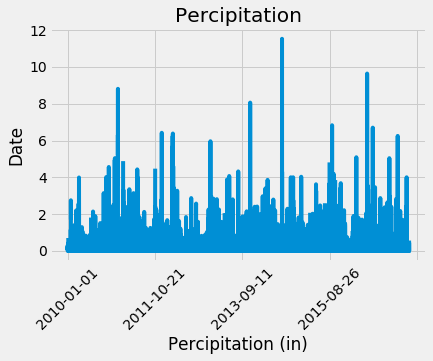

In [27]:
last_year_measurements_df["prcp"].plot()
plt.xticks(rotation= 45)
plt.xlabel('Percipitation (in)')
plt.ylabel('Date')
plt.title('Percipitation')
plt.show()

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_measurements_df.describe()

,prcp,tobs
count,18103.000000,19550.000000
mean,0.160644,73.097954
std,0.468746,4.523527
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


In [29]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.id)).all()

[(9)]

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_list = session.query(measurement.station,func.count(measurement.tobs)).\
group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
active_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
activest = session.query(measurement.station,func.count(measurement.tobs)).\
group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).first()
activest = str(activest[0])
activest

'USC00519281'

In [32]:
last_year_rain = session.query(measurement.date,measurement.tobs).filter(measurement.date > query_date, measurement.station == active_station).order_by(measurement.date).all()

len(last_year_rain)

NameError: name 'active_station' is not defined

In [33]:
active_station = str(active_list[0][0])
active_station

'USC00519281'

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

highest_temp = session.query(measurement.station,func.max(measurement.tobs)).filter(measurement.station == active_station).first()
average_temp = session.query(measurement.station,func.avg(measurement.tobs)).filter(measurement.station == active_station).first()

print(f"The highest temperature recorded was {highest_temp[1]}F and the average temperature was {round(average_temp[1])}F of the {active_station} station")

The highest temperature recorded was 85.0F and the average temperature was 72F of the USC00519281 station


In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram date > '2016-08-23' AND 
#temp_import_df = pd.read_sql(f"SELECT date, station, tobs FROM measurement WHERE station == 'USC00519281' ORDER BY date", conn)
#temp_import_df.tail()

# Query Last year into DataFrame
temp_import_df = pd.read_sql(f"SELECT date, tobs FROM measurement WHERE date > {query_date} AND station = '{activest}' ORDER BY date", conn)
temp_import_df.tail()

,date,tobs
2767,2017-08-14,77.0
2768,2017-08-15,77.0
2769,2017-08-16,76.0
2770,2017-08-17,76.0
2771,2017-08-18,79.0


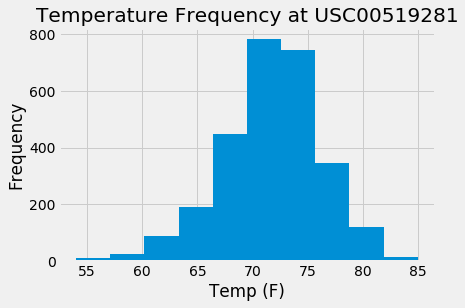

In [36]:
#Set date to index
last_year_temp_df=temp_import_df.set_index('date')
last_year_temp_df.head()

last_year_temp_df["tobs"].plot(kind = "hist")
plt.xlabel('Temp (F)')
plt.ylabel('Frequency')
plt.title('Temperature Frequency at USC00519281')
plt.show()


##Scratch pad for flask app

In [44]:
#Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
start = '2010-08-08'
highest_temp = session.query(measurement.station,func.max(measurement.tobs)).filter(measurement.station == active_station).first()
average_temp = session.query(measurement.station,func.avg(measurement.tobs)).filter(measurement.station == active_station).first()
temps = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == active_station).first()

temps = session.query(func.count(measurement.tobs), func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.date >= start).first()
temps

(17935, 53.0, 87.0, 73.21722888207415)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
